# Lending Club Case Study

### Problem Statement

#### Introduction

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

#### Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    1. Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    2. Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    3. Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

#### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### Summary

#### 1. Importing Necessary Library
#### 2. Data Loading
#### 3. Checking Missing Value
#### 4. Removing columns
    4.1 Removing Null columns
    4.2 Removing same value columns:(If the column have same value in all rows, it will not useful)
    4.3 Removing extra columns, Which are not require
    4.4 Removing Missing Data columns where Missing data >= 60%
#### 5. Removing Rows
    5.1 Removing Current status from loan_status column
    5.2 Find the duplicate rows in data
#### 6. Standardising Values
    6.1 Standardise units
        6.1.1 Convert Loan date to datetime
        6.1.2 Convert Int_rate column to Float
        6.1.3 Convert funded amount and loan amount to float
        6.1.4 Rounding of the values to two decimal places
        6.1.5 Convert term column to int
    6.2 Sorting columns in ascending order
    6.3 Looking Outliers
        6.3.1 Annual income have Outliers
        6.3.2 Removing Outliers from Annual income
        6.3.3 detailed outline for Outliers
    6.4 Checking/Replacing/Updating Missing Values and Null values in dataset
        6.4.1 Removing pub_rec_bankruptcies null values which are not useful
        6.4.2 Around 1033 rows do not have Employment length values, maybe they are not doing job and doing own business so adding Employment length mode value
        6.4.3 replacing 'Source Verifed' with 'Verified' because both meaning same as Verified 
    6.5 Adding new columns
    6.6 Final Loan dataset
#### 7. Segmentation Analysis
#### 8. Univariate Analysis
    8.1 Ordered categorical data
    8.2 Unordered categorical data
    8.3 Quantitative variables
    8.4 Summary of Univariate Analysis
#### 9. Bivariate Analysis
    9.1 Ordered categorical data
    9.2 Unordered categorical data
    9.3 Quantitative variables
    9.4 Summary of Bivariate Analysis
#### 10. Multivariate Analysis, Correlation Analysis
    10.1 Heatmap for Multivariate Analysis, Correlation Analysis
    10.2 Clustermap for Multivariate Analysis, Correlation Analysis
    10.3 Summary of Multivariate Analysis, Correlation Analysis

    

## 1. Importing Necessary Library


In [55]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading

In [56]:
Loan_df=pd.read_csv("loan.csv")

In [57]:
Loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
Loan_df.shape

(39717, 111)

In [59]:
Loan_df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

## 3. Checking Missing Value

In [60]:
100*Loan_df.isna().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [61]:
Loan_df.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

## 4. Removing columns

### 4.1 Removing Null columns

In [62]:
Loan_df.dropna(axis = 1, how = 'all', inplace = True)

In [63]:
Loan_df.shape

(39717, 57)

### 4.2 Removing same value columns:(If the column have same value in all rows, it will not useful)

In [64]:
remove_columns_list = []
for i in Loan_df.columns:
    if Loan_df[i].nunique() == 1:
        remove_columns_list.append(i)


In [65]:
Loan_df.drop(remove_columns_list, axis = 1, inplace = True)

In [66]:
Loan_df.shape

(39717, 48)

### 4.3 Removing extra columns, Which are not require

In [67]:
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'url',
 'zip_code'
]

Loan_df.drop(drop_cols, axis = 1, inplace = True)

In [68]:
Loan_df.shape

(39717, 28)

### 4.4 Removing Missing Data columns where Missing data >= 60%

In [69]:
for col in Loan_df.columns:
    missing_values = round(Loan_df[col].isna().sum() / Loan_df.shape[0], 2)
    if missing_values >= 0.60:
        Loan_df.drop(col, axis = 1, inplace = True)
        
Loan_df.shape

(39717, 25)

## 5. Removing Rows

### 5.1 Removing Current status from loan_status column

In [70]:
Loan_df = Loan_df[Loan_df['loan_status'].str.lower() != "current"]

In [71]:
Loan_df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose,addr_state,dti,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,credit_card,AZ,27.65,9,5863.155187,5833.84,5000.00,863.16,0.00,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,car,GA,1.00,4,1008.710000,1008.71,456.46,435.17,0.00,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,small_business,IL,8.72,10,3005.666844,3005.67,2400.00,605.67,0.00,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,other,CA,20.00,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.0
5,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,...,wedding,AZ,11.20,12,5632.210000,5632.21,5000.00,632.21,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,...,home_improvement,CO,11.33,40,2822.969293,1213.88,2500.00,322.97,0.00,NaN
39713,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,...,credit_card,NC,6.40,9,9913.491822,1020.51,8500.00,1413.49,0.00,NaN
39714,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,...,debt_consolidation,MA,2.30,20,5272.161128,1397.12,5000.00,272.16,0.00,NaN
39715,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,...,other,MD,3.72,26,5174.198551,672.66,5000.00,174.20,0.00,NaN


In [72]:
Loan_df.shape

(38577, 25)

### 5.2 Find the duplicate rows in data

In [73]:
duplicate_df = Loan_df.duplicated()
Loan_df[duplicate_df]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose,addr_state,dti,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,pub_rec_bankruptcies


## 6. Standardising Values


### 6.1 Standardise units

##### 6.1.1 Convert Loan date to datetime

In [74]:
Loan_df['issue_d'] = pd.to_datetime(Loan_df['issue_d'], format = '%b-%y')

##### 6.1.2 Convert Int_rate column to Float

In [75]:
Loan_df['int_rate'] = Loan_df['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

##### 6.1.3 Convert funded amount and loan amount to float

In [76]:
Loan_df = Loan_df.astype({
    'funded_amnt' : 'float',
    'loan_amnt' : 'float'
})

##### 6.1.4 Rounding of the values to two decimal places


In [77]:
for cols in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'total_pymnt', 
             'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'pub_rec_bankruptcies']:
    Loan_df[cols] = Loan_df[cols].apply(lambda x: round(x, 2))

##### 6.1.5 Convert term column to int

In [78]:
Loan_df['term'] = Loan_df['term'].apply(lambda x: int(x.replace('months', '').strip()))

In [79]:
Loan_df.info(1)

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   member_id             38577 non-null  int64         
 1   loan_amnt             38577 non-null  float64       
 2   funded_amnt           38577 non-null  float64       
 3   funded_amnt_inv       38577 non-null  float64       
 4   term                  38577 non-null  int64         
 5   int_rate              38577 non-null  float64       
 6   installment           38577 non-null  float64       
 7   grade                 38577 non-null  object        
 8   sub_grade             38577 non-null  object        
 9   emp_length            37544 non-null  object        
 10  home_ownership        38577 non-null  object        
 11  annual_inc            38577 non-null  float64       
 12  verification_status   38577 non-null  object        
 13  issue_d              

In [80]:
Loan_df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose,addr_state,dti,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,pub_rec_bankruptcies
0,1296599,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10+ years,...,credit_card,AZ,27.65,9,5863.16,5833.84,5000.00,863.16,0.00,0.0
1,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,< 1 year,...,car,GA,1.00,4,1008.71,1008.71,456.46,435.17,0.00,0.0
2,1313524,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10+ years,...,small_business,IL,8.72,10,3005.67,3005.67,2400.00,605.67,0.00,0.0
3,1277178,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10+ years,...,other,CA,20.00,37,12231.89,12231.89,10000.00,2214.92,16.97,0.0
5,1311441,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3 years,...,wedding,AZ,11.20,12,5632.21,5632.21,5000.00,632.21,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,2500.0,2500.0,1075.0,36,8.07,78.42,A,A4,4 years,...,home_improvement,CO,11.33,40,2822.97,1213.88,2500.00,322.97,0.00,NaN
39713,90607,8500.0,8500.0,875.0,36,10.28,275.38,C,C1,3 years,...,credit_card,NC,6.40,9,9913.49,1020.51,8500.00,1413.49,0.00,NaN
39714,90390,5000.0,5000.0,1325.0,36,8.07,156.84,A,A4,< 1 year,...,debt_consolidation,MA,2.30,20,5272.16,1397.12,5000.00,272.16,0.00,NaN
39715,89243,5000.0,5000.0,650.0,36,7.43,155.38,A,A2,< 1 year,...,other,MD,3.72,26,5174.20,672.66,5000.00,174.20,0.00,NaN


### 6.2 Sorting columns in ascending order

In [81]:
Loan_df = Loan_df.reindex(sorted(Loan_df.columns), axis=1)

In [82]:
Loan_df

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,...,purpose,sub_grade,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,verification_status
0,AZ,24000.0,27.65,10+ years,5000.0,4975.0,B,RENT,162.87,10.65,...,credit_card,B2,36,9,5863.16,5833.84,863.16,0.00,5000.00,Verified
1,GA,30000.0,1.00,< 1 year,2500.0,2500.0,C,RENT,59.83,15.27,...,car,C4,60,4,1008.71,1008.71,435.17,0.00,456.46,Source Verified
2,IL,12252.0,8.72,10+ years,2400.0,2400.0,C,RENT,84.33,15.96,...,small_business,C5,36,10,3005.67,3005.67,605.67,0.00,2400.00,Not Verified
3,CA,49200.0,20.00,10+ years,10000.0,10000.0,C,RENT,339.31,13.49,...,other,C1,36,37,12231.89,12231.89,2214.92,16.97,10000.00,Source Verified
5,AZ,36000.0,11.20,3 years,5000.0,5000.0,A,RENT,156.46,7.90,...,wedding,A4,36,12,5632.21,5632.21,632.21,0.00,5000.00,Source Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,CO,110000.0,11.33,4 years,2500.0,1075.0,A,MORTGAGE,78.42,8.07,...,home_improvement,A4,36,40,2822.97,1213.88,322.97,0.00,2500.00,Not Verified
39713,NC,18000.0,6.40,3 years,8500.0,875.0,C,RENT,275.38,10.28,...,credit_card,C1,36,9,9913.49,1020.51,1413.49,0.00,8500.00,Not Verified
39714,MA,100000.0,2.30,< 1 year,5000.0,1325.0,A,MORTGAGE,156.84,8.07,...,debt_consolidation,A4,36,20,5272.16,1397.12,272.16,0.00,5000.00,Not Verified
39715,MD,200000.0,3.72,< 1 year,5000.0,650.0,A,MORTGAGE,155.38,7.43,...,other,A2,36,26,5174.20,672.66,174.20,0.00,5000.00,Not Verified


### 6.3 Looking Outliers

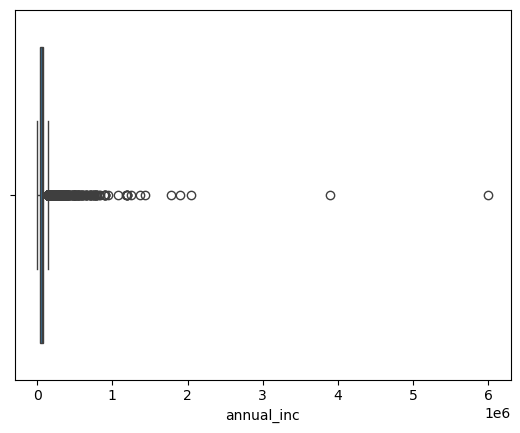

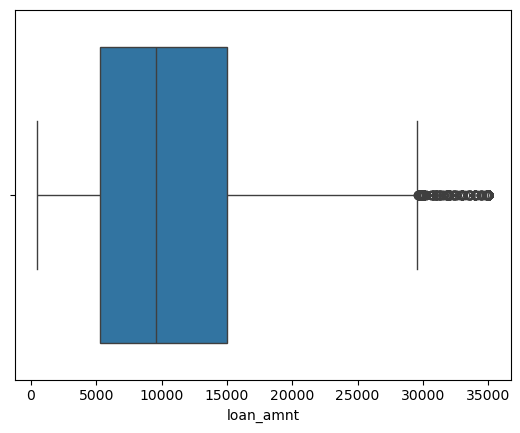

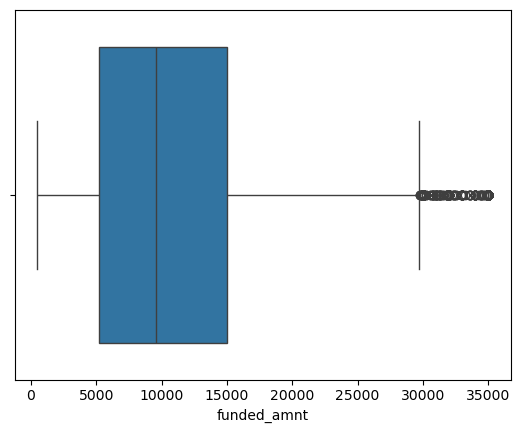

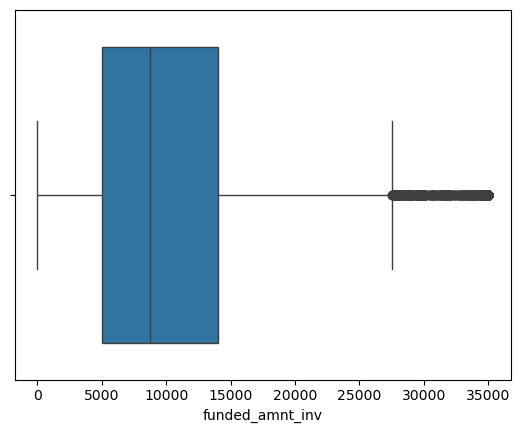

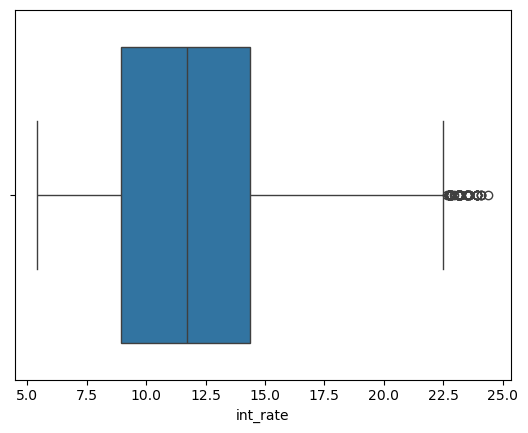

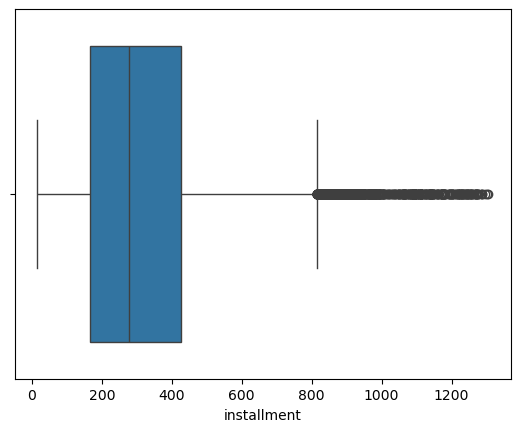

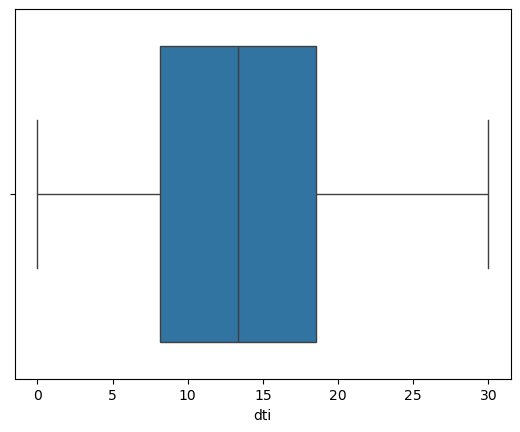

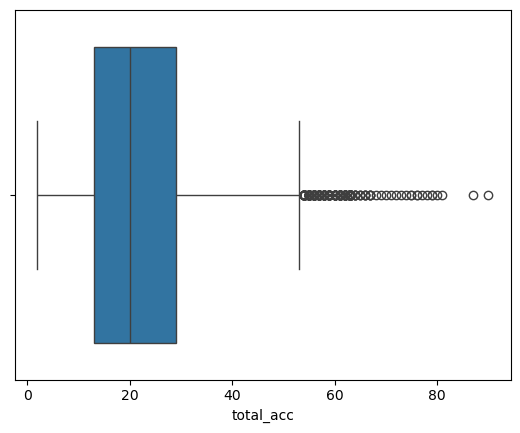

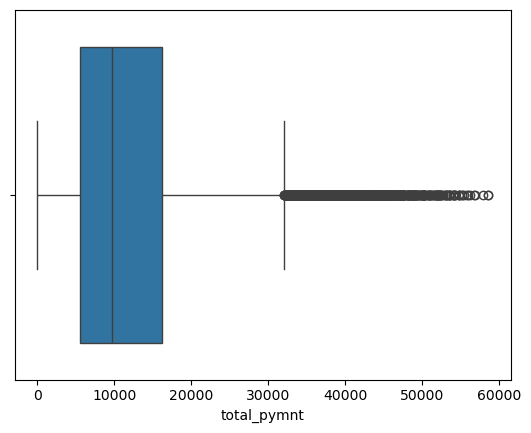

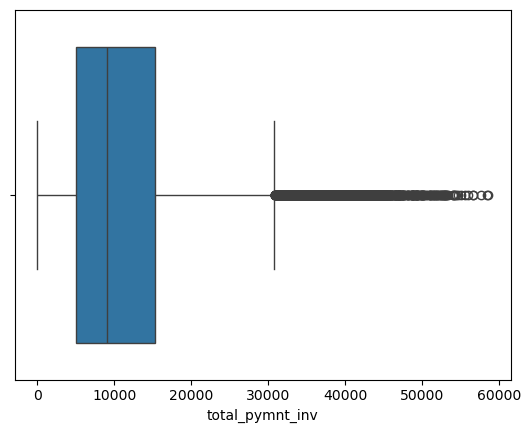

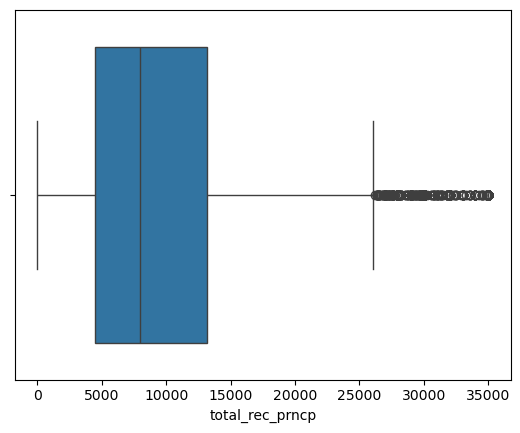

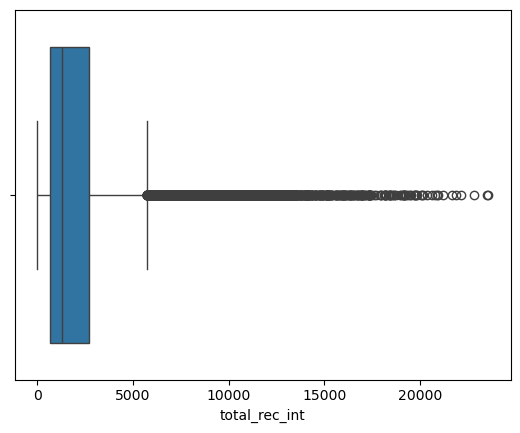

In [83]:
for col in ['annual_inc', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti'
           , 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int']:
    sns.boxplot(x=Loan_df[col])
    plt.show()

#### 6.3.1 Annual income have Outliers

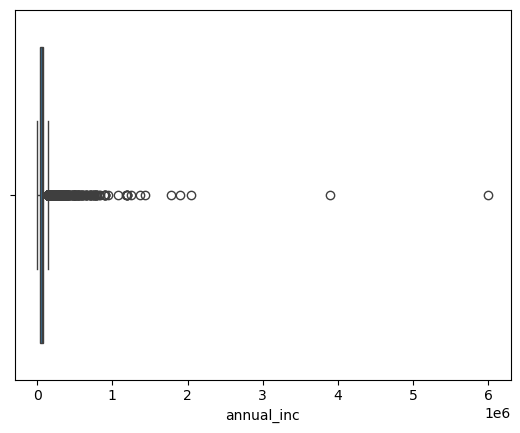

In [84]:
sns.boxplot(x=Loan_df["annual_inc"])
plt.show()

#### 6.3.2 Removing Outliers from Annual income

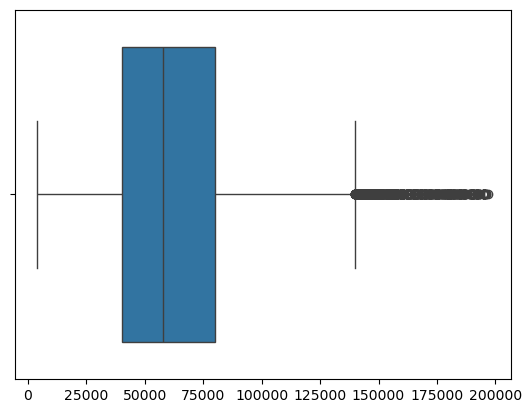

In [85]:
elements = np.array(Loan_df["annual_inc"])

mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)

final_list = [x for x in Loan_df["annual_inc"] if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
sns.boxplot(x=final_list)
plt.show()

#### 6.3.3 detailed outline for Outliers

##### 1. Most loan applicants make between 40000 to 75000  per year.
##### 2. Most loan applicants have loan amounts between 5000 to 15,000.
##### 3. Most loan applicants have funded amounts between 5000 to 15000 .
##### 4. For the majority of loan applicants, the funded amount by investors ranges from 5000 to 14000.
##### 5. The loan has an interest rate ranging from 9% to 14%.
##### 6. The loan has monthly installments ranging from 160 to 440.
##### 7. There is an 8–18 debt to income ratio.

### 6.4 Checking/Replacing/Updating Missing Values and Null values in dataset

In [86]:
Loan_df.isna().sum()

addr_state                 0
annual_inc                 0
dti                        0
emp_length              1033
funded_amnt                0
funded_amnt_inv            0
grade                      0
home_ownership             0
installment                0
int_rate                   0
issue_d                    0
loan_amnt                  0
loan_status                0
member_id                  0
pub_rec_bankruptcies     697
purpose                    0
sub_grade                  0
term                       0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_int              0
total_rec_late_fee         0
total_rec_prncp            0
verification_status        0
dtype: int64

#### 6.4.1 Removing pub_rec_bankruptcies null values which are not useful

In [87]:
Loan_df = Loan_df[Loan_df.pub_rec_bankruptcies.notna()] 

#### 6.4.2 Around 1033 rows do not have Employment length values, maybe they are not doing job and doing own business so adding Employment length mode value

In [88]:
Loan_df.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [89]:
Loan_df.emp_length.fillna(Loan_df.emp_length.mode()[0], inplace = True)

In [90]:
Loan_df.isna().sum()

addr_state              0
annual_inc              0
dti                     0
emp_length              0
funded_amnt             0
funded_amnt_inv         0
grade                   0
home_ownership          0
installment             0
int_rate                0
issue_d                 0
loan_amnt               0
loan_status             0
member_id               0
pub_rec_bankruptcies    0
purpose                 0
sub_grade               0
term                    0
total_acc               0
total_pymnt             0
total_pymnt_inv         0
total_rec_int           0
total_rec_late_fee      0
total_rec_prncp         0
verification_status     0
dtype: int64

#### 6.4.3 replacing 'Source Verifed' with 'Verified' because both meaning same as Verified 

In [91]:
Loan_df.verification_status.value_counts()

verification_status
Not Verified       15998
Verified           12205
Source Verified     9677
Name: count, dtype: int64

In [92]:
Loan_df['verification_status'].replace('Source Verified', 'Verified', inplace = True)

In [93]:
Loan_df.verification_status.value_counts()

verification_status
Verified        21882
Not Verified    15998
Name: count, dtype: int64

### 6.5 Adding new columns

In [94]:
Loan_df['issue_m'] = pd.DatetimeIndex(Loan_df['issue_d']).month
Loan_df['issue_y'] = pd.DatetimeIndex(Loan_df['issue_d']).year
loan_status_map = {'Charged Off': '0', 'Fully Paid': '1' }
Loan_df['loan_paid'] = Loan_df['loan_status'].map(loan_status_map)
Loan_df = Loan_df.astype({
    'loan_paid' : 'int'
})

### 6.6 Final Loan dataset

In [95]:
Loan_df

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,verification_status,issue_m,issue_y,loan_paid
0,AZ,24000.0,27.65,10+ years,5000.0,4975.0,B,RENT,162.87,10.65,...,9,5863.16,5833.84,863.16,0.00,5000.00,Verified,12,2011,1
1,GA,30000.0,1.00,< 1 year,2500.0,2500.0,C,RENT,59.83,15.27,...,4,1008.71,1008.71,435.17,0.00,456.46,Verified,12,2011,0
2,IL,12252.0,8.72,10+ years,2400.0,2400.0,C,RENT,84.33,15.96,...,10,3005.67,3005.67,605.67,0.00,2400.00,Not Verified,12,2011,1
3,CA,49200.0,20.00,10+ years,10000.0,10000.0,C,RENT,339.31,13.49,...,37,12231.89,12231.89,2214.92,16.97,10000.00,Verified,12,2011,1
5,AZ,36000.0,11.20,3 years,5000.0,5000.0,A,RENT,156.46,7.90,...,12,5632.21,5632.21,632.21,0.00,5000.00,Verified,12,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,VA,35000.0,7.51,1 year,4800.0,1100.0,C,RENT,155.52,10.28,...,12,5134.09,1176.56,334.09,0.00,4800.00,Not Verified,11,2007,1
39573,AZ,63500.0,8.50,3 years,7000.0,1000.0,C,MORTGAGE,227.82,10.59,...,21,8174.02,1167.72,1174.02,0.00,7000.00,Not Verified,11,2007,1
39623,MD,39000.0,5.08,8 years,9000.0,700.0,D,MORTGAGE,301.04,12.49,...,37,4015.96,311.64,609.26,0.00,1496.83,Not Verified,10,2007,0
39666,VA,40000.0,13.50,2 years,15450.0,600.0,C,MORTGAGE,507.46,11.22,...,29,11652.75,451.73,2659.96,0.00,8688.59,Not Verified,8,2007,0


## 7. Segmentation Analysis

##### Based on common characteristics, going to split all columns into different groups

In [96]:
Loan_df.nunique()

addr_state                 49
annual_inc               5152
dti                      2853
emp_length                 11
funded_amnt              1013
funded_amnt_inv          7513
grade                       7
home_ownership              4
installment             14629
int_rate                  336
issue_d                    52
loan_amnt                 860
loan_status                 2
member_id               37880
pub_rec_bankruptcies        3
purpose                    14
sub_grade                  35
term                        2
total_acc                  82
total_pymnt             34799
total_pymnt_inv         35708
total_rec_int           33424
total_rec_late_fee        744
total_rec_prncp          6710
verification_status         2
issue_m                    12
issue_y                     5
loan_paid                   2
dtype: int64

In [97]:
order_cat_cols=["emp_length","grade","sub_grade","issue_d","issue_m","issue_y","term","pub_rec_bankruptcies","verification_status"]
unorder_catextra_cols=["addr_state","home_ownership","loan_status","purpose"]
quanti_num_cols=["dti","funded_amnt","funded_amnt_inv","installment","int_rate","loan_amnt","member_id",
                "total_acc","total_pymnt","total_pymnt_inv","total_rec_int","total_rec_late_fee","total_rec_prncp","annual_inc"]


## 8. Univariate Analysis

The fields listed below will be examined during the univariate analysis.

1. Categorical variables
    1. Ordered categorical data
        1. Employment length (emp_length)
        2. Grade (grade)
        3. Sub grade (sub_grade)
        4. Issue date (issue_d)
        5. Issue month (issue_m)
        6. Issue year (issue_y)
        7. Term 36/60 months (term)
        8. Number of public record bankruptcies(pub_rec_bankruptcies)
        9. Income was verified by LC(verification_status)
    
    2. Unordered categorical data
        1. Address State (addr_state)
        2. Home Ownership (home_ownership)
        3. Loan status (loan_status)
        4. Loan purpose (purpose)
        
2. Quantitative variables
    1. Debt to Income Ratio (dti)
    2. The total amount committed to that loan (funded_amnt)
    3. The total amount committed by investors (funded_amnt_inv)
    4. Installment Amount (installment)
    5. Interest rate (int_rate)
    6. Loan amount (loan_amnt)
    7. A unique LC assigned Id for the borrower member (member_id)
    8. The total number of credit lines currently in the borrower's credit file (total_acc)
    9. Payments received to date for total amount funded (total_pymnt)
    10. Payments received to date for portion of total amount funded by investors (total_pymnt_inv)
    11. Interest received to date (total_rec_int)
    12. Late fees received to date (total_rec_late_fee)
    13. Principal received to date (total_rec_prncp)
    14. Annual income (annual_inc)
    

### 8.1 Ordered Categorical Variables

Countplot of emp_length


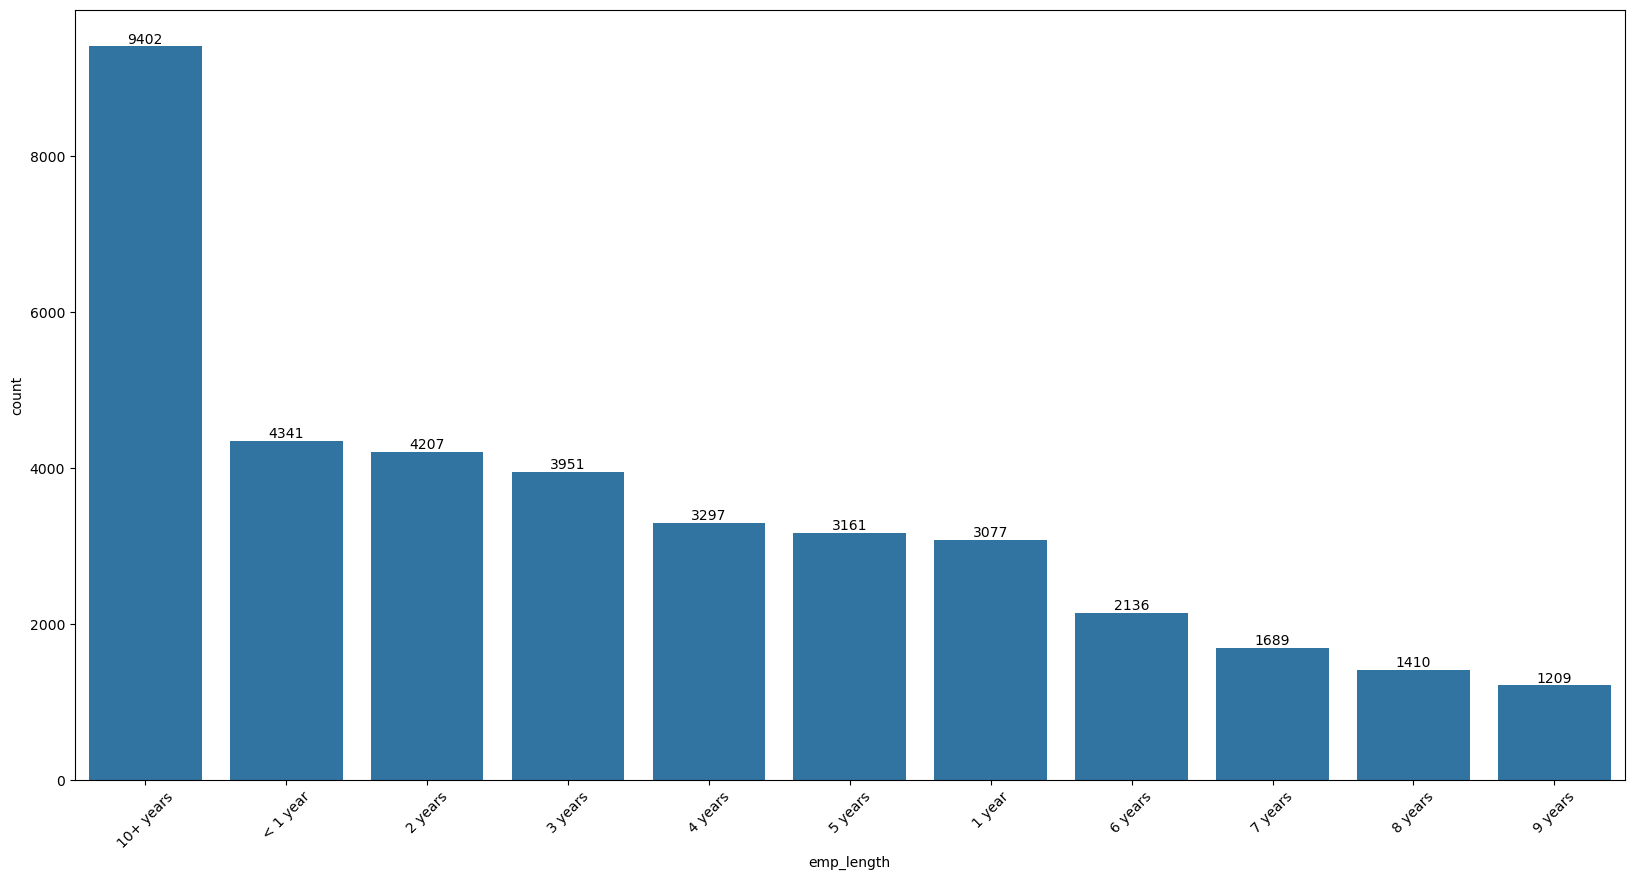

Countplot of grade


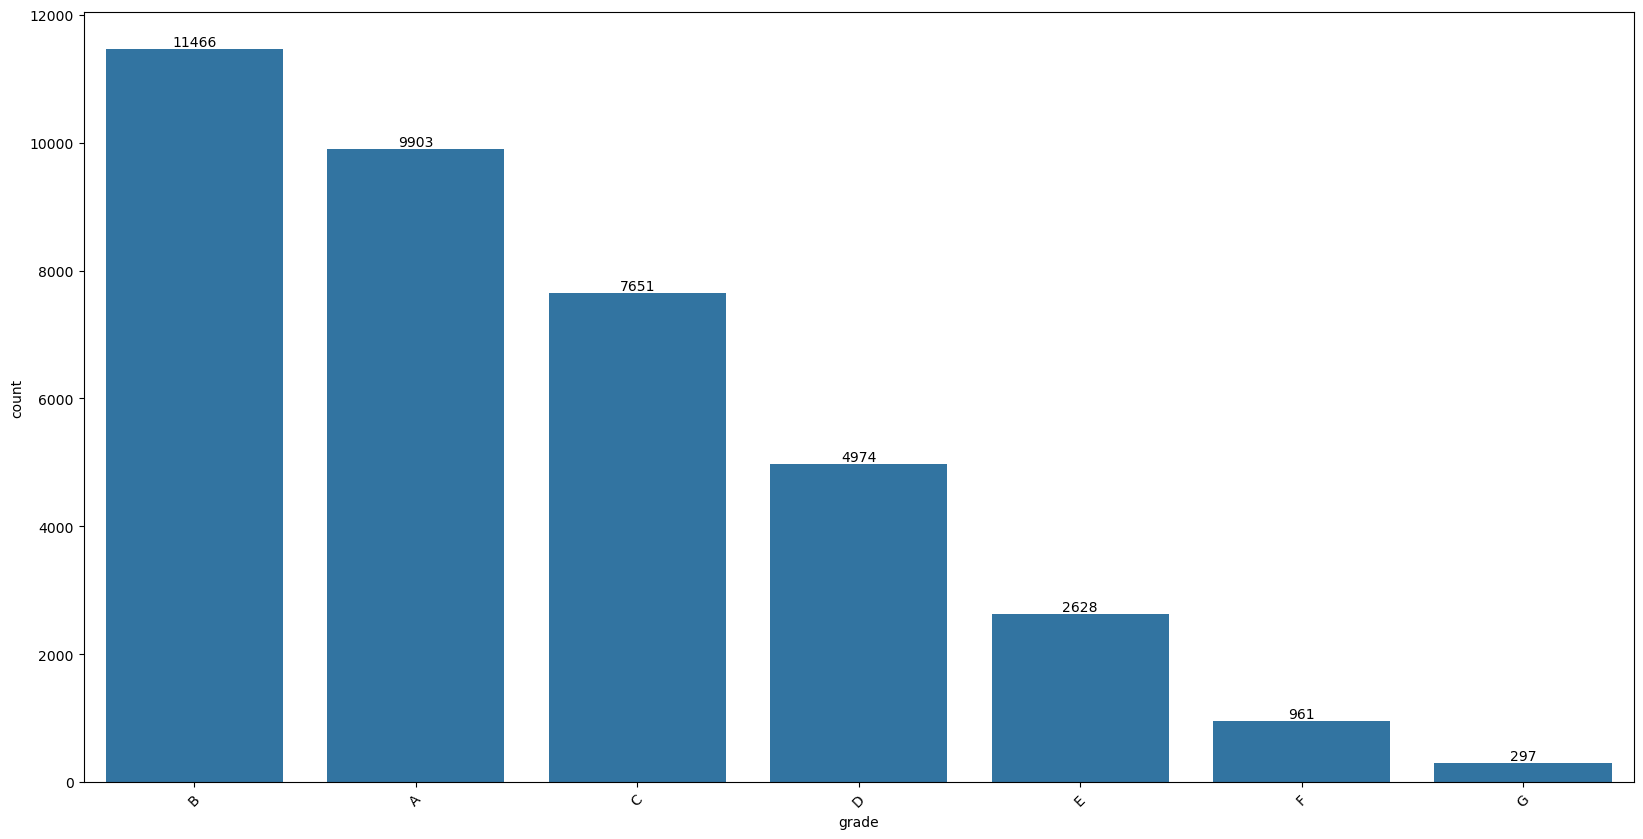

Countplot of sub_grade


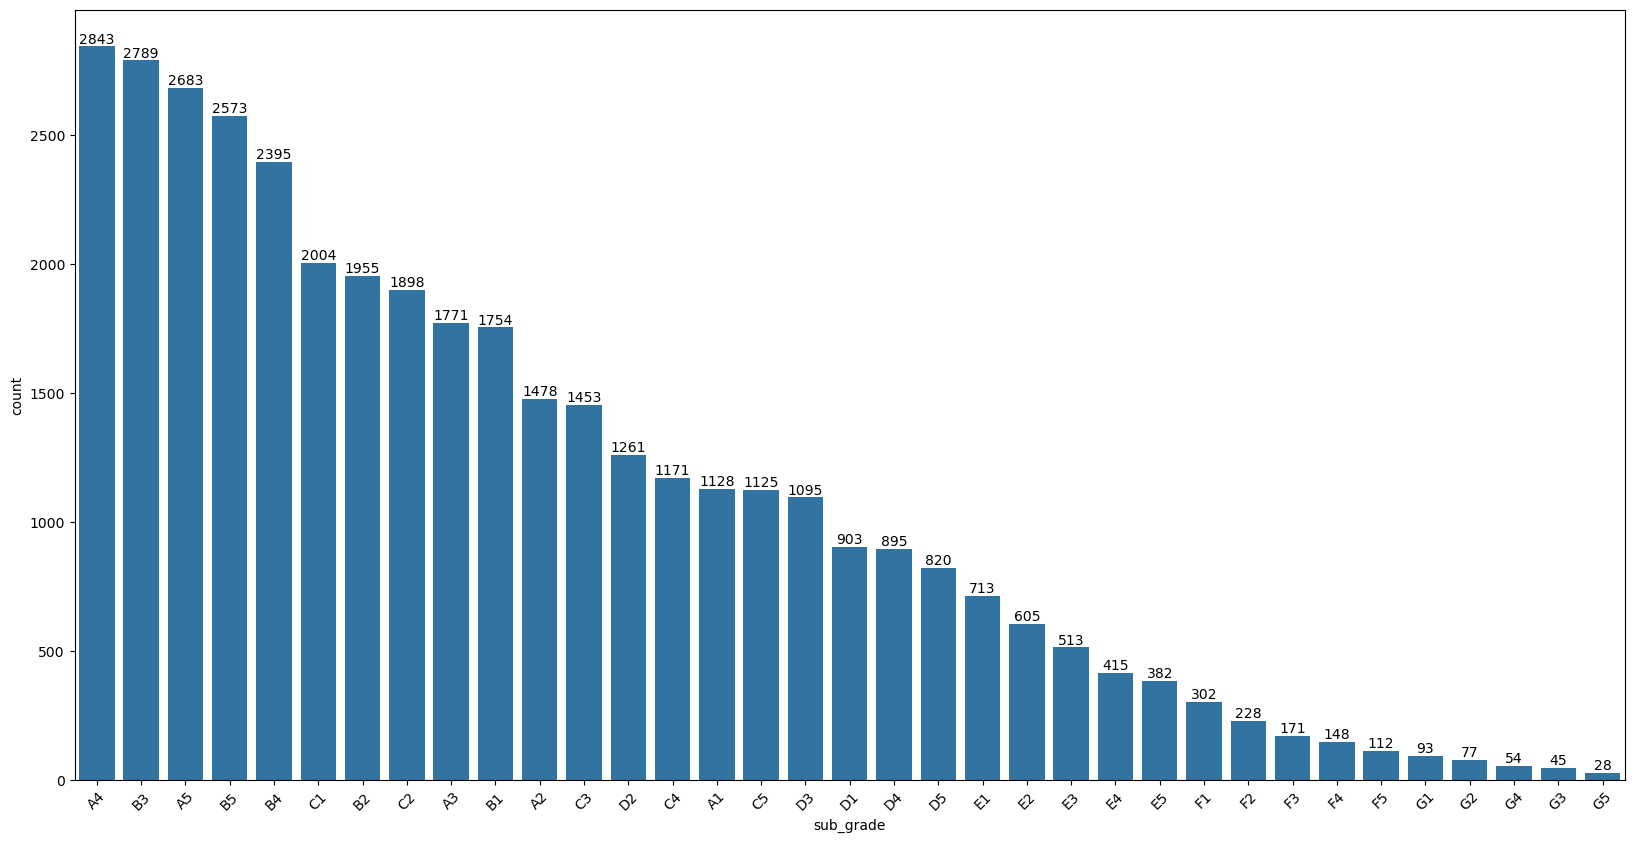

Countplot of issue_d


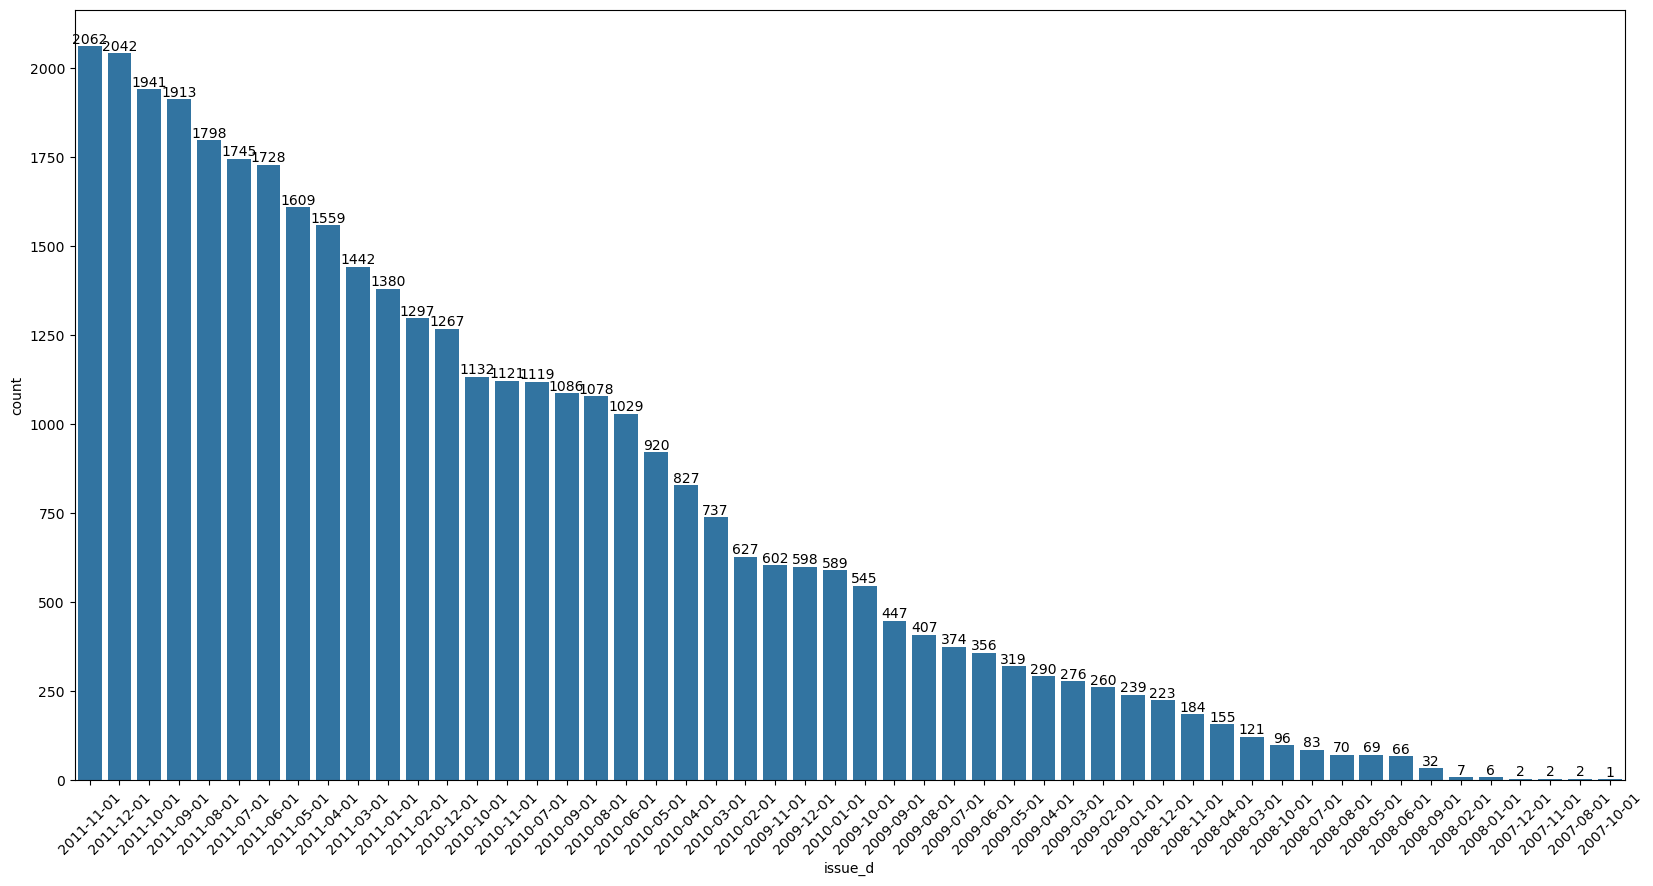

Countplot of issue_m


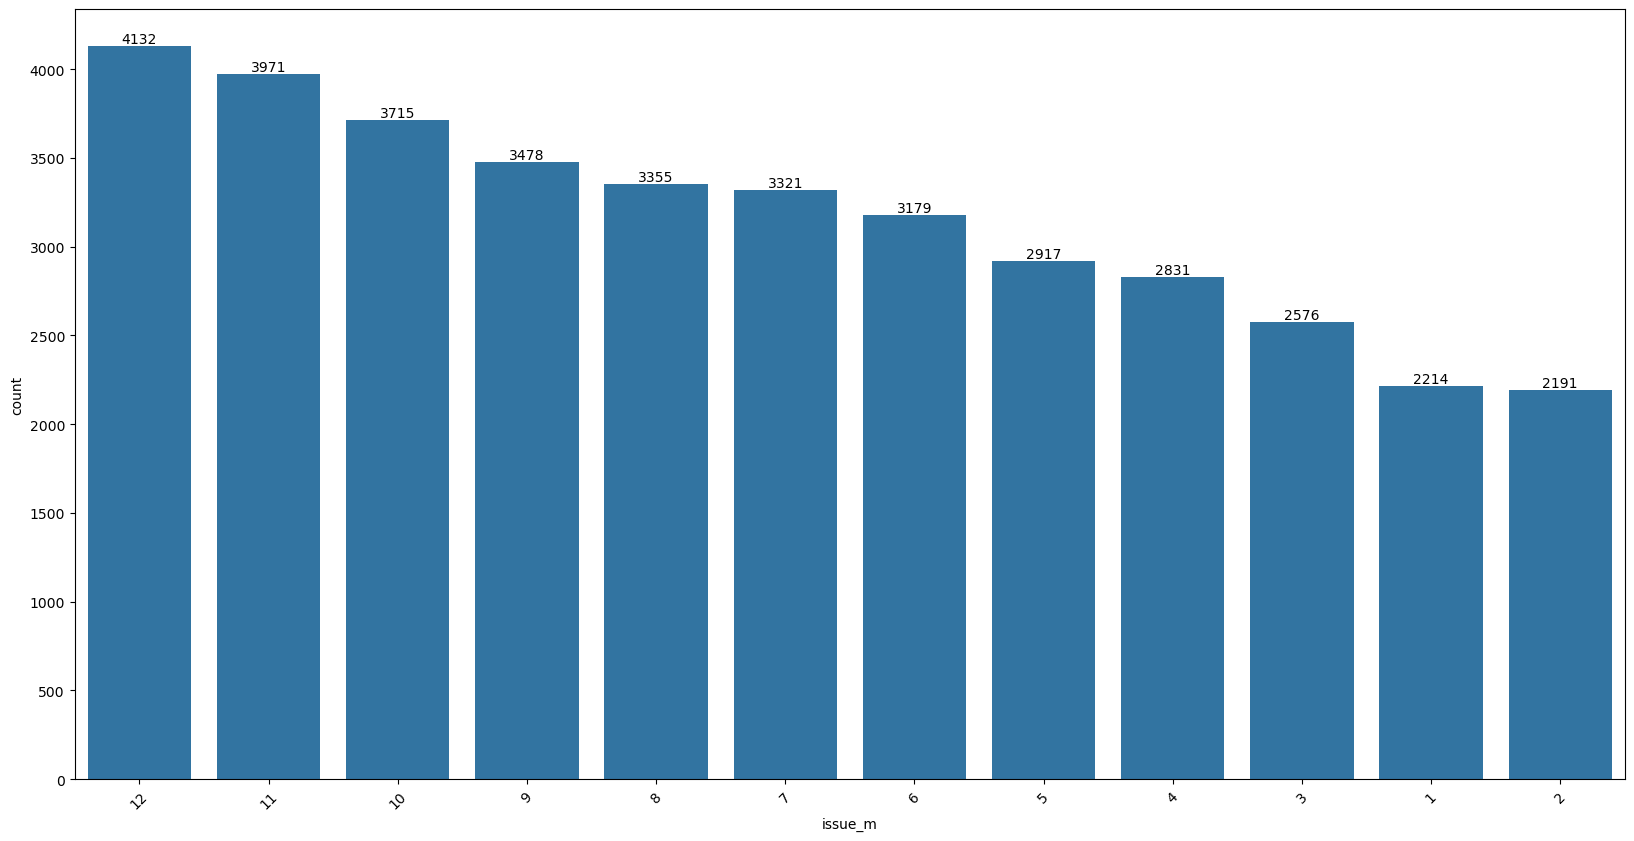

Countplot of issue_y


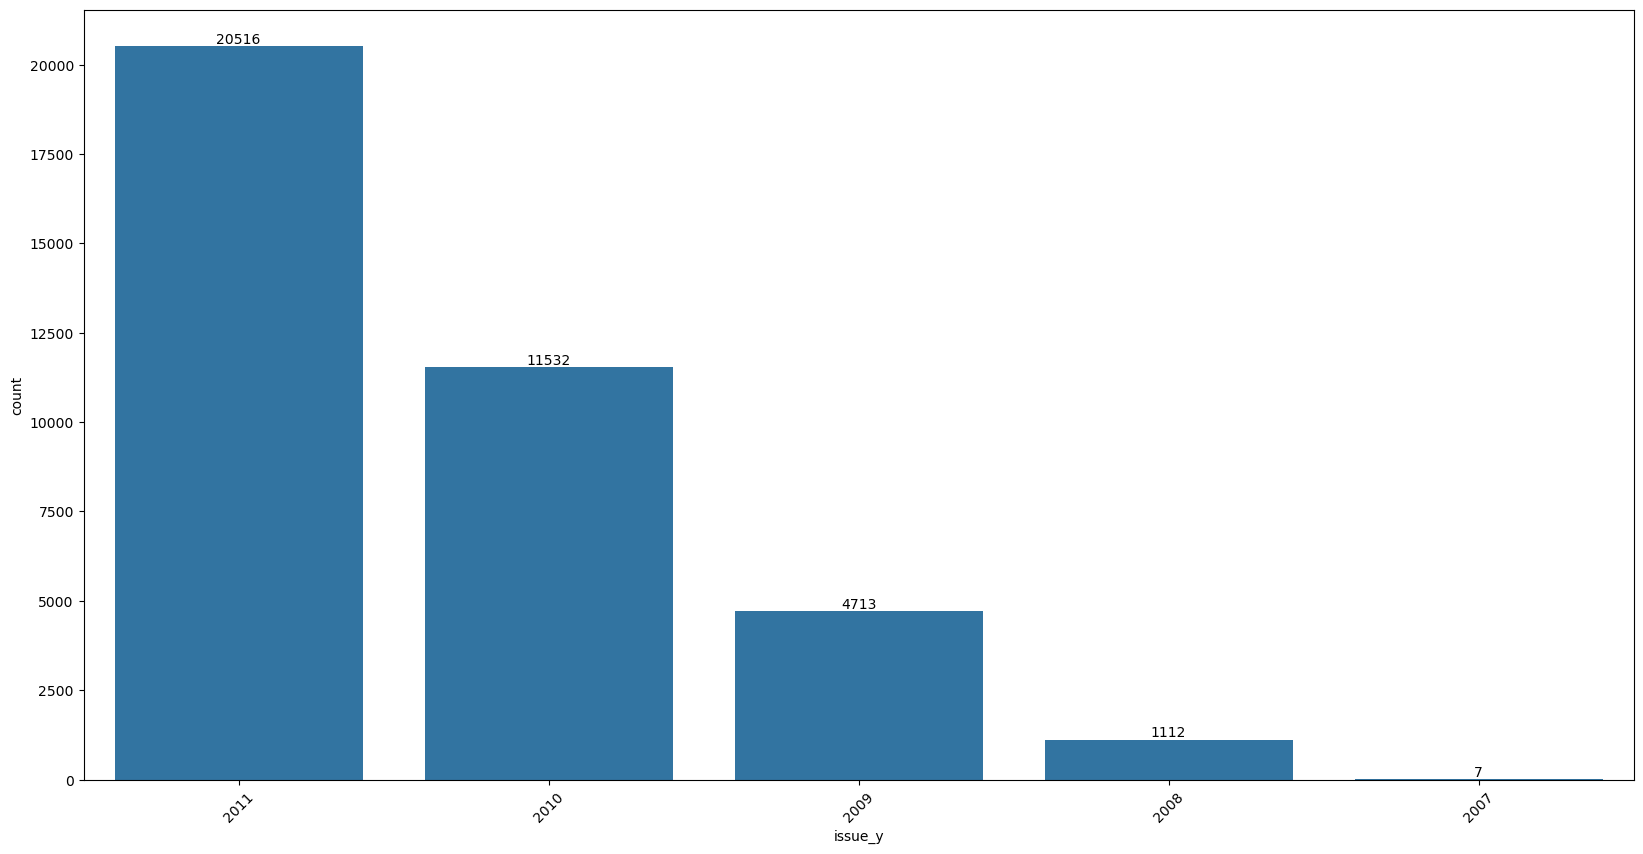

Countplot of term


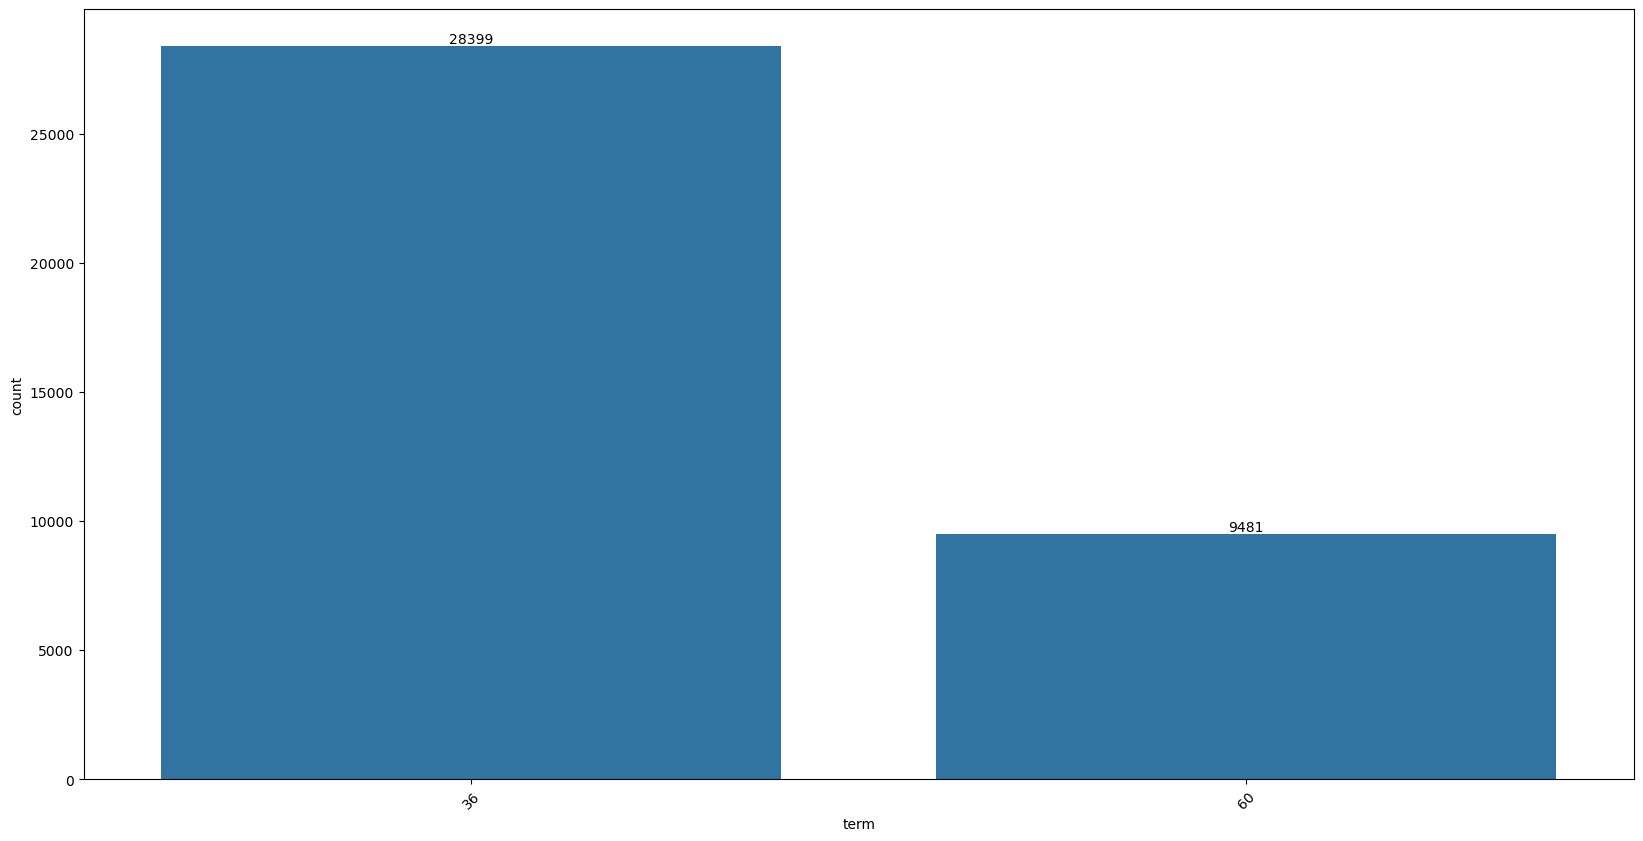

Countplot of pub_rec_bankruptcies


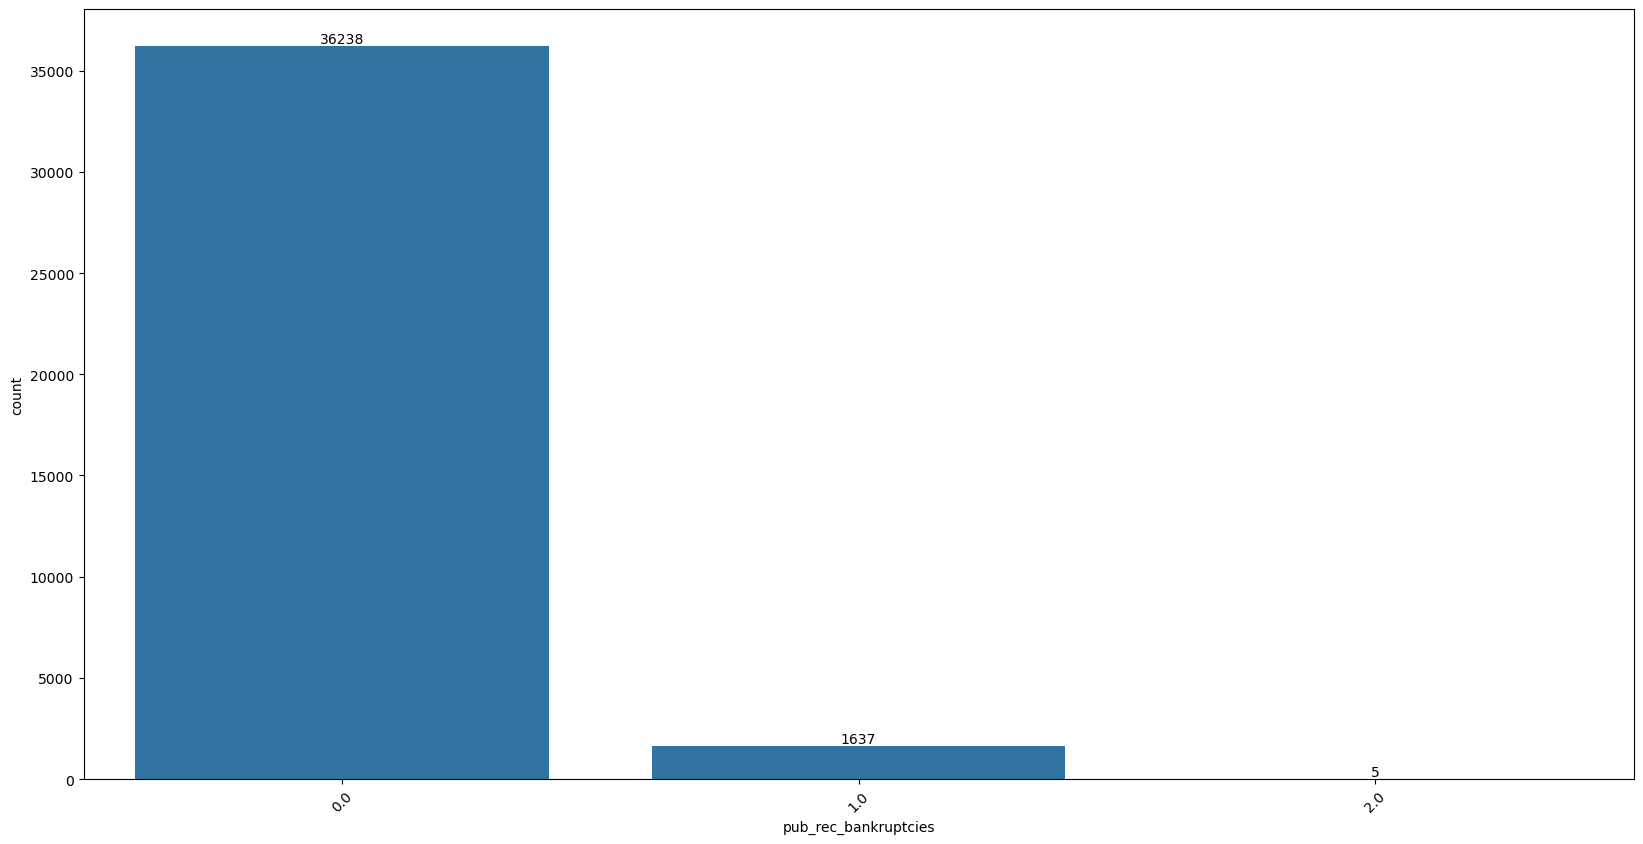

Countplot of verification_status


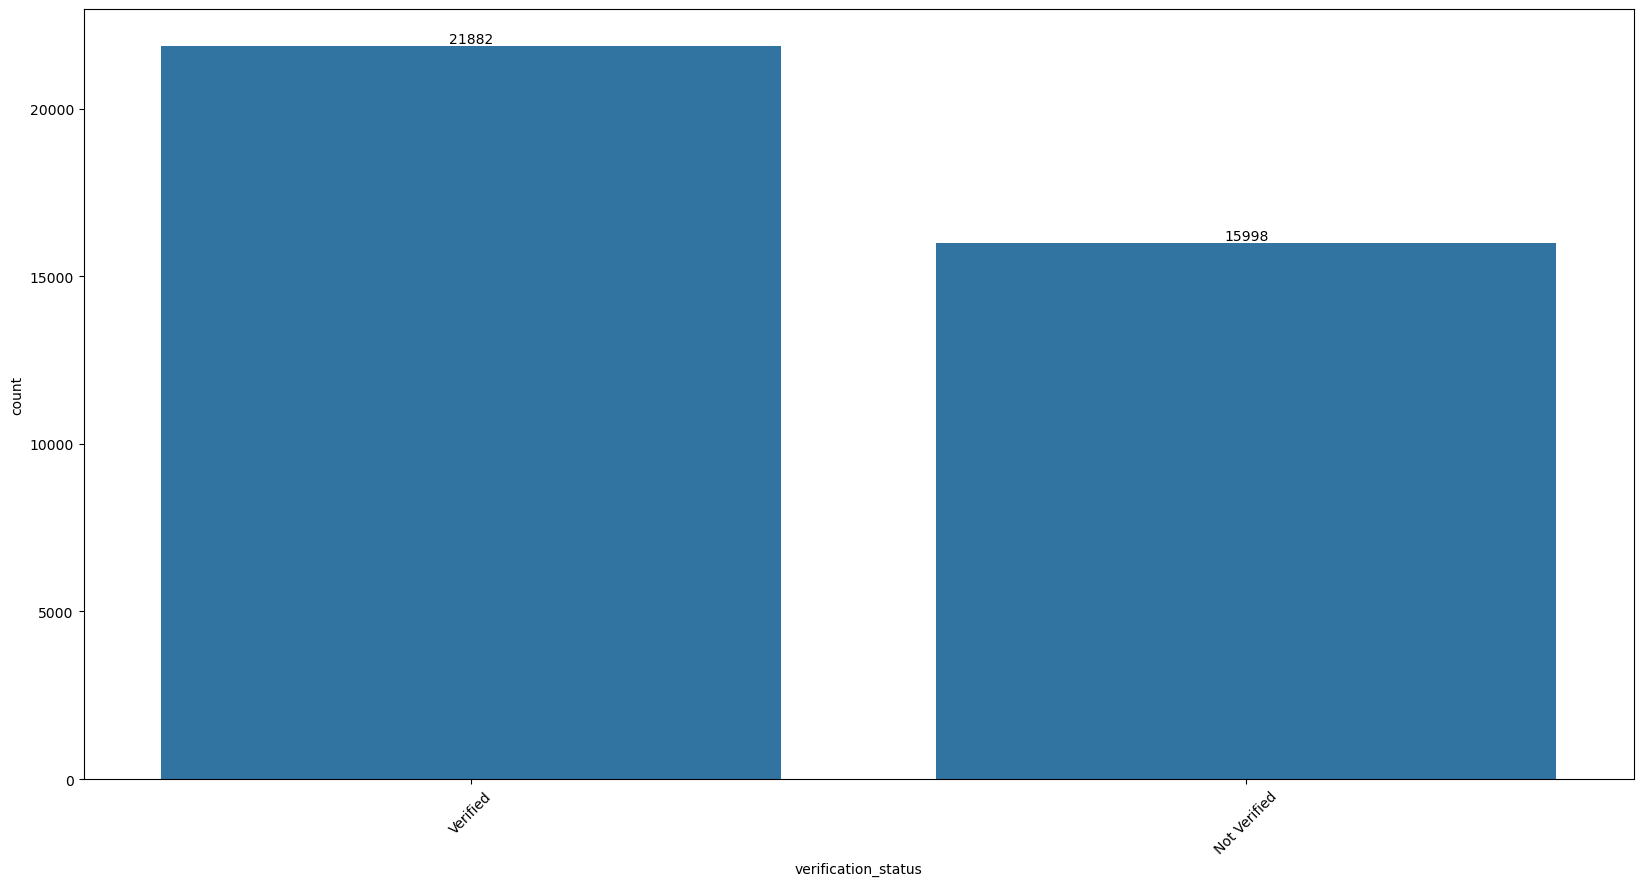

In [98]:
for i in order_cat_cols:
    print("Countplot of",i)
    plt.figure(figsize = (20,10))
    ax = sns.countplot(x=Loan_df[i],order = Loan_df[i].value_counts(ascending=False).index)
    abs_values = Loan_df[i].value_counts(ascending=False).values
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    plt.xticks(rotation=45)
    plt.show()

### 8.2 Unordered Categorical Variables

Countplot of addr_state


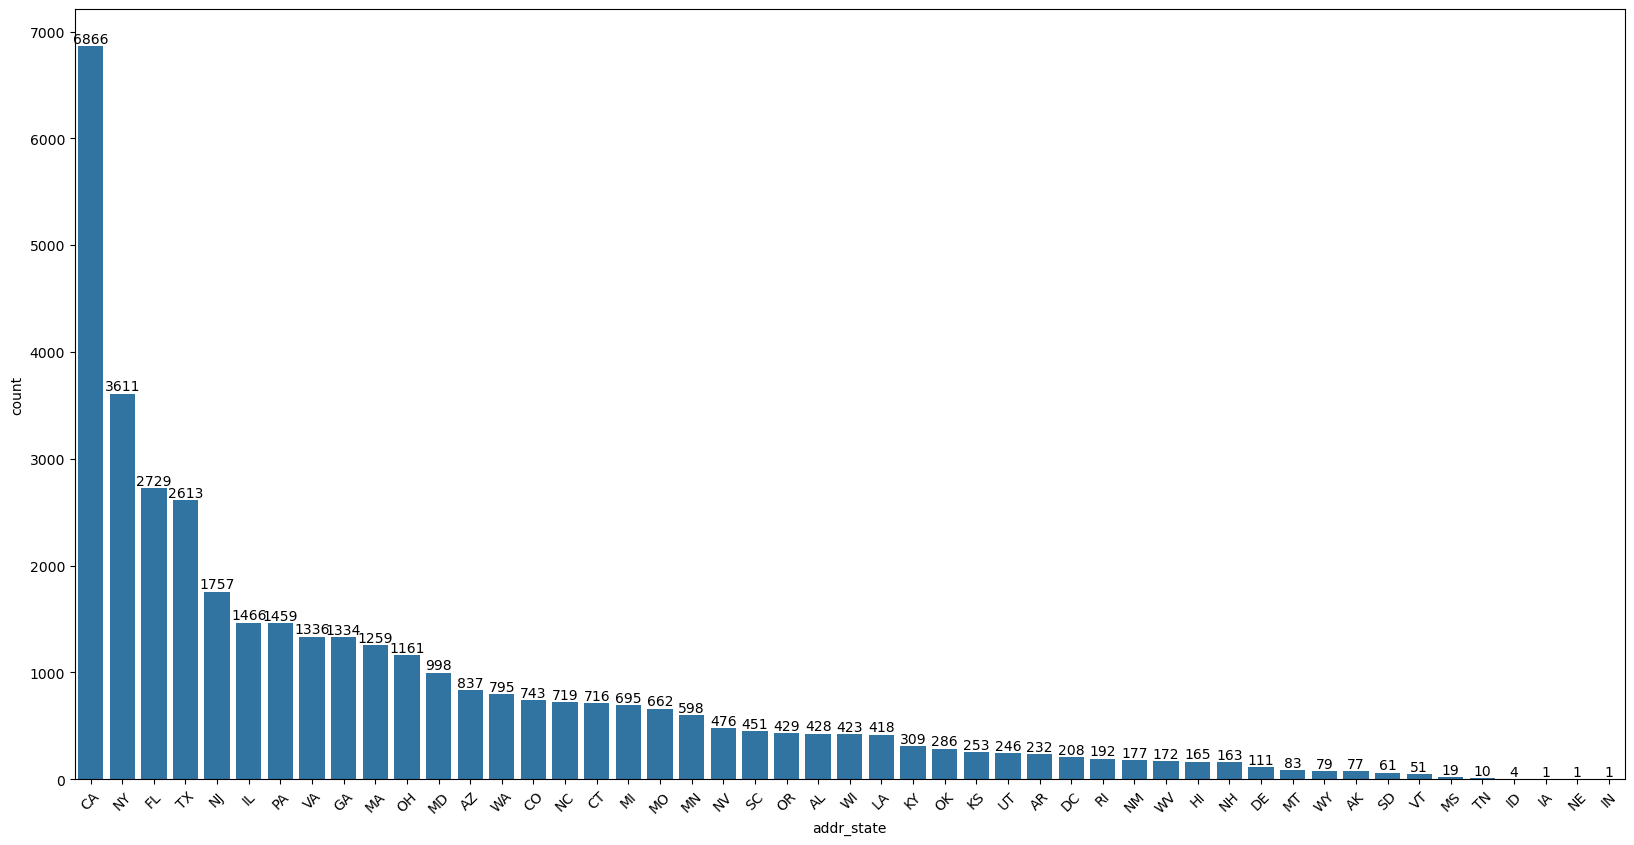

Countplot of home_ownership


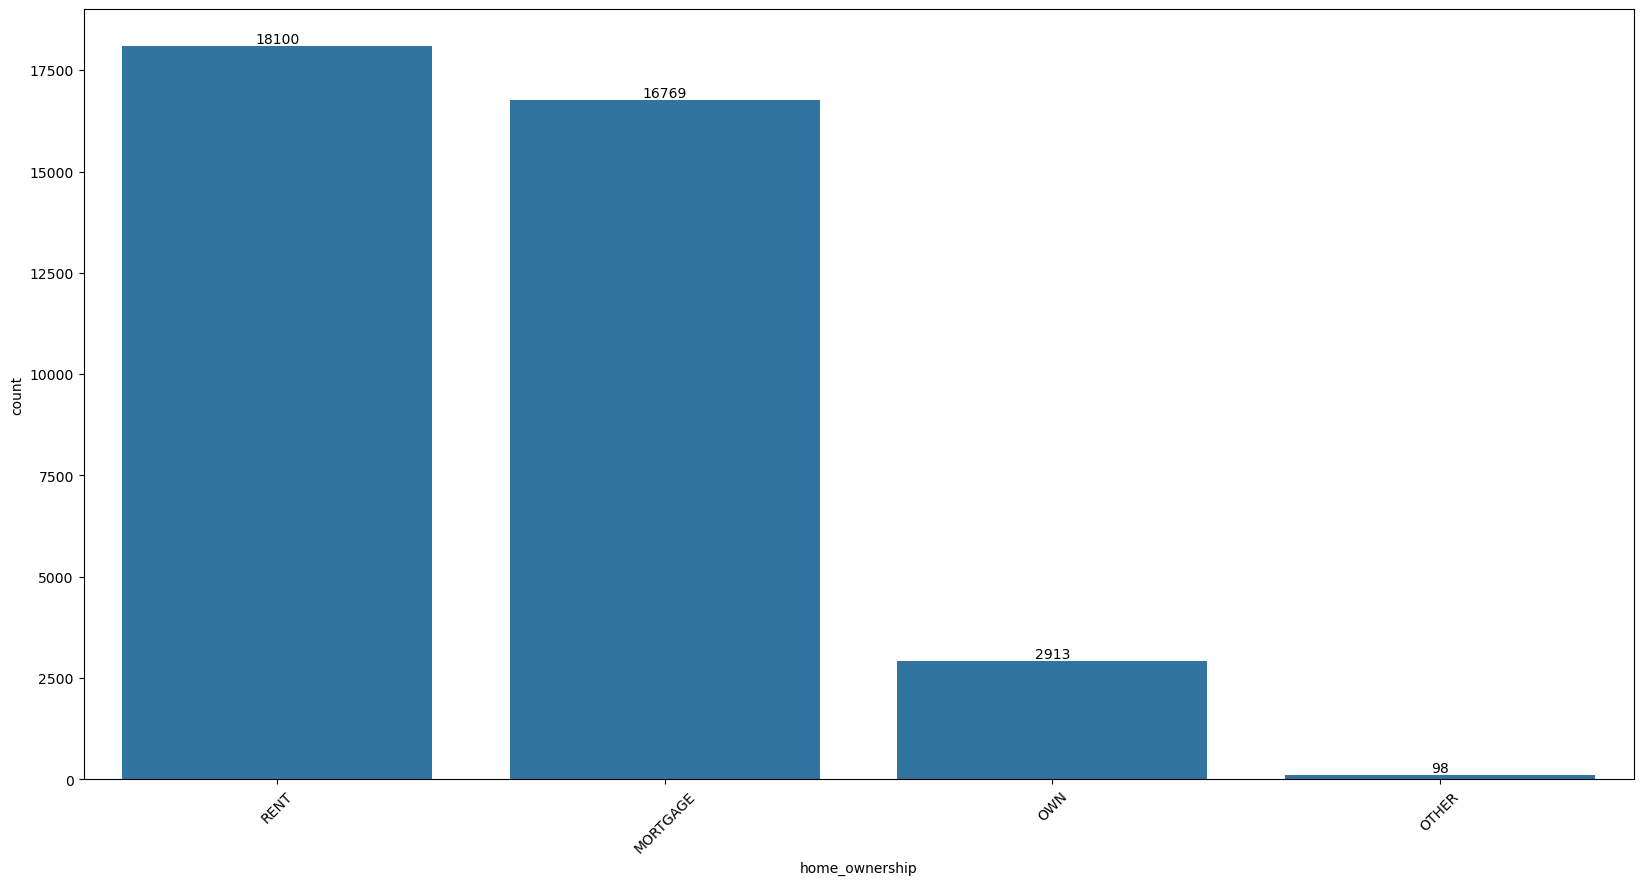

Countplot of loan_status


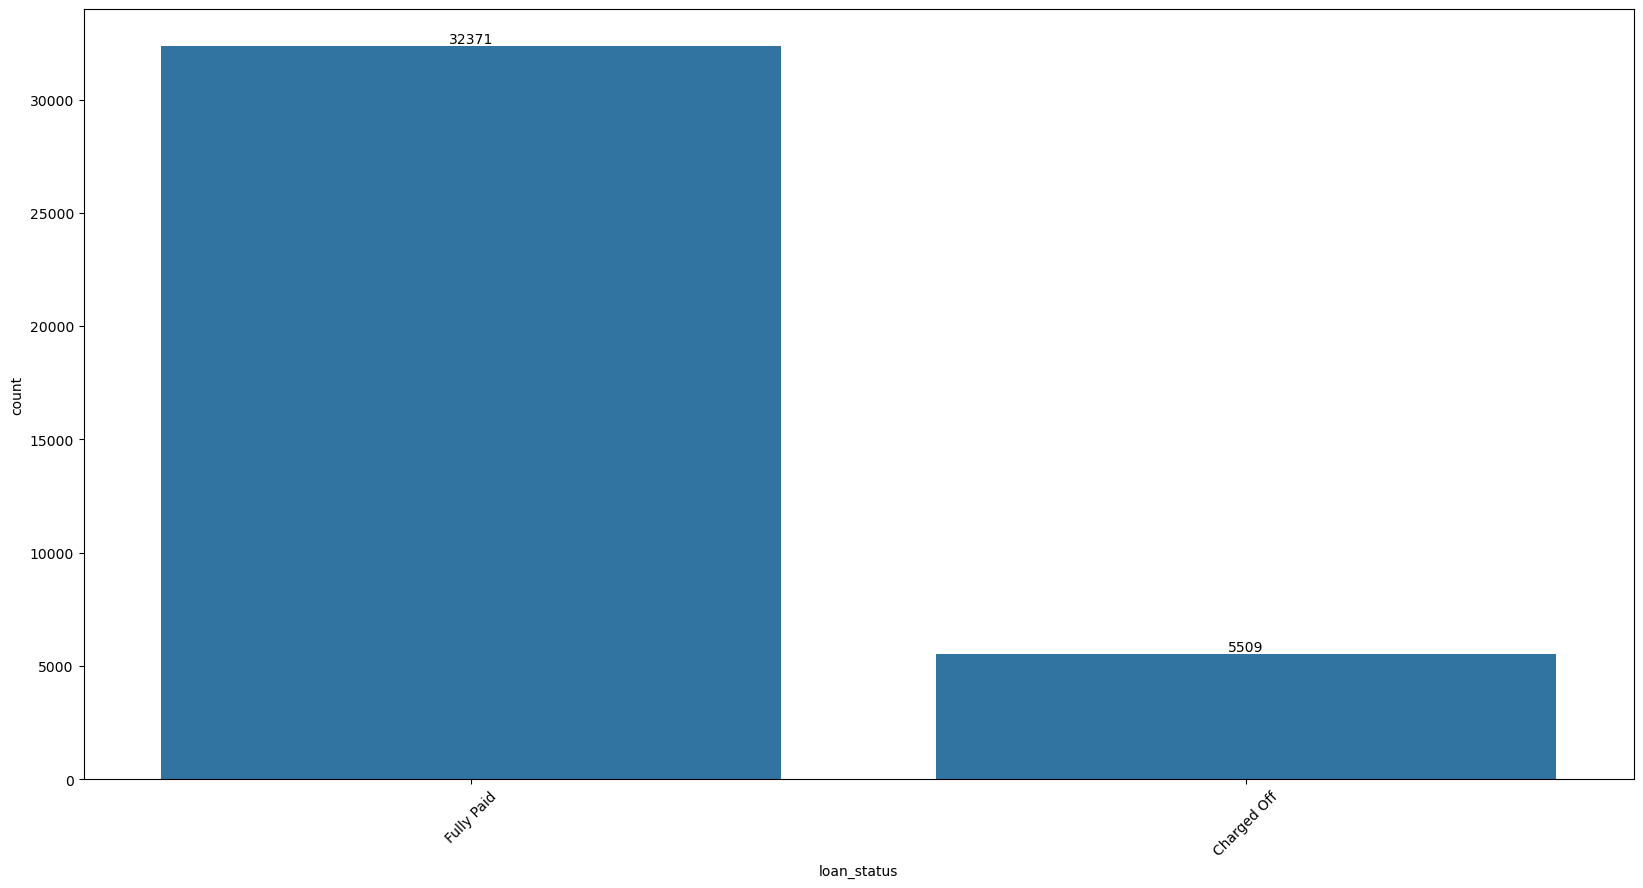

Countplot of purpose


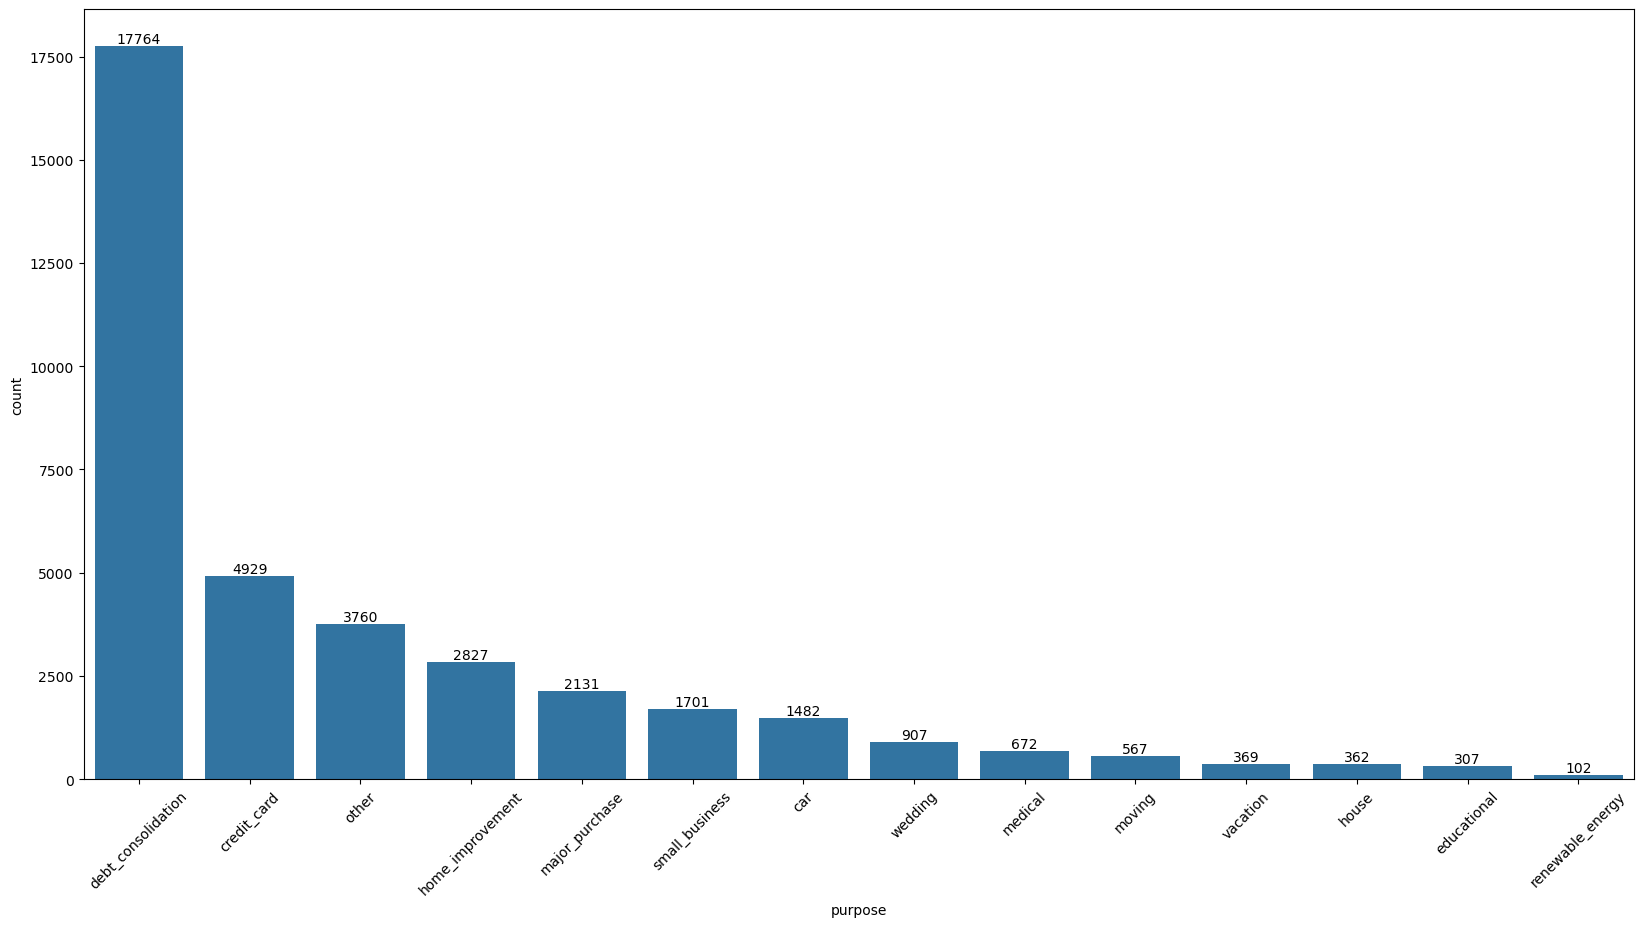

In [99]:
for i in unorder_catextra_cols:
    print("Countplot of",i)
    plt.figure(figsize = (20,10))
    ax = sns.countplot(x=Loan_df[i],order = Loan_df[i].value_counts(ascending=False).index)
    abs_values = Loan_df[i].value_counts(ascending=False).values
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    plt.xticks(rotation=45)
    plt.show()

### 8.3 Numerical/Quantitative Variables

Countplot of dti


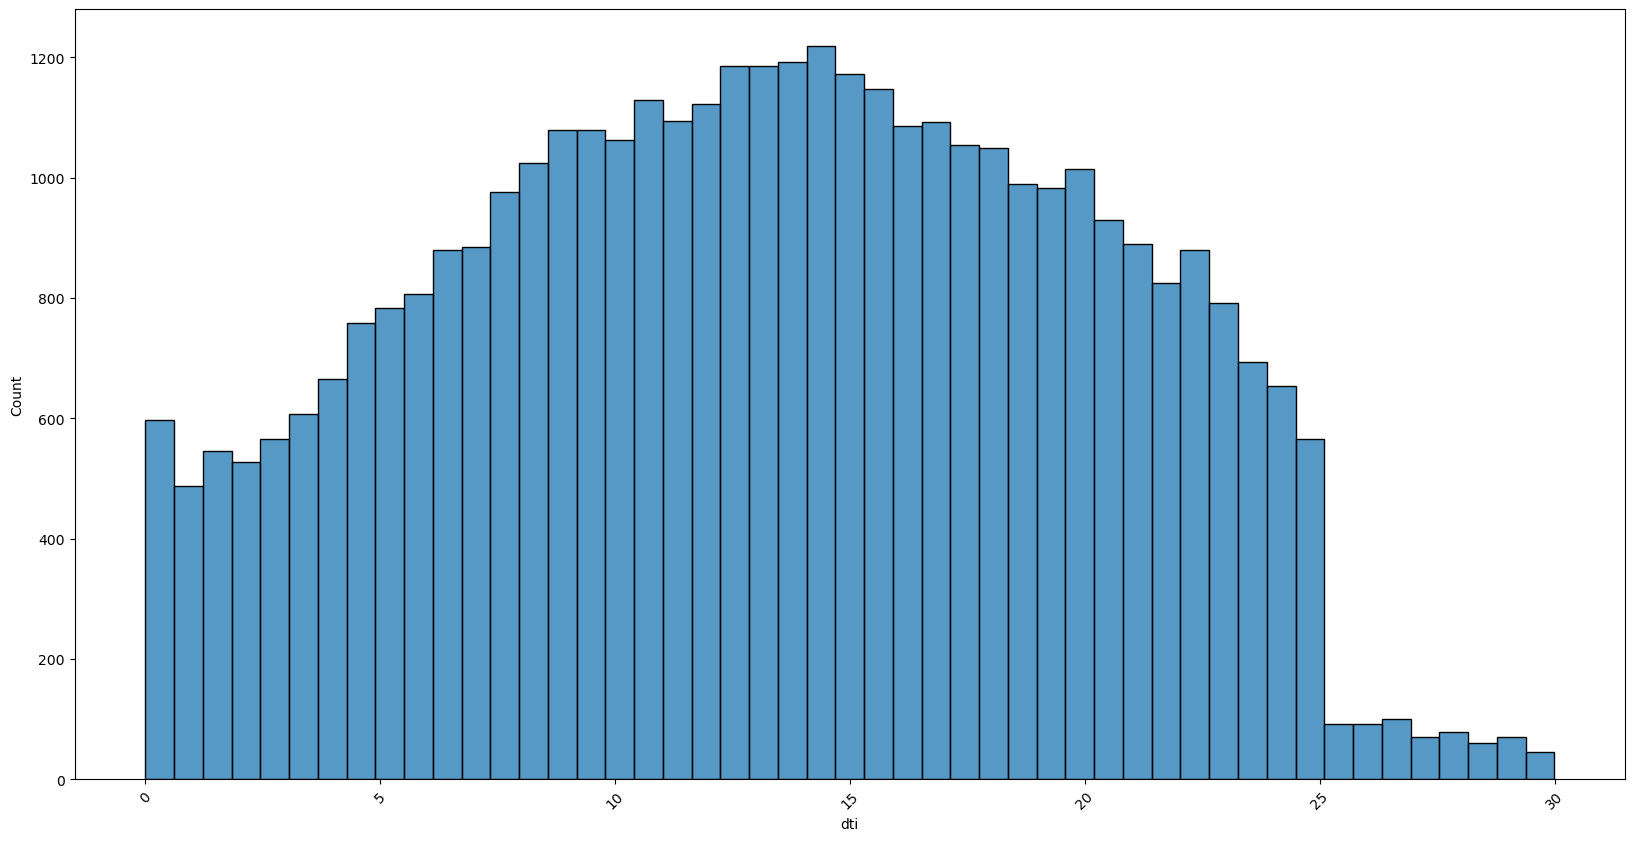

Countplot of funded_amnt


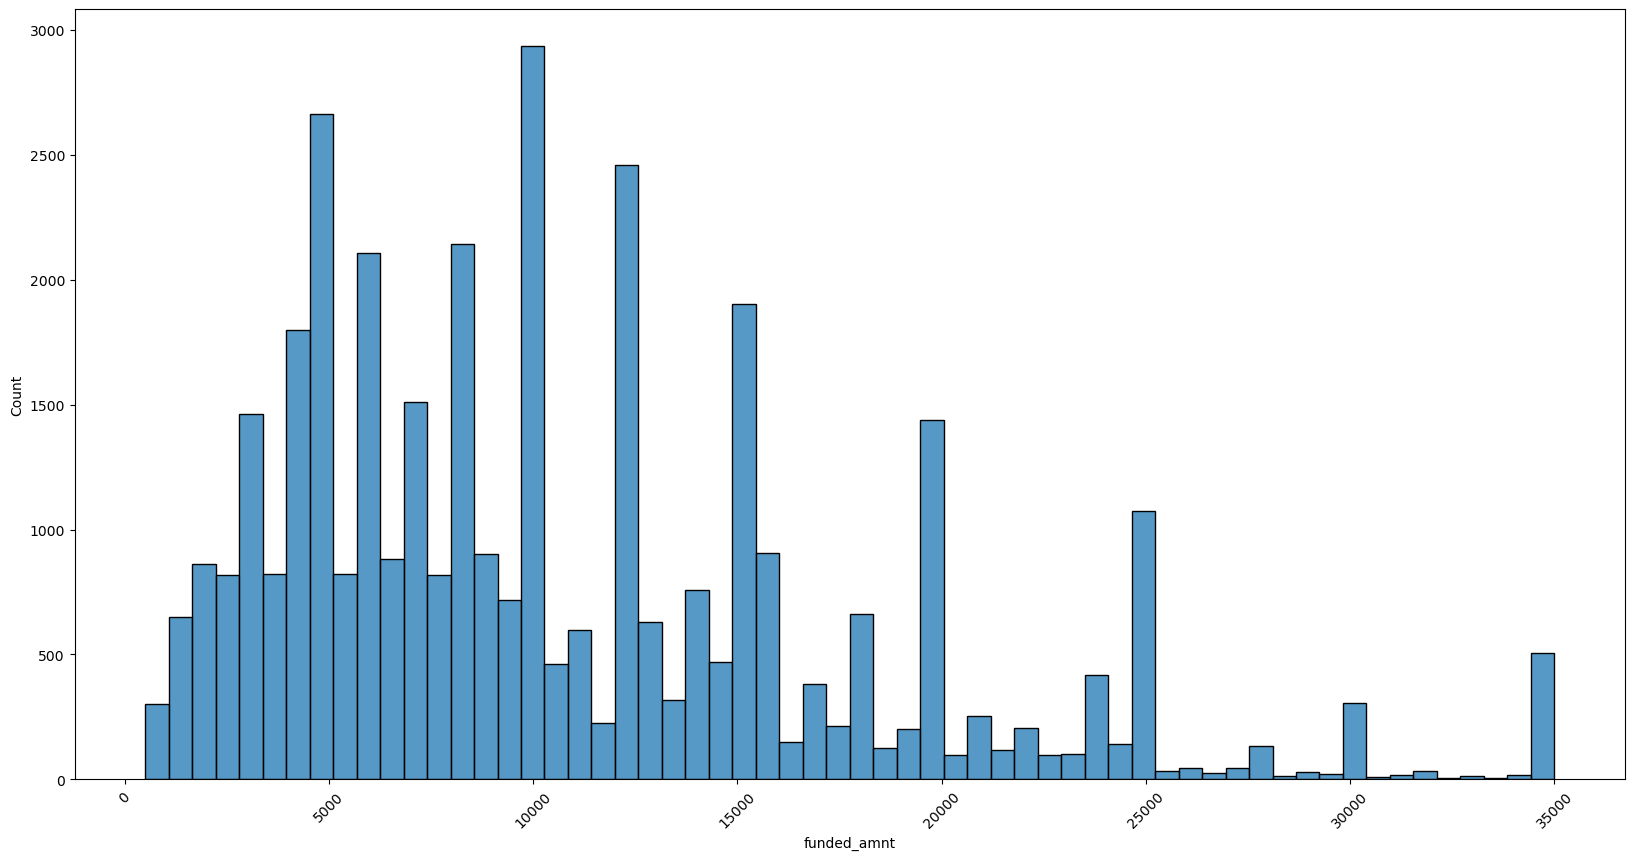

Countplot of funded_amnt_inv


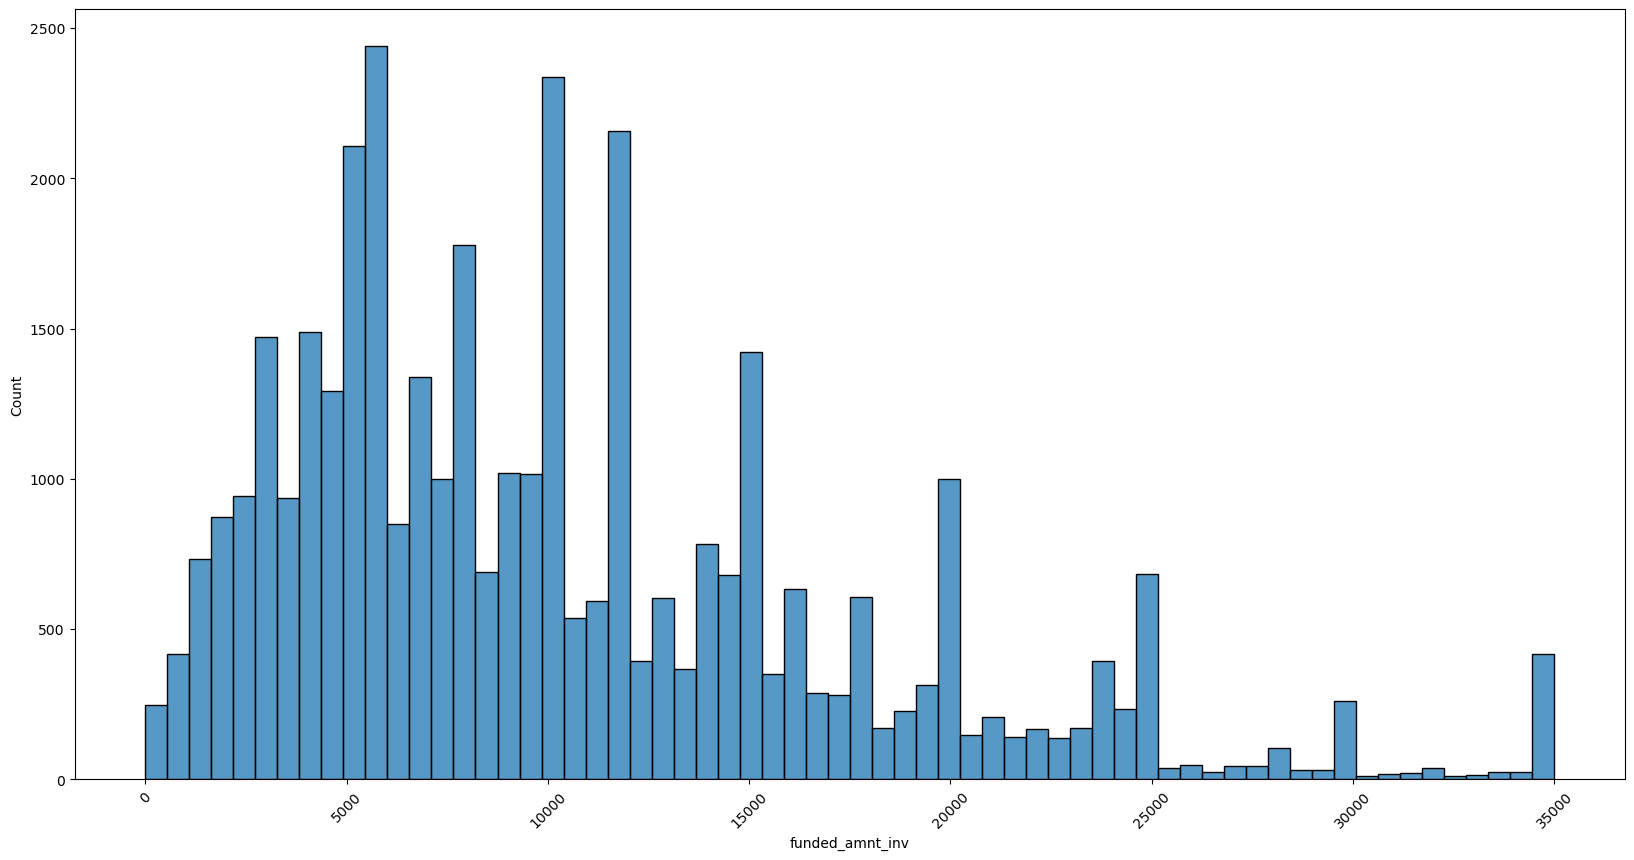

Countplot of installment


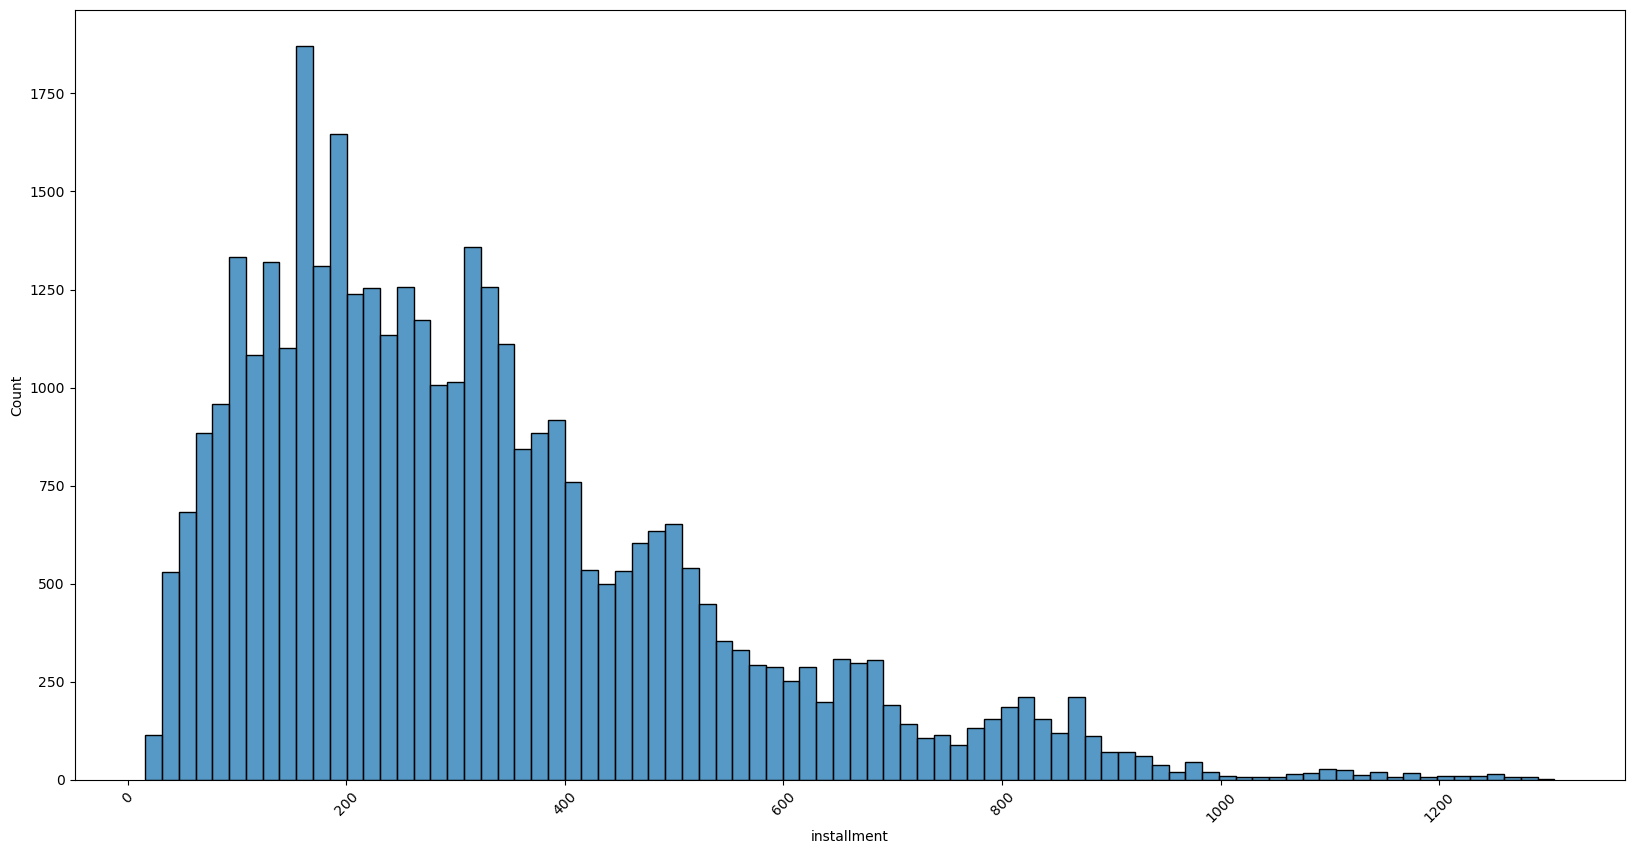

Countplot of int_rate


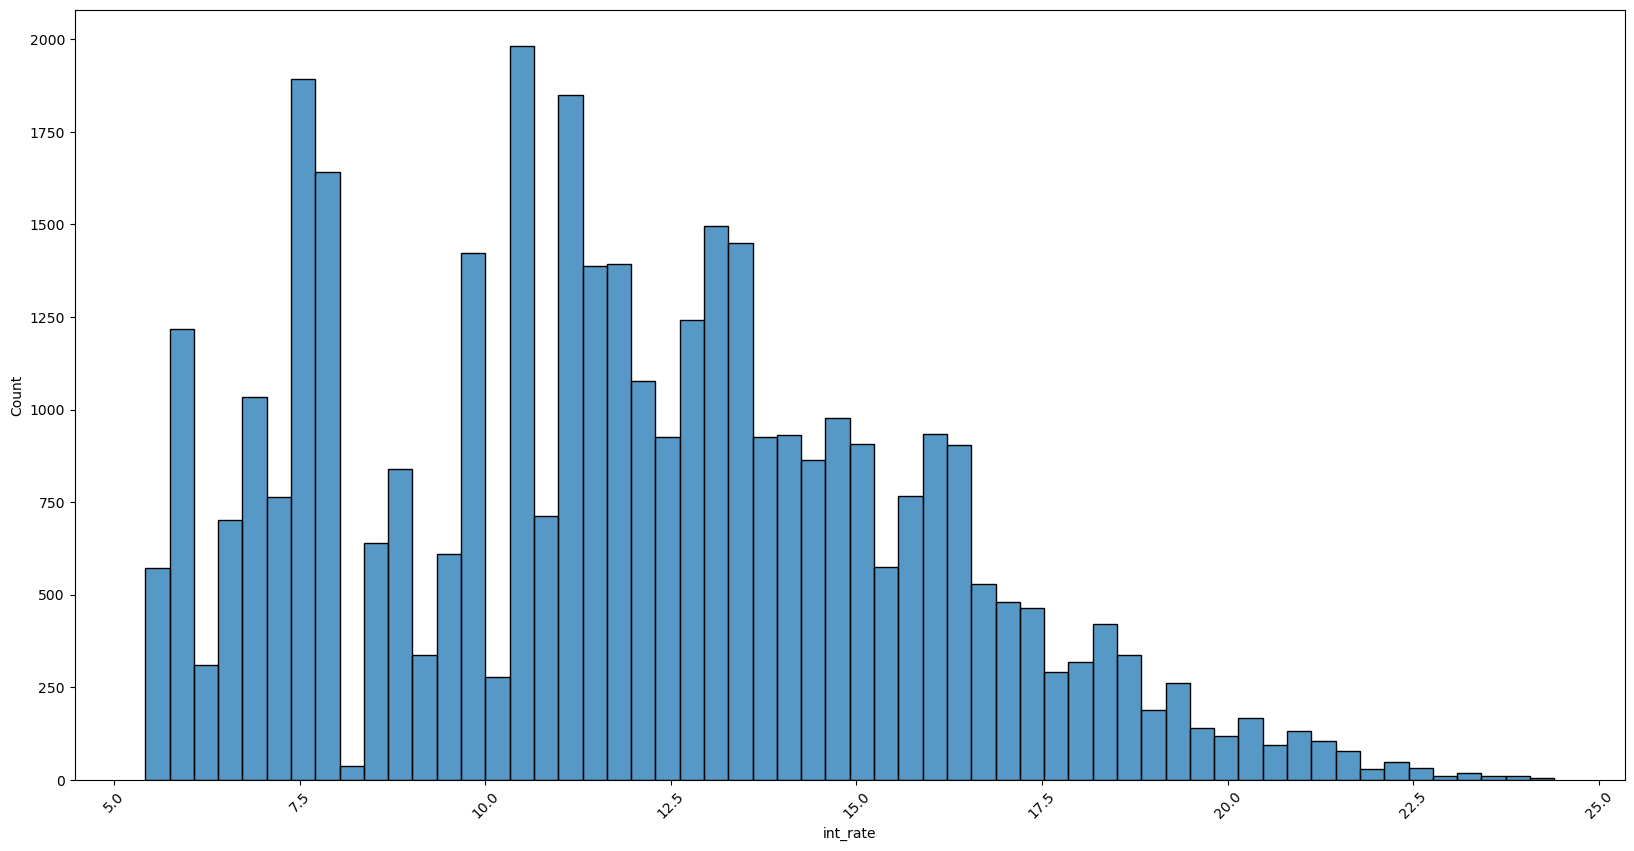

Countplot of loan_amnt


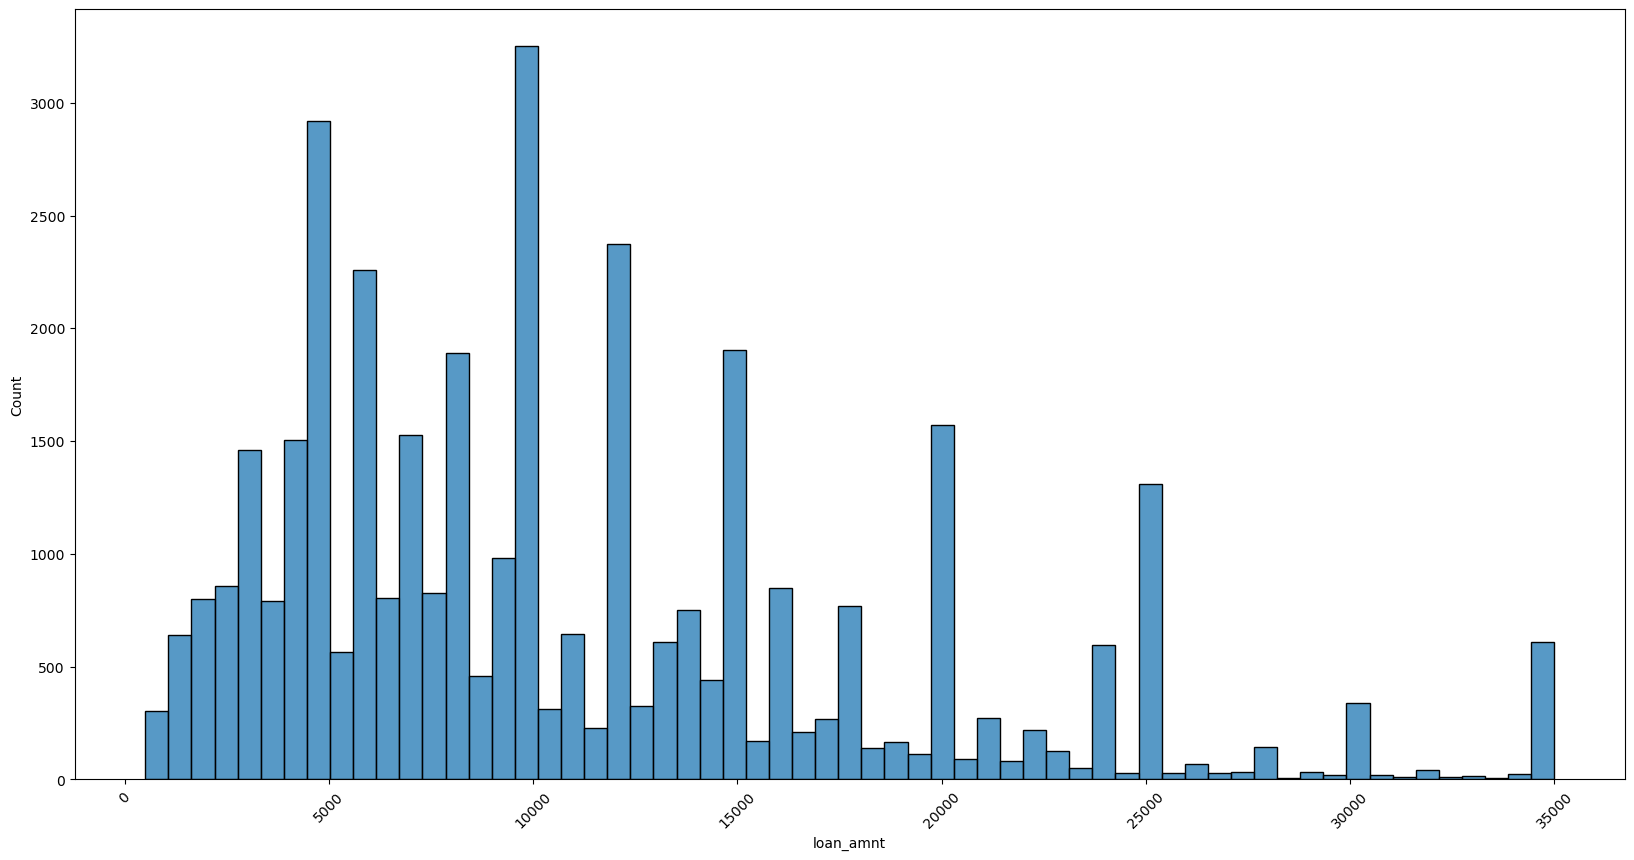

Countplot of member_id


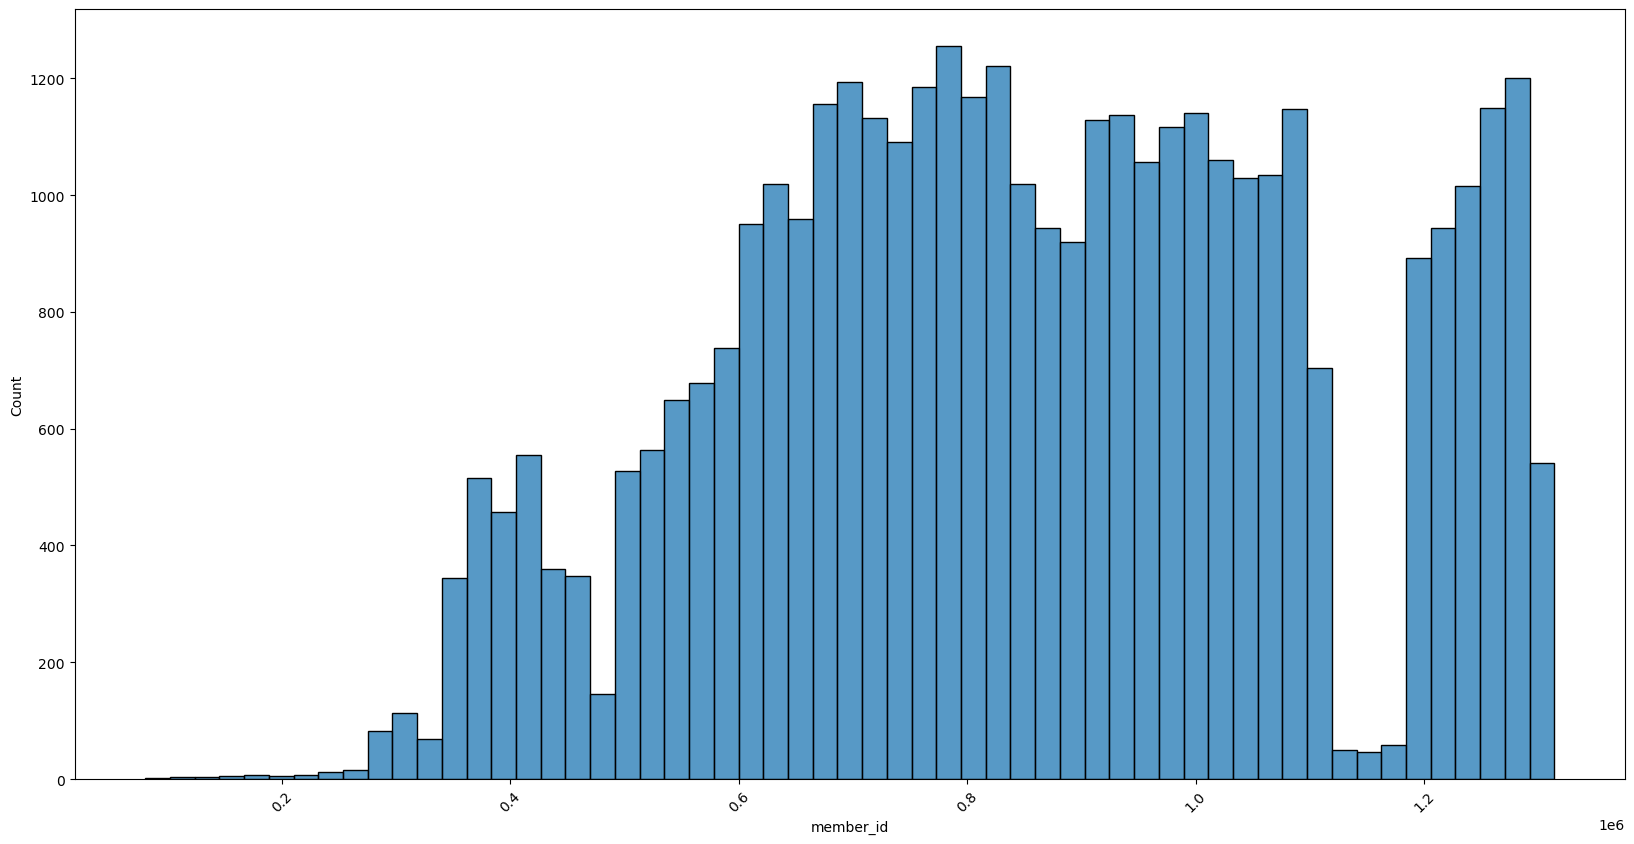

Countplot of total_acc


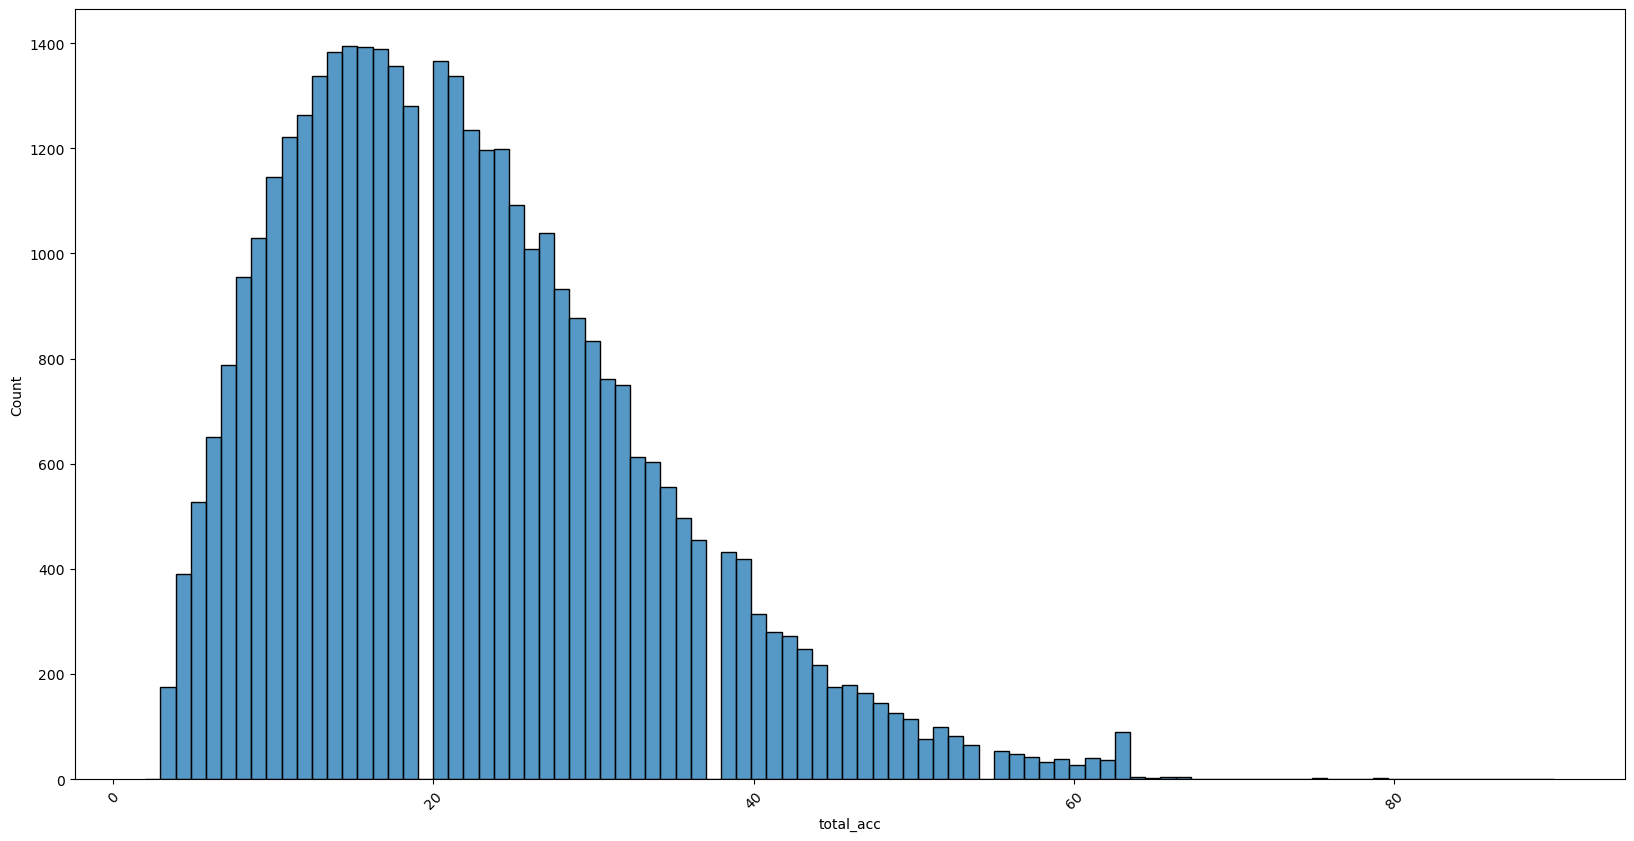

Countplot of total_pymnt


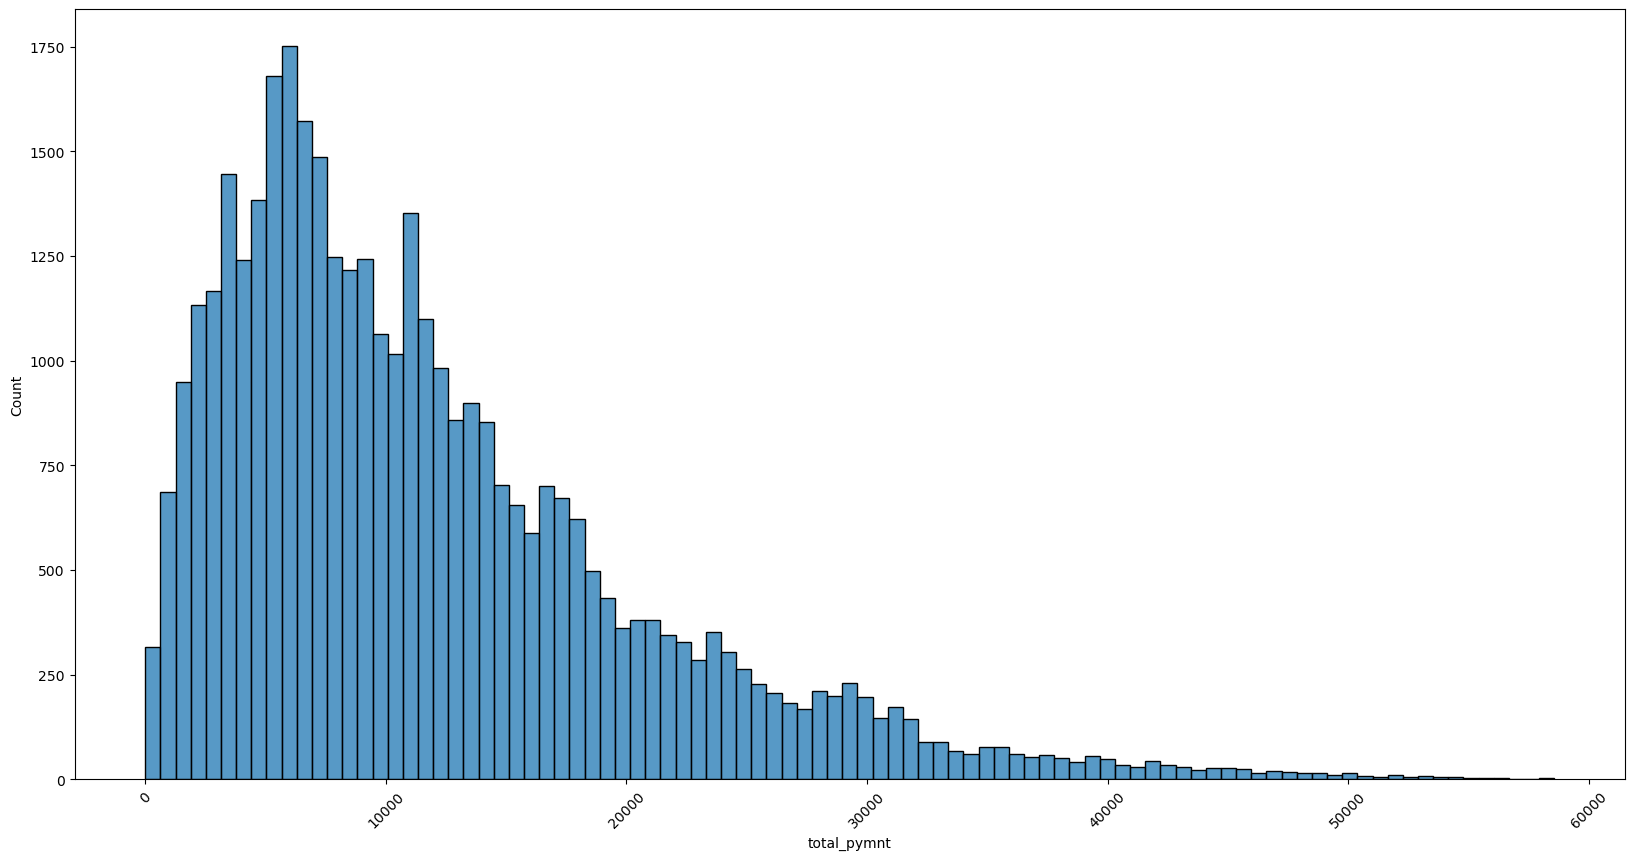

Countplot of total_pymnt_inv


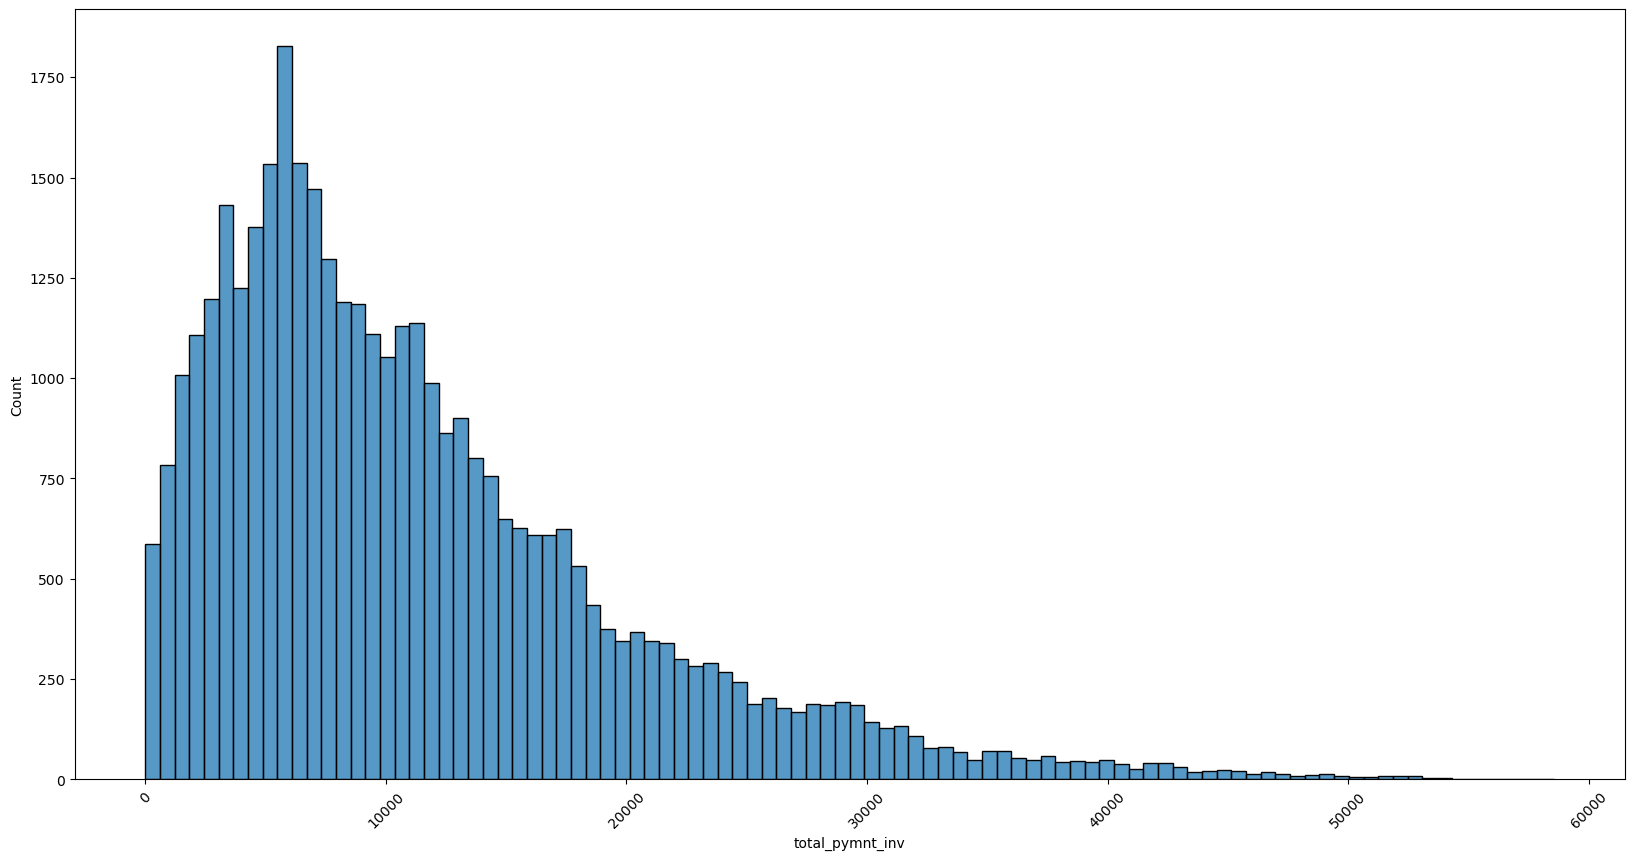

Countplot of total_rec_int


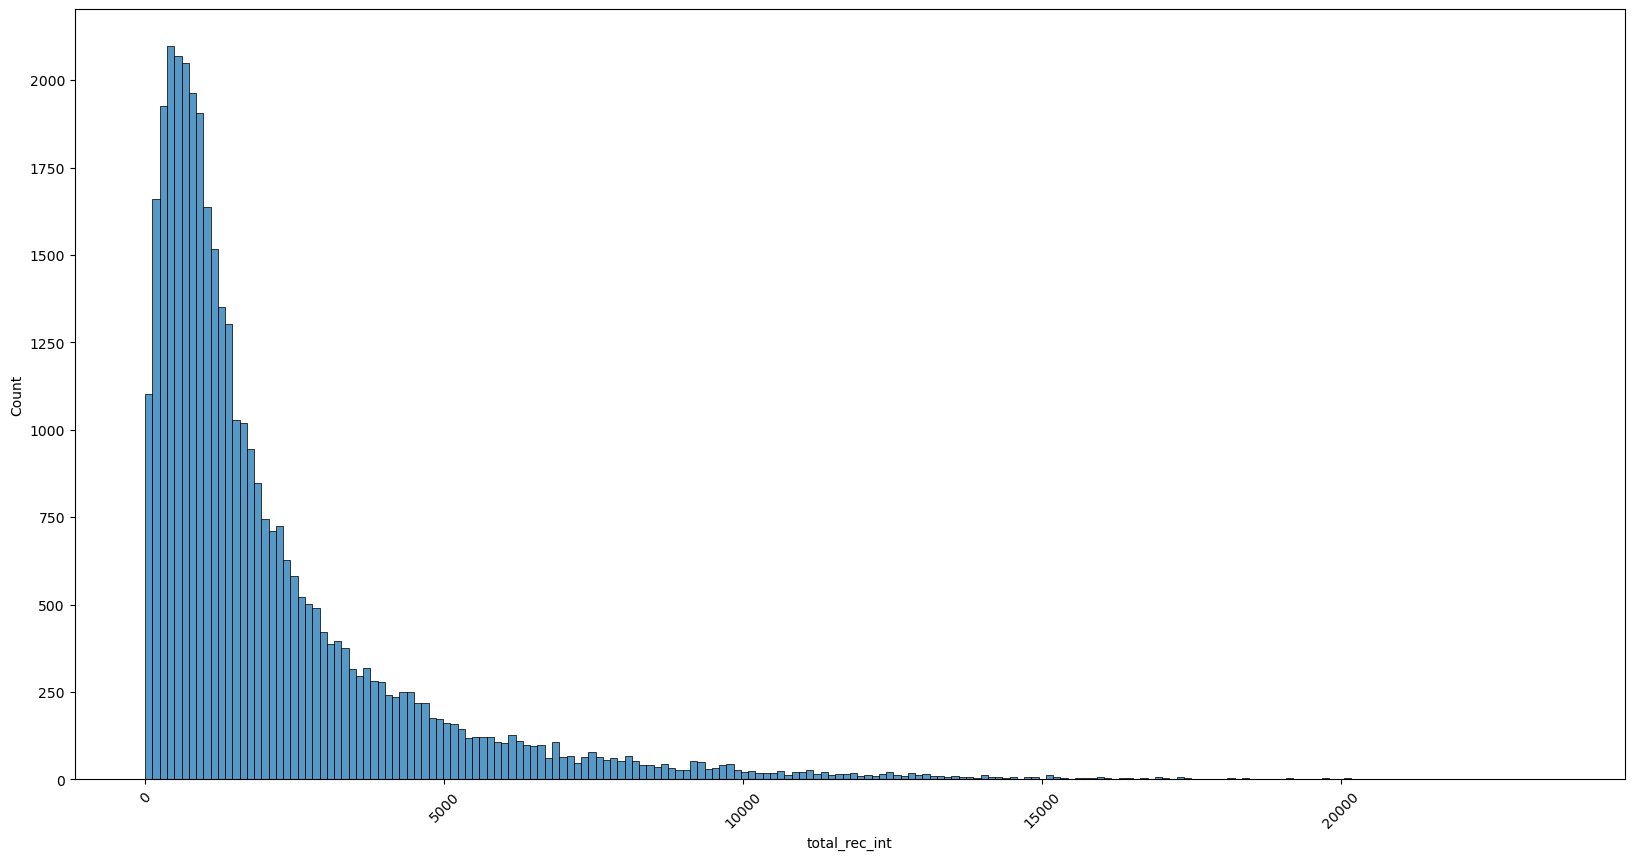

Countplot of total_rec_late_fee


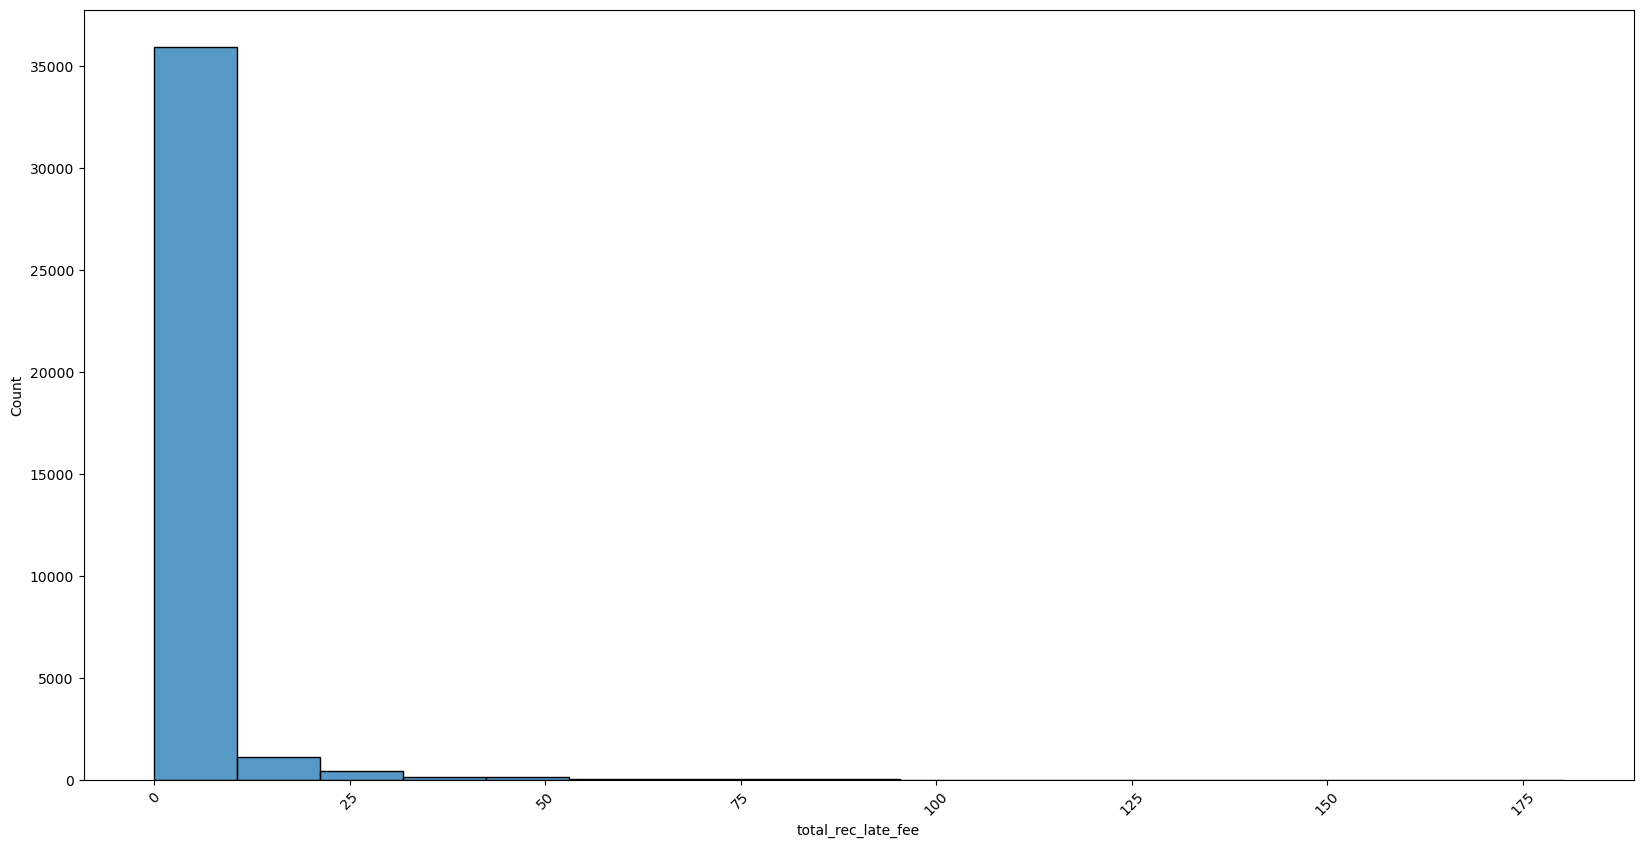

Countplot of total_rec_prncp


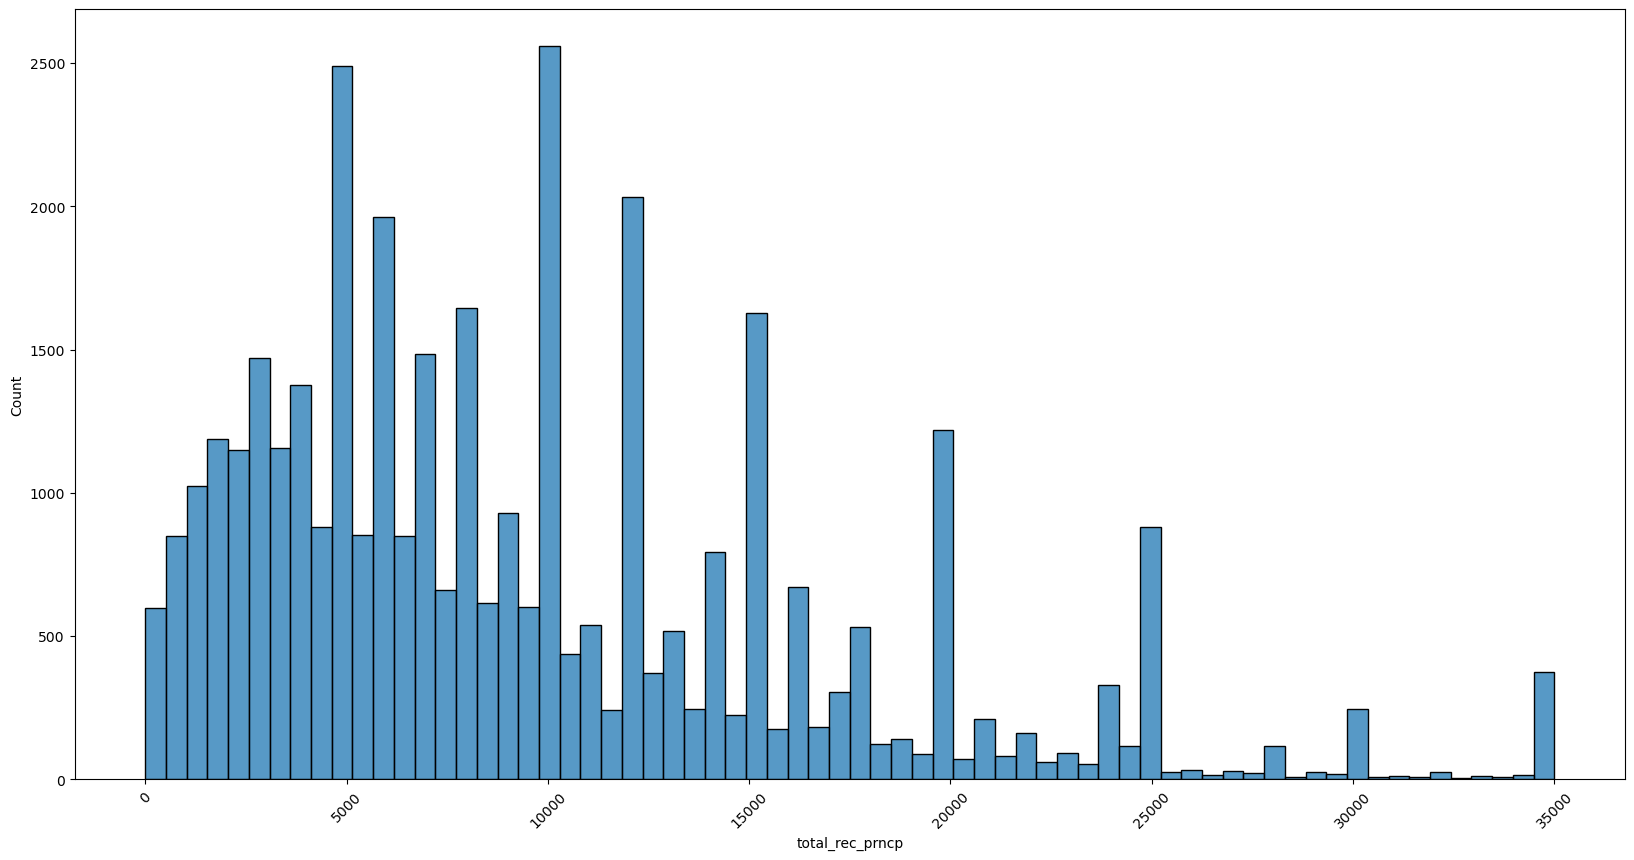

Countplot of annual_inc


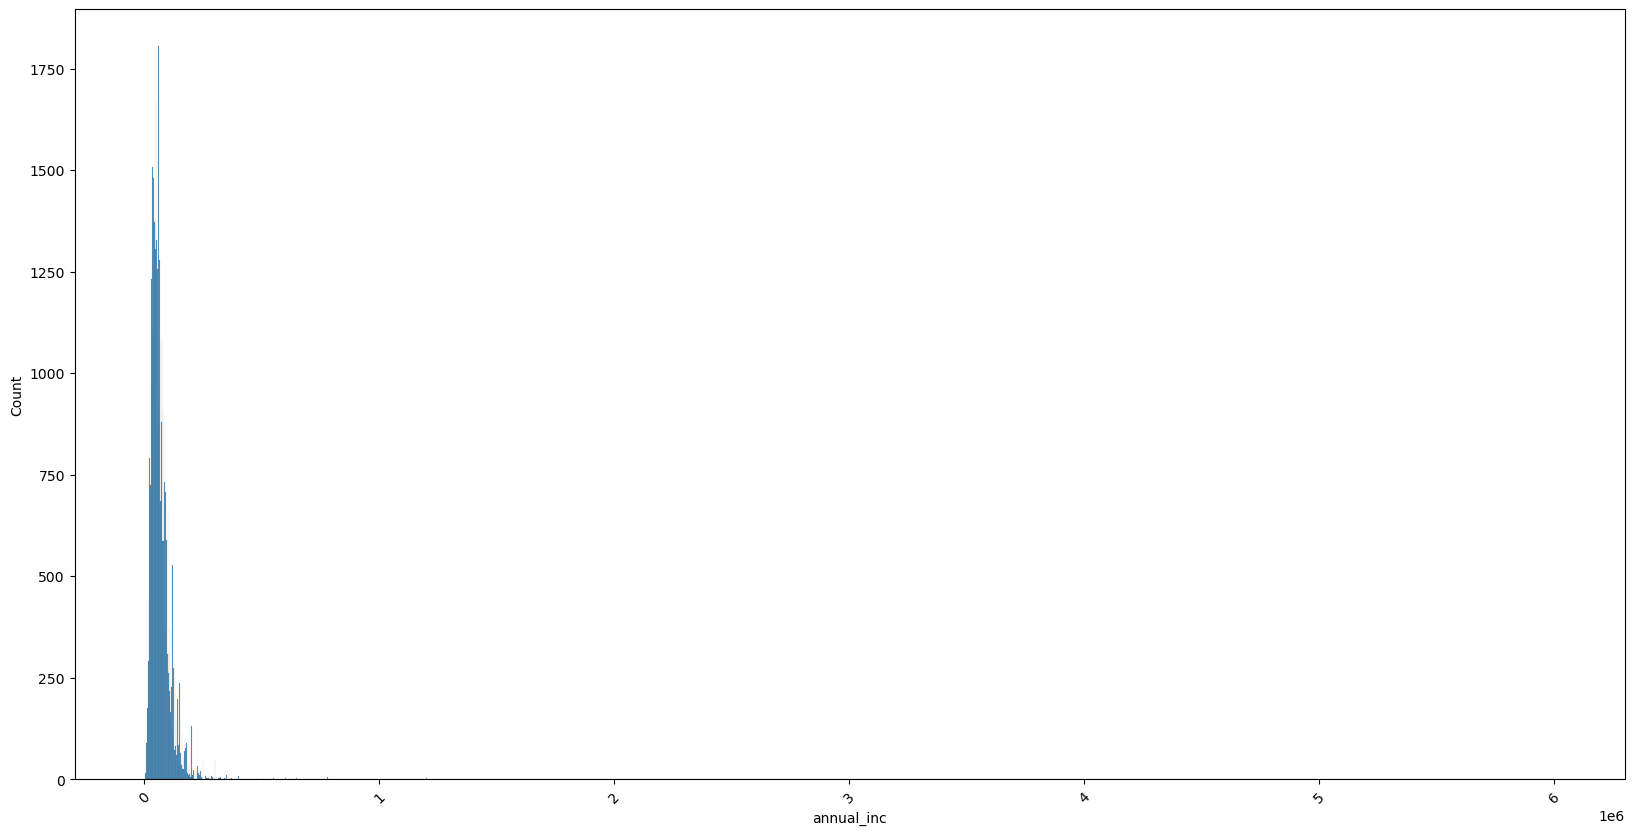

In [100]:
for i in quanti_num_cols:
    print("Countplot of",i)
    plt.figure(figsize = (20,10))
    ax = sns.histplot(x=Loan_df[i])
    plt.xticks(rotation=45)
    plt.show()

### 8.4 Summary of Univariate Analysis

Insights and observations from Univariate Analysis

- The majority of the loans fall within the range of 5000 to 15000 dollars.
- The majority of loan interest rates fall between 9% and 14%.
- Most of the individuals with "Charged off" loans resided in rental properties. The lending company needs to evaluate the financial situation of individuals residing in rental properties, as they could be more vulnerable to changes in the economy.
- The majority of the borrower's annual income falls between 40,000 and 75,000.
- The majority of the loans were used for consolidating debts and paying off credit card bills. The number of loans that have been charged off is also high for these loans.
- The majority of them reside in either rented accommodations or have mortgages on their homes. There is a high number of applicants from these categories, leading to a high rate of charge-offs.
- It is observed that the number of loan applications is increasing each year. Therefore, the rise in the number of loan applications is contributing to an increase in the number of charged off applications.
- Applicants who had borrowed money to be repaid over a 60-month period had a higher percentage of charge-offs compared to those who had taken a loan for 36 months.
  

## 9.0 Bivariate Analysis


The fields listed below will be examined during the univariate analysis.

1. Categorical variables
    1. Ordered categorical data
        1. Employment length (emp_length)
        2. Grade (grade)
        3. Sub grade (sub_grade)
        4. Issue month (issue_m)
        5. Issue year (issue_y)
        6. Term 36/60 months (term)
        7. Number of public record bankruptcies(pub_rec_bankruptcies)
        8. Income was verified by LC(verification_status)
    
    2. Unordered categorical data
        1. Address State (addr_state)
        2. Home Ownership (home_ownership)
        3. Loan status (loan_status)
        4. Loan purpose (purpose)
        
2. Quantitative variables
    1. Debt to Income Ratio (dti)
    2. The total amount committed to that loan (funded_amnt)
    3. The total amount committed by investors (funded_amnt_inv)
    4. Installment Amount (installment)
    5. Interest rate (int_rate)
    6. Loan amount (loan_amnt)
    7. A unique LC assigned Id for the borrower member (member_id)
    8. The total number of credit lines currently in the borrower's credit file (total_acc)
    9. Payments received to date for total amount funded (total_pymnt)
    10. Payments received to date for portion of total amount funded by investors (total_pymnt_inv)
    11. Interest received to date (total_rec_int)
    12. Late fees received to date (total_rec_late_fee)
    13. Principal received to date (total_rec_prncp)
    14. Annual income (annual_inc)
    

### 9.1 Ordered Categorical Variables

In [101]:
order_cat_cols_Bivariate=["emp_length","grade","sub_grade","issue_m","issue_y","term","pub_rec_bankruptcies","verification_status"]
unorder_catextra_cols_Bivariate=["addr_state","home_ownership","purpose"]
quanti_num_cols_Bivariate=["dti","funded_amnt","funded_amnt_inv","installment","int_rate","loan_amnt","member_id",
                "total_acc","total_pymnt","total_pymnt_inv","total_rec_int","total_rec_late_fee","total_rec_prncp","annual_inc"]

Countplot of emp_length Vs Loan Status


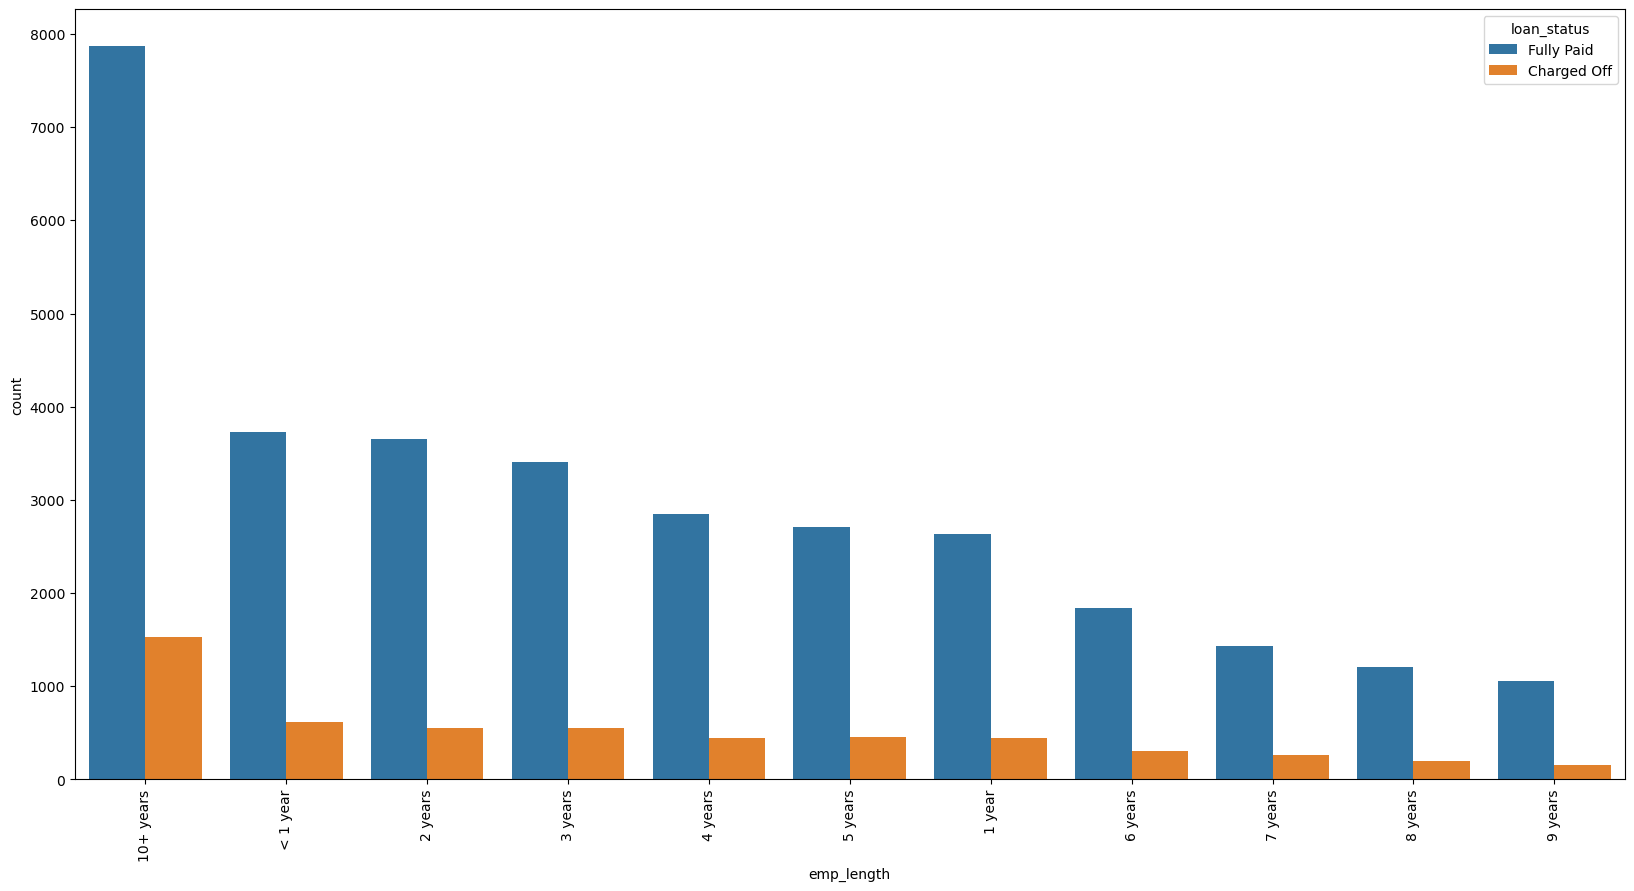

Countplot of grade Vs Loan Status


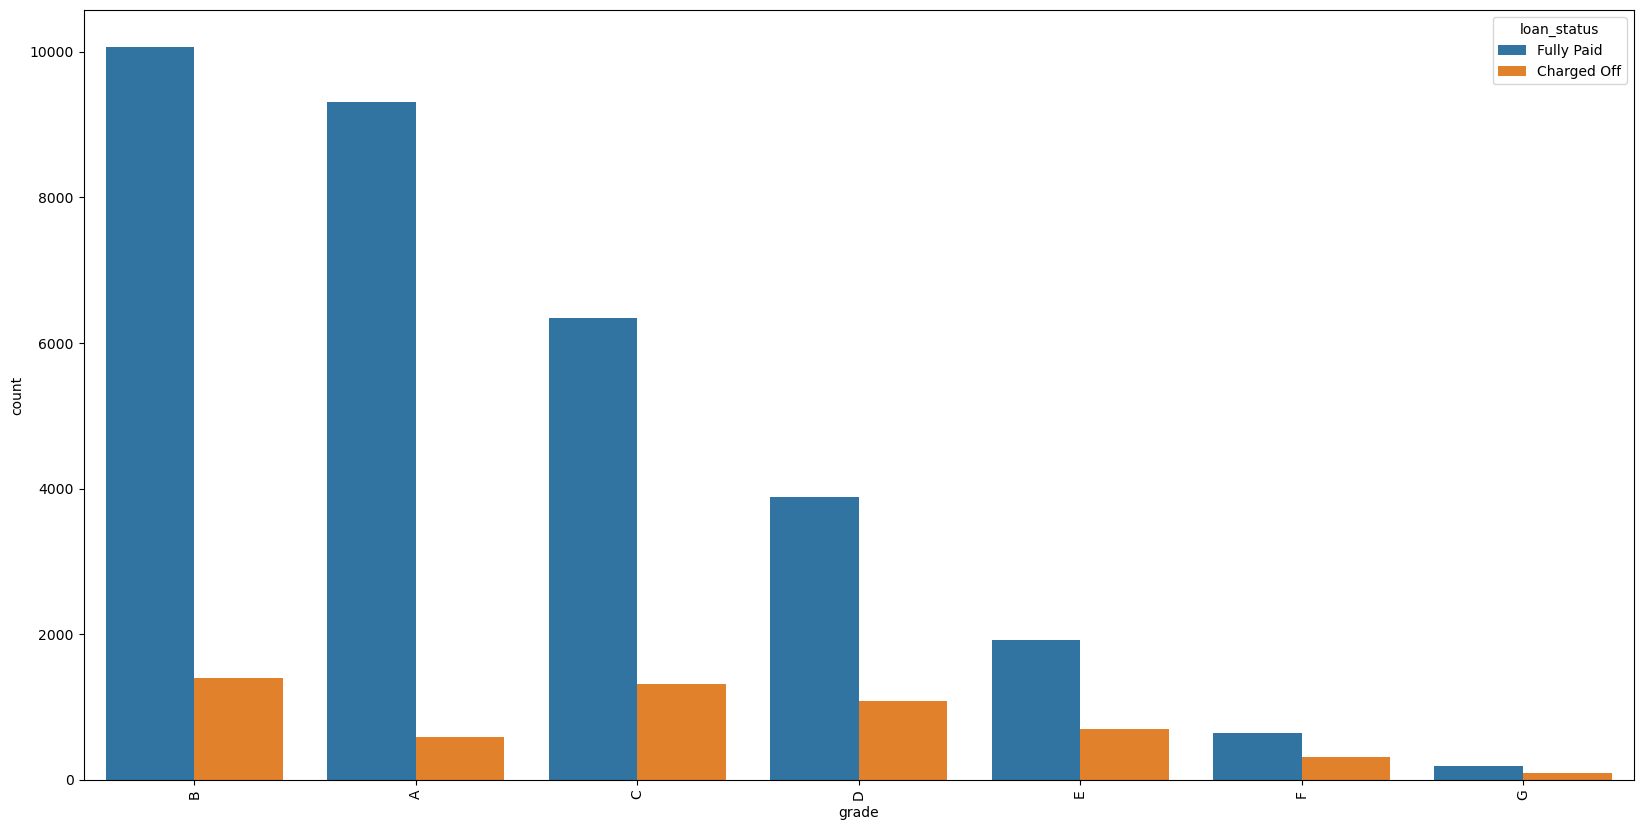

Countplot of sub_grade Vs Loan Status


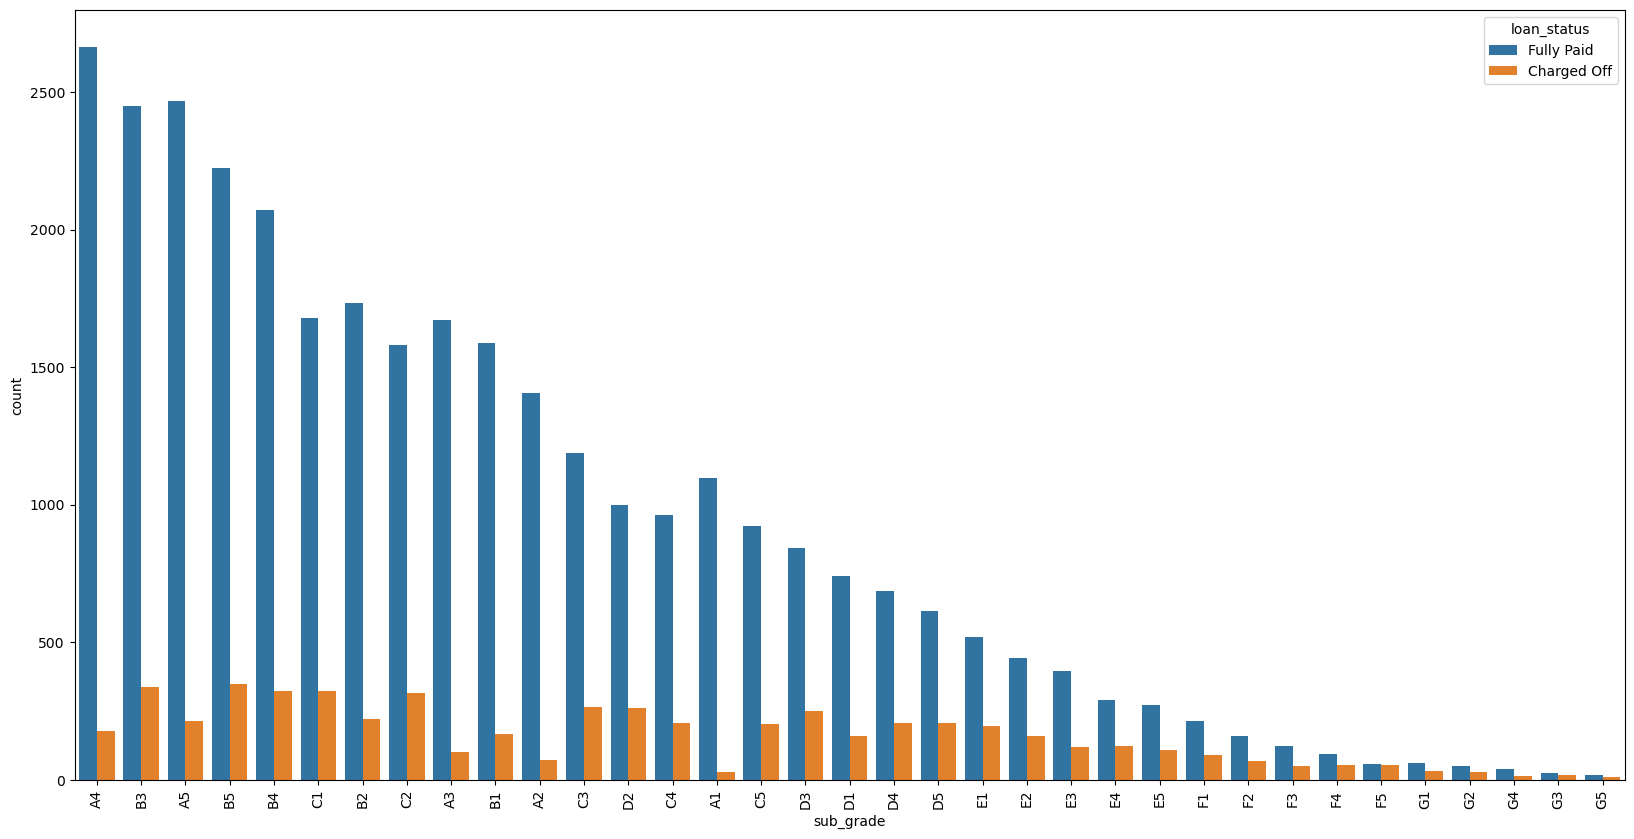

Countplot of issue_m Vs Loan Status


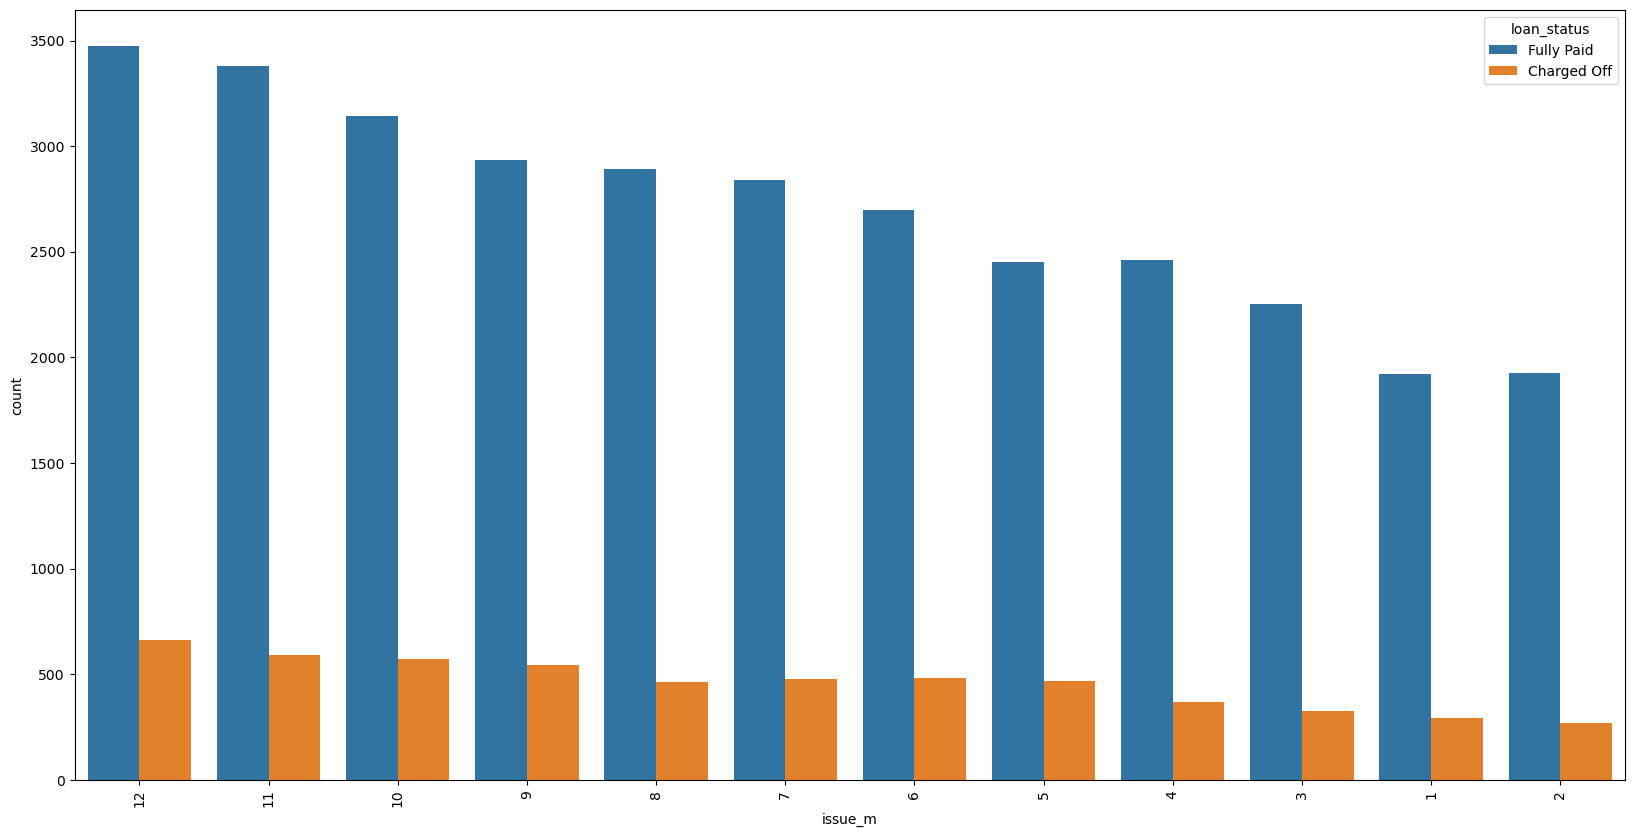

Countplot of issue_y Vs Loan Status


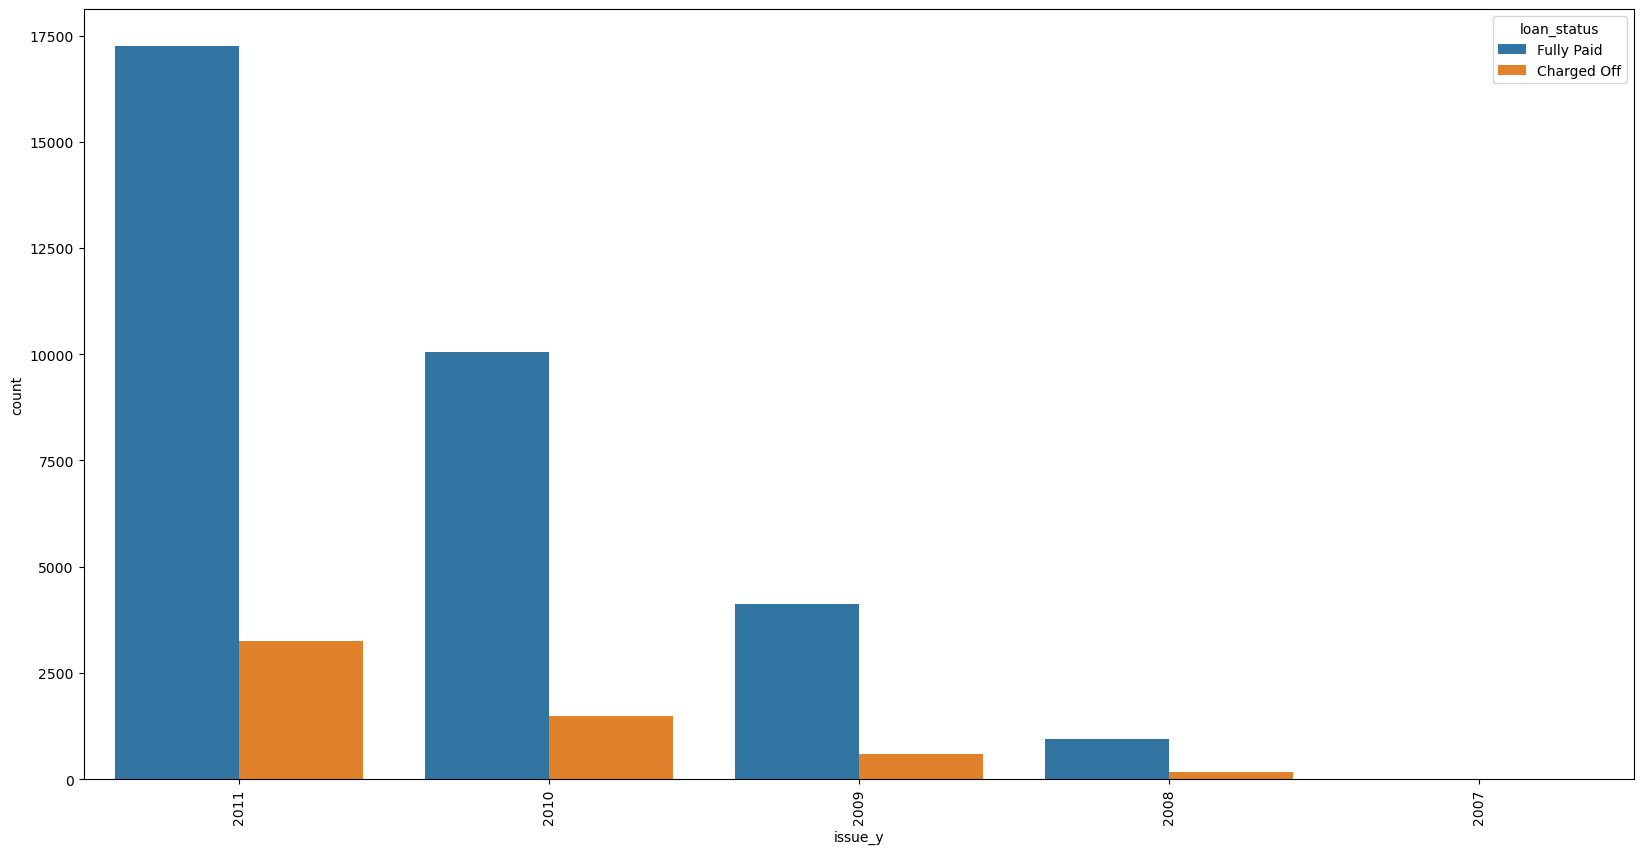

Countplot of term Vs Loan Status


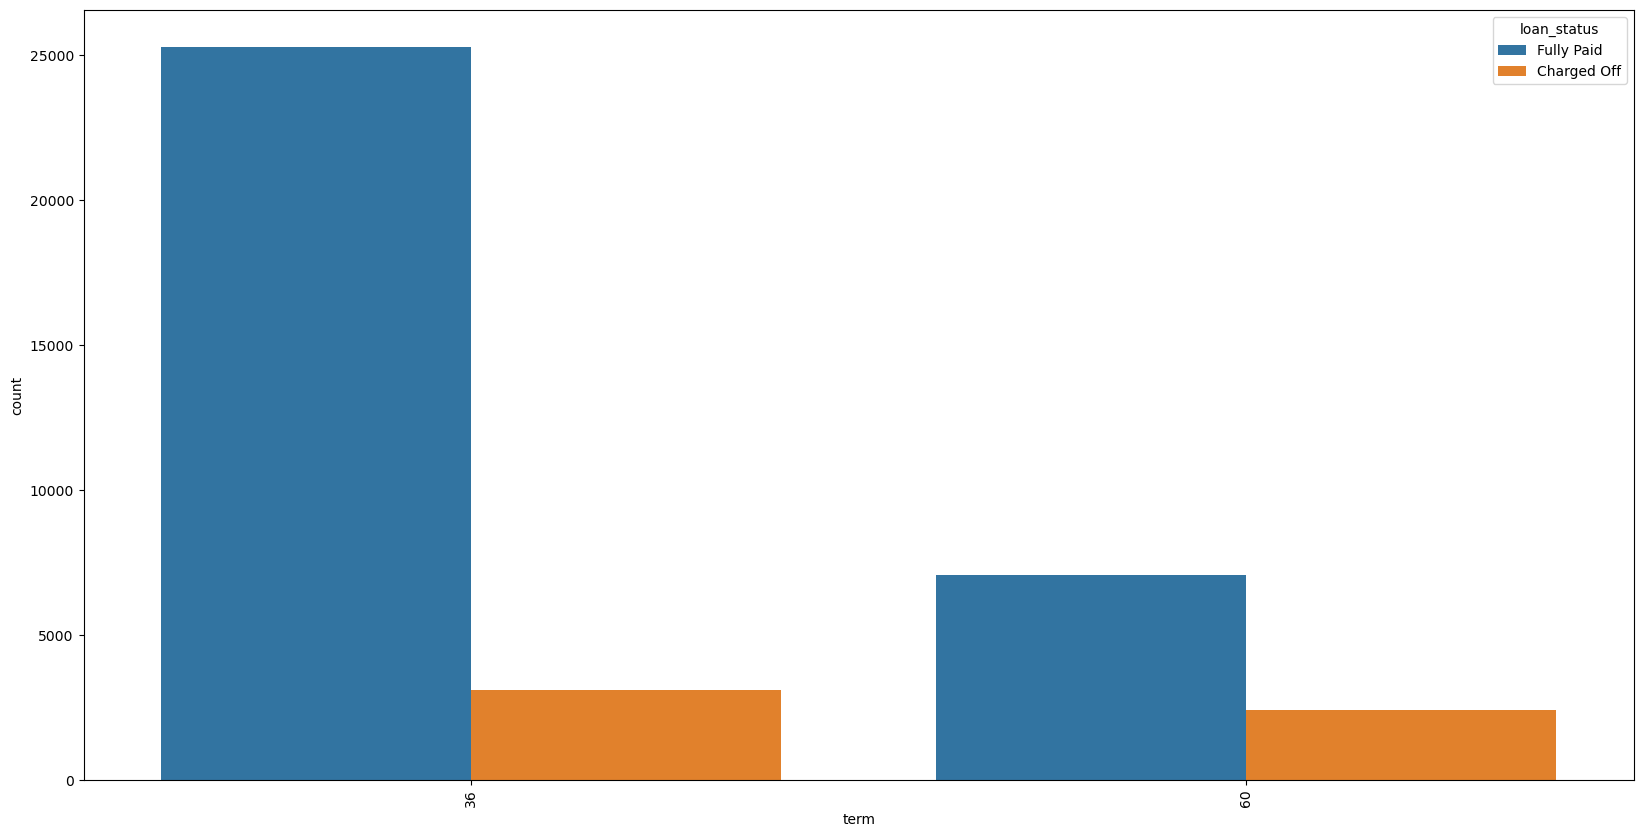

Countplot of pub_rec_bankruptcies Vs Loan Status


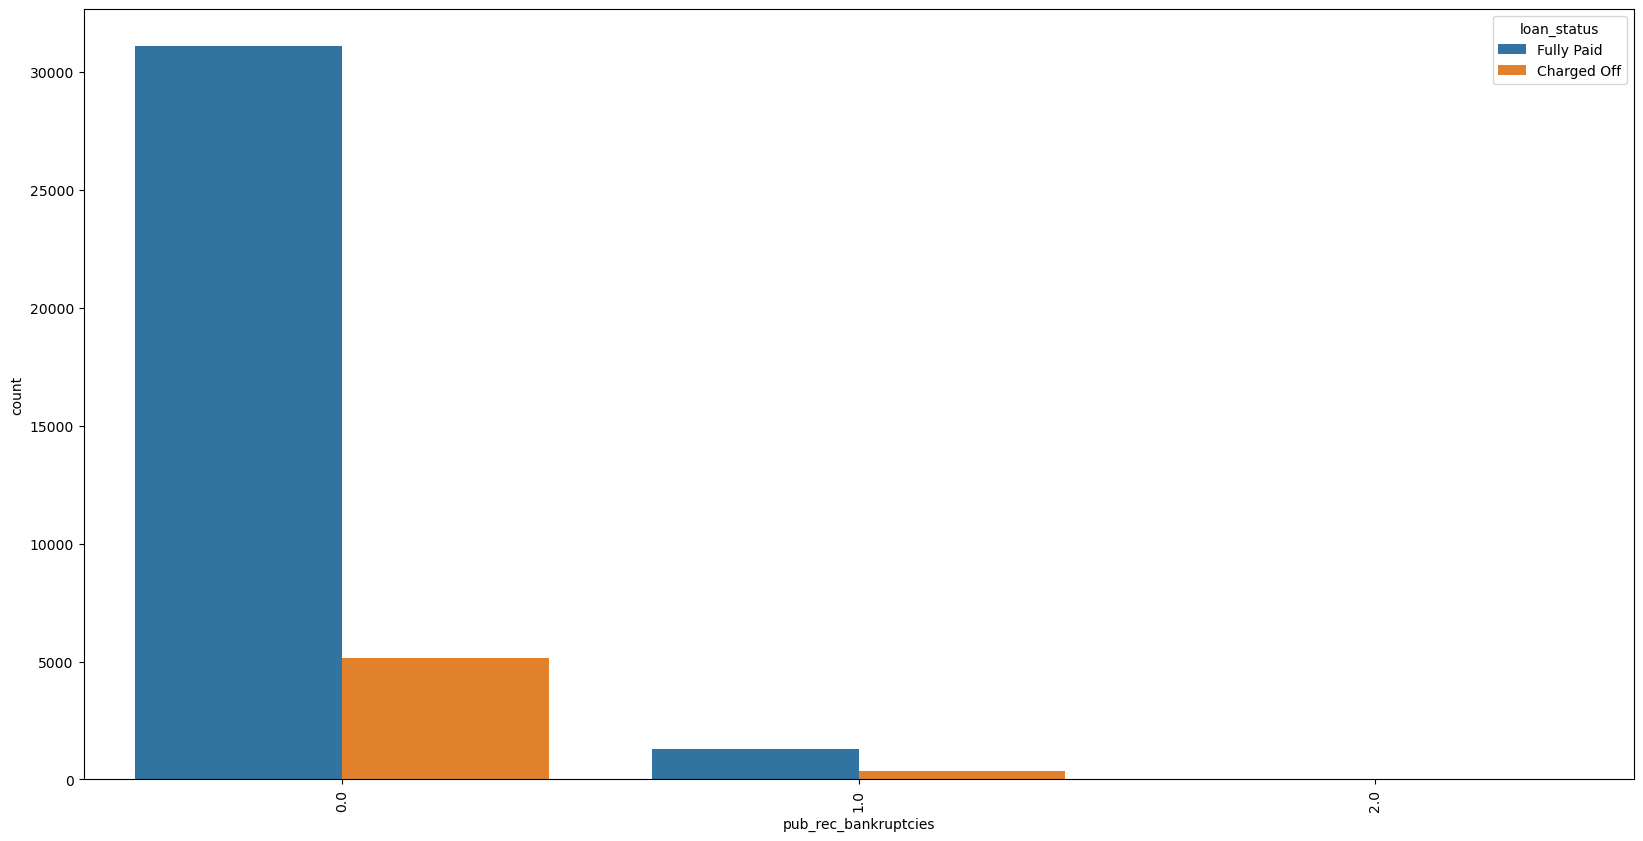

Countplot of verification_status Vs Loan Status


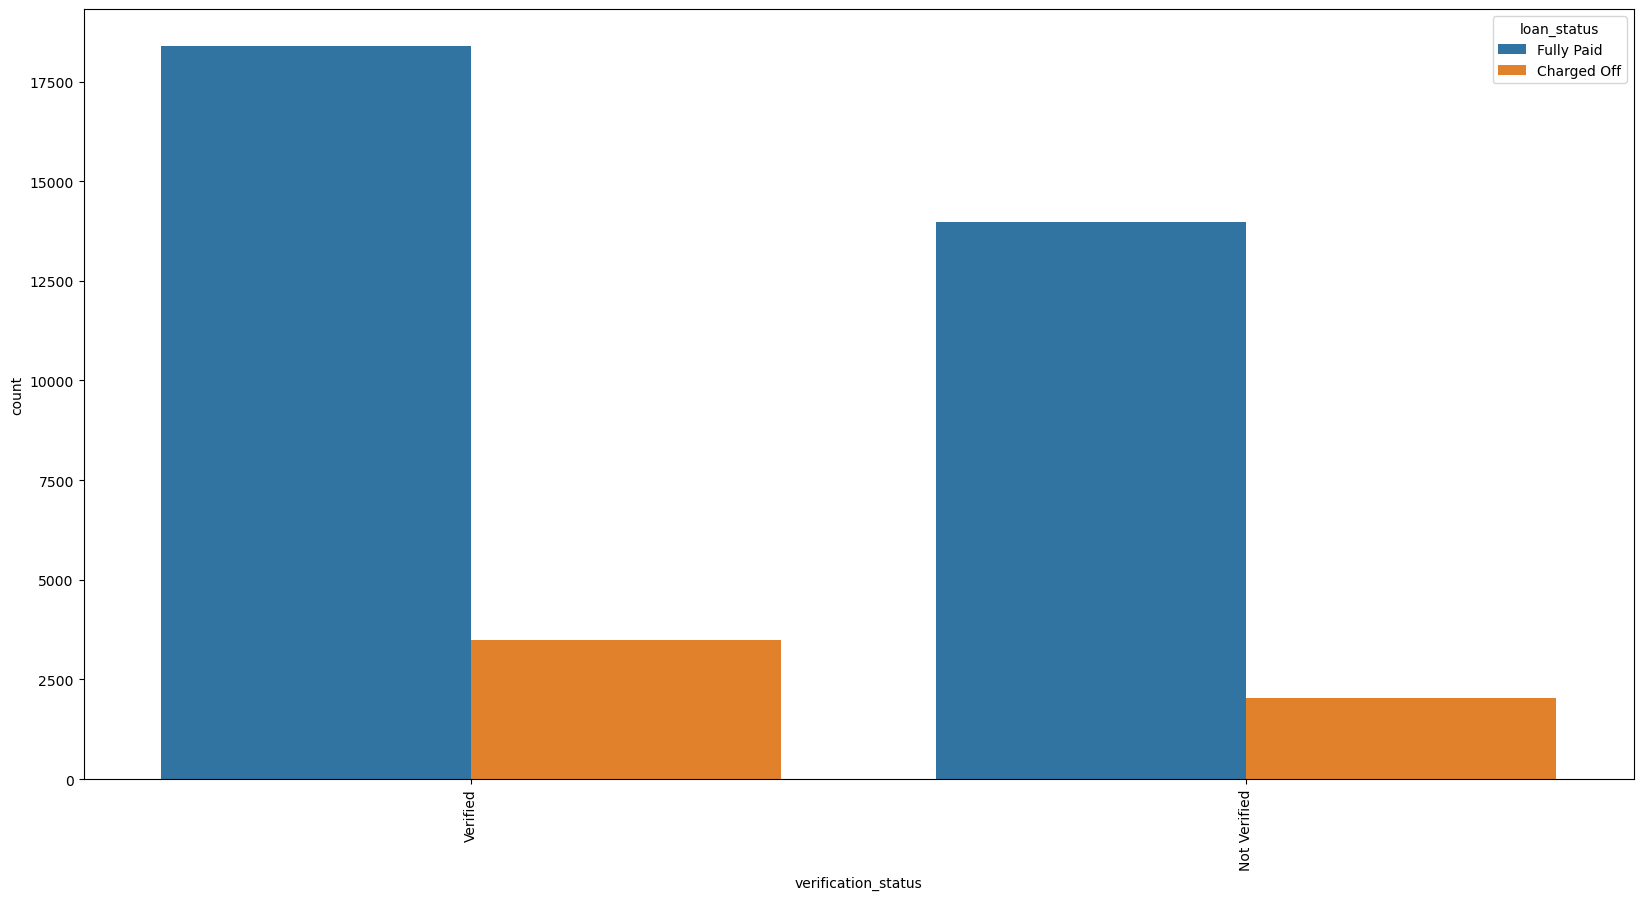

In [102]:
for i in order_cat_cols_Bivariate:
    print("Countplot of",i,"Vs Loan Status")
    plt.figure(figsize = (20,10))
    ax = sns.countplot(x=Loan_df[i],order = Loan_df[i].value_counts(ascending=False).index,hue=Loan_df['loan_status'])
    plt.xticks(rotation=90)
    plt.show()

### 9.2 Unordered Categorical Variables

Countplot of addr_state Vs Loan Status


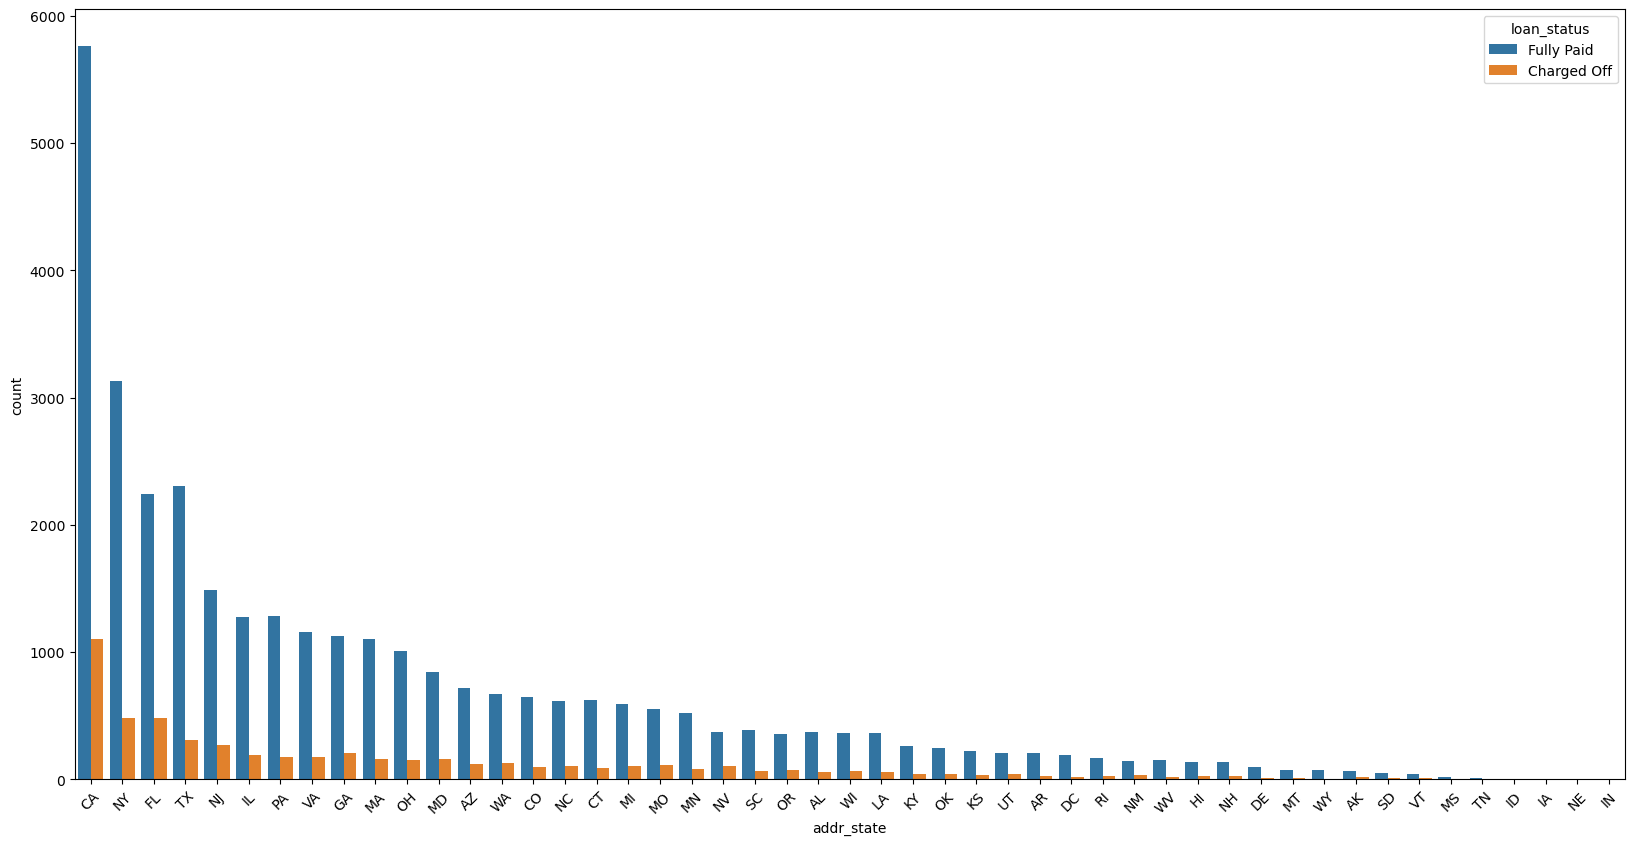

Countplot of home_ownership Vs Loan Status


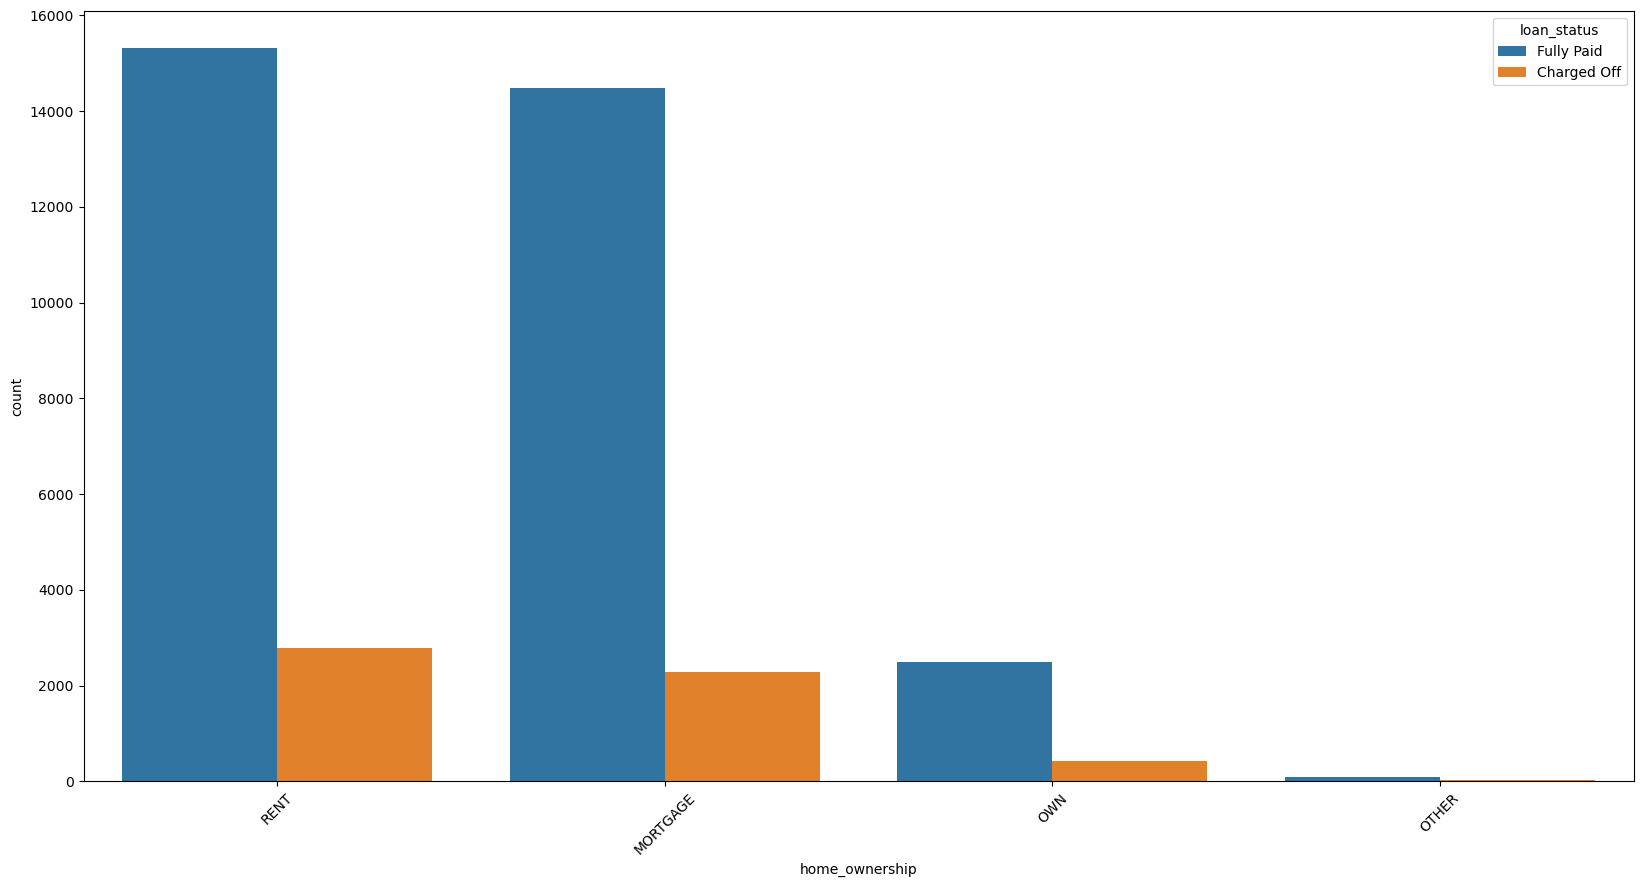

Countplot of purpose Vs Loan Status


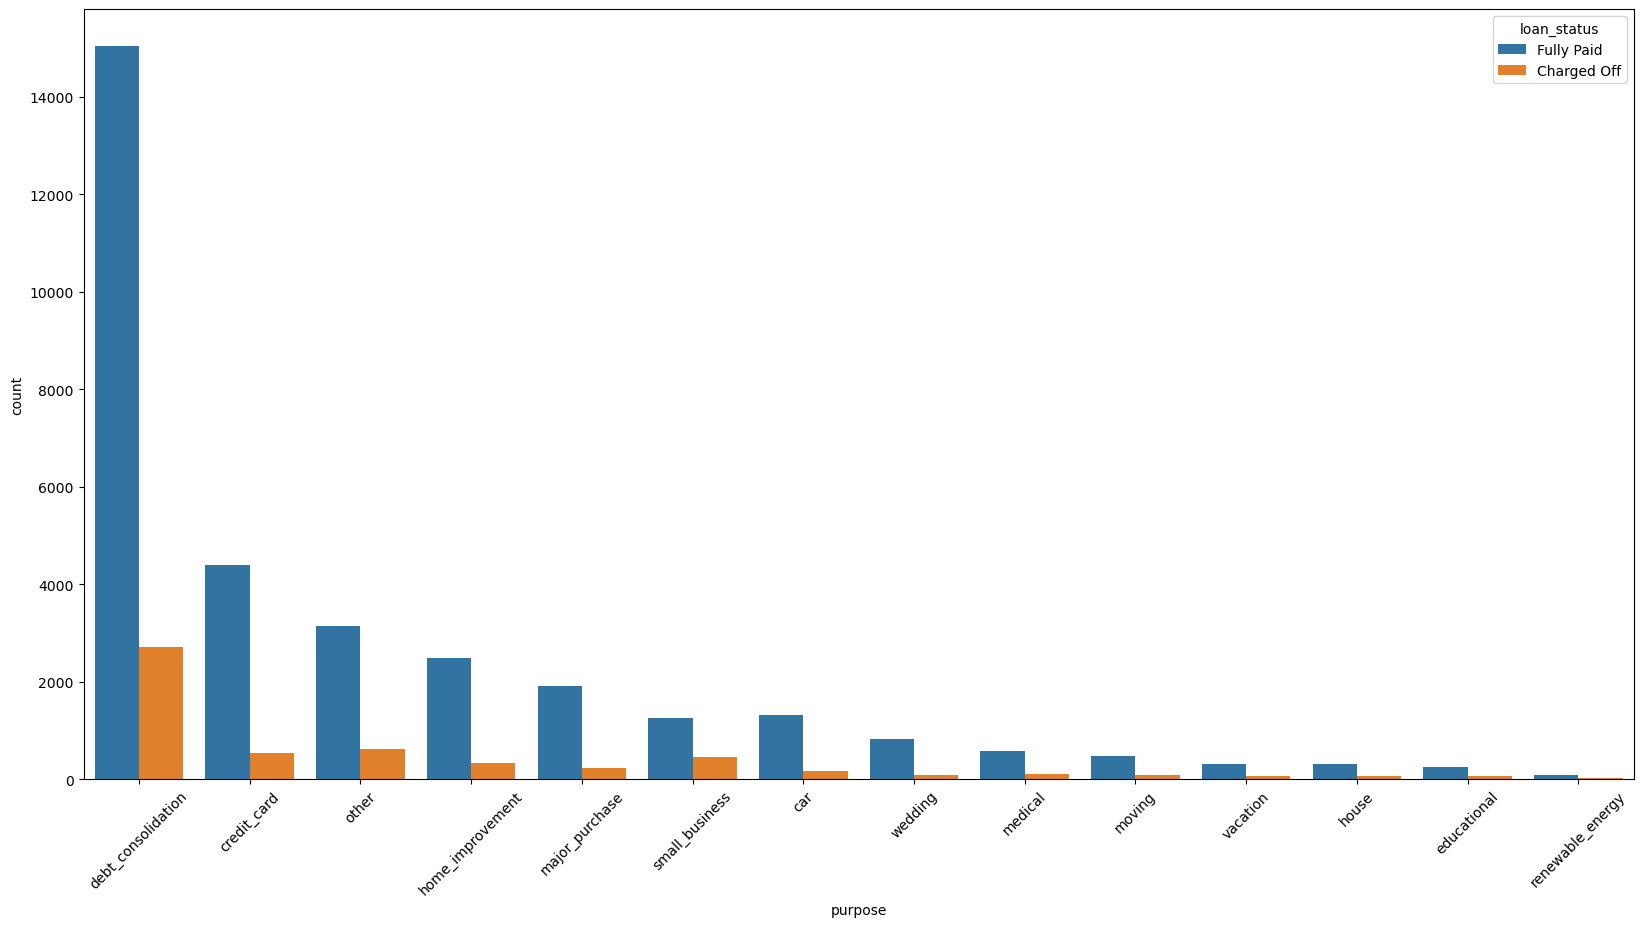

In [103]:
for i in unorder_catextra_cols_Bivariate:
    print("Countplot of",i,"Vs Loan Status")
    plt.figure(figsize = (20,10))
    sns.countplot(x=Loan_df[i],order = Loan_df[i].value_counts(ascending=False).index,hue=Loan_df['loan_status'])
    plt.xticks(rotation=45)
    plt.show()

Boxplot of Loan Amount Vs addr_state


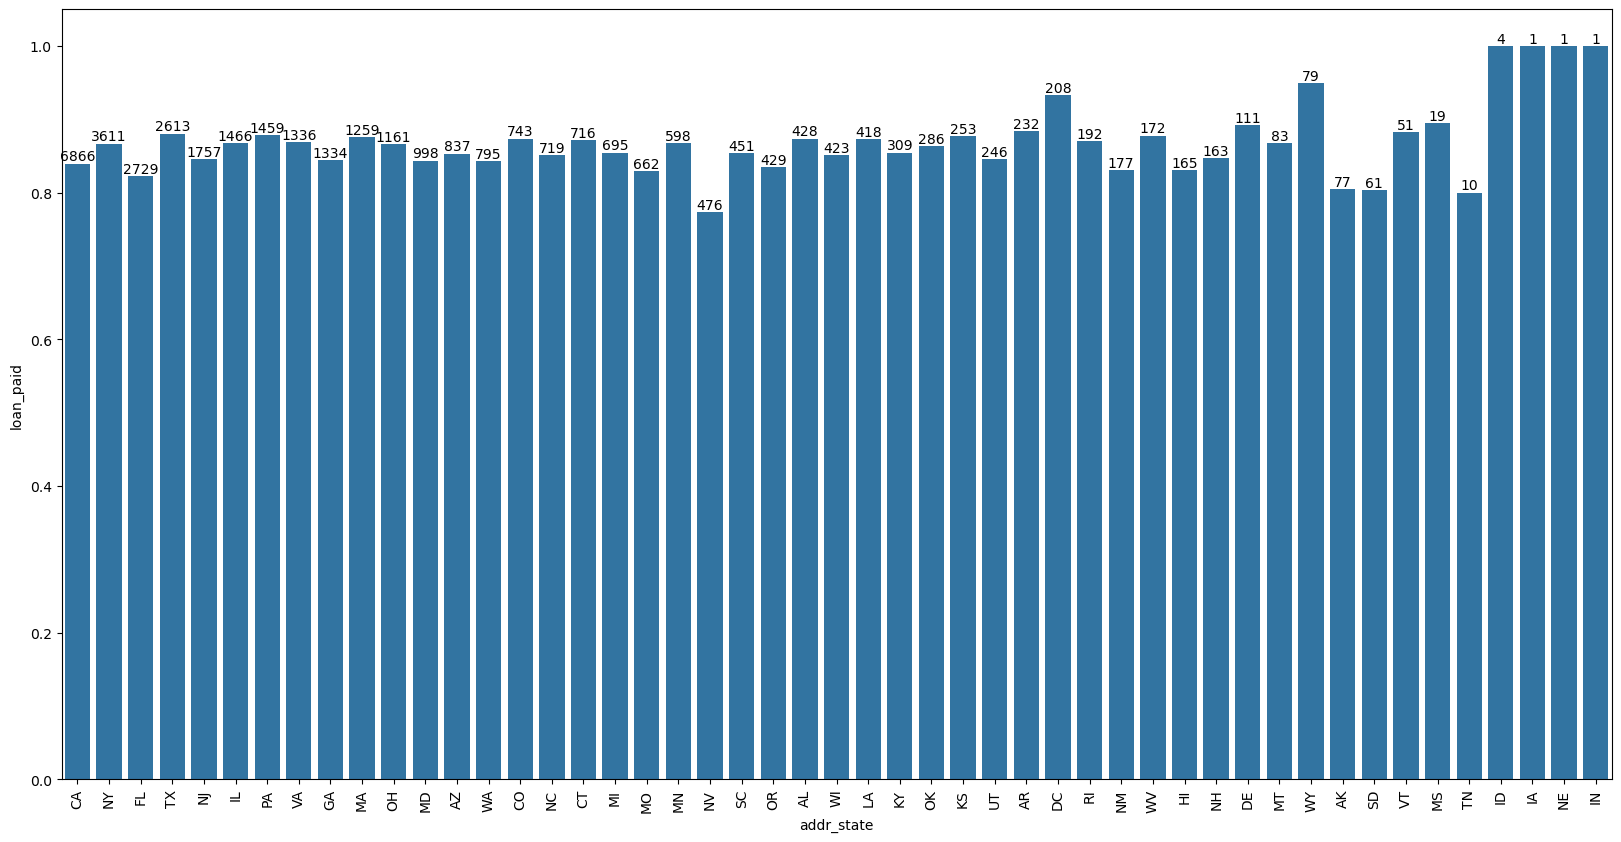

Boxplot of Loan Amount Vs home_ownership


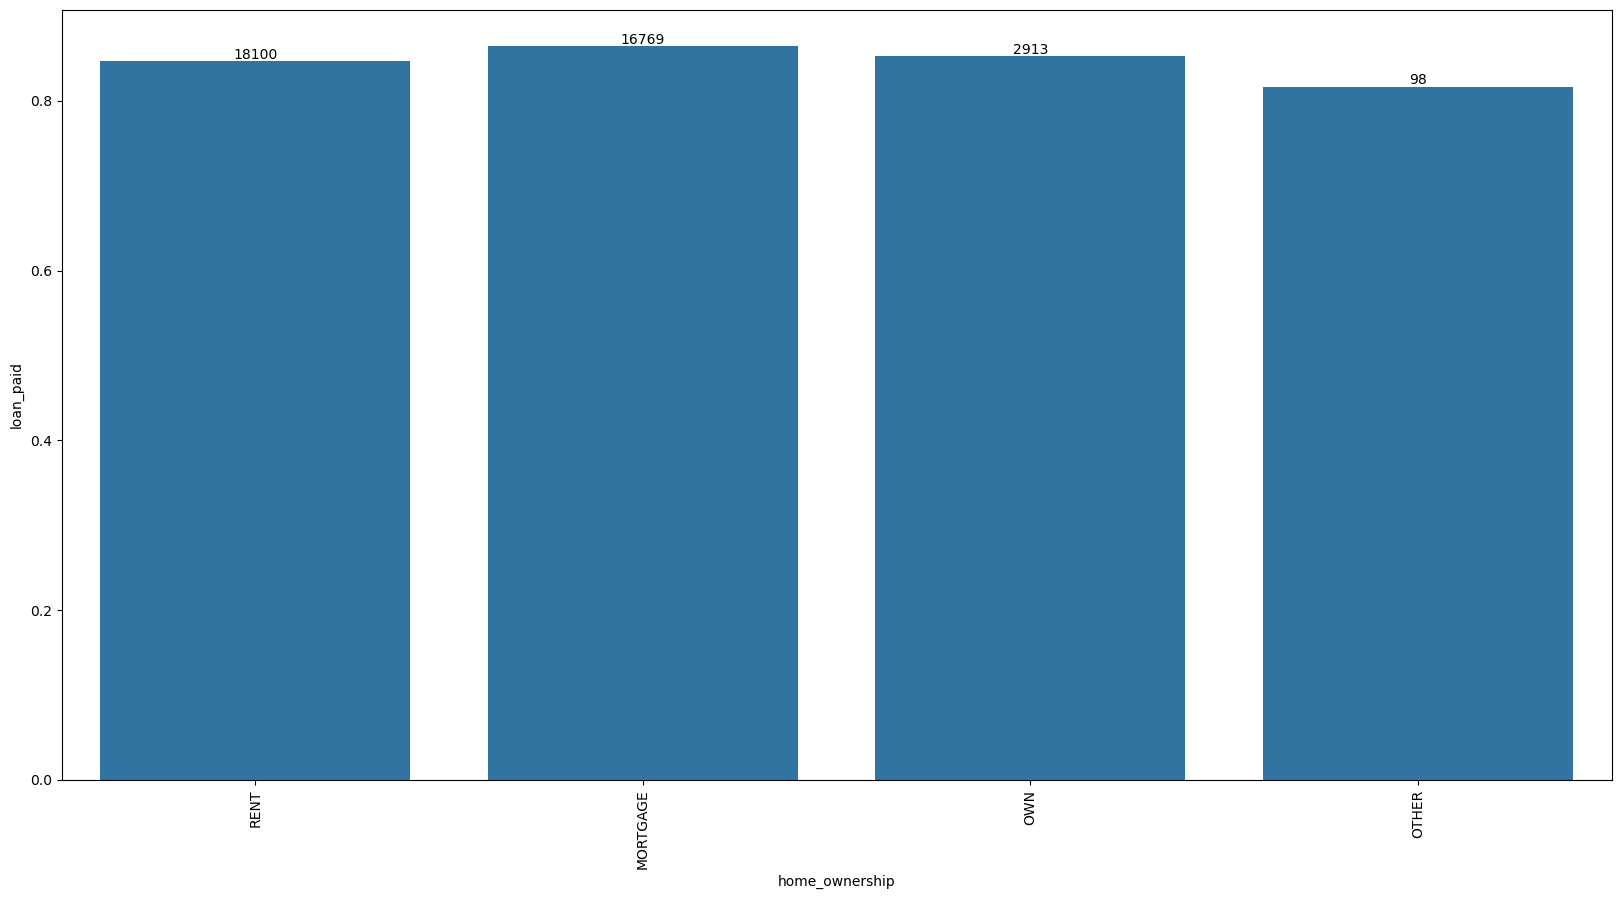

Boxplot of Loan Amount Vs purpose


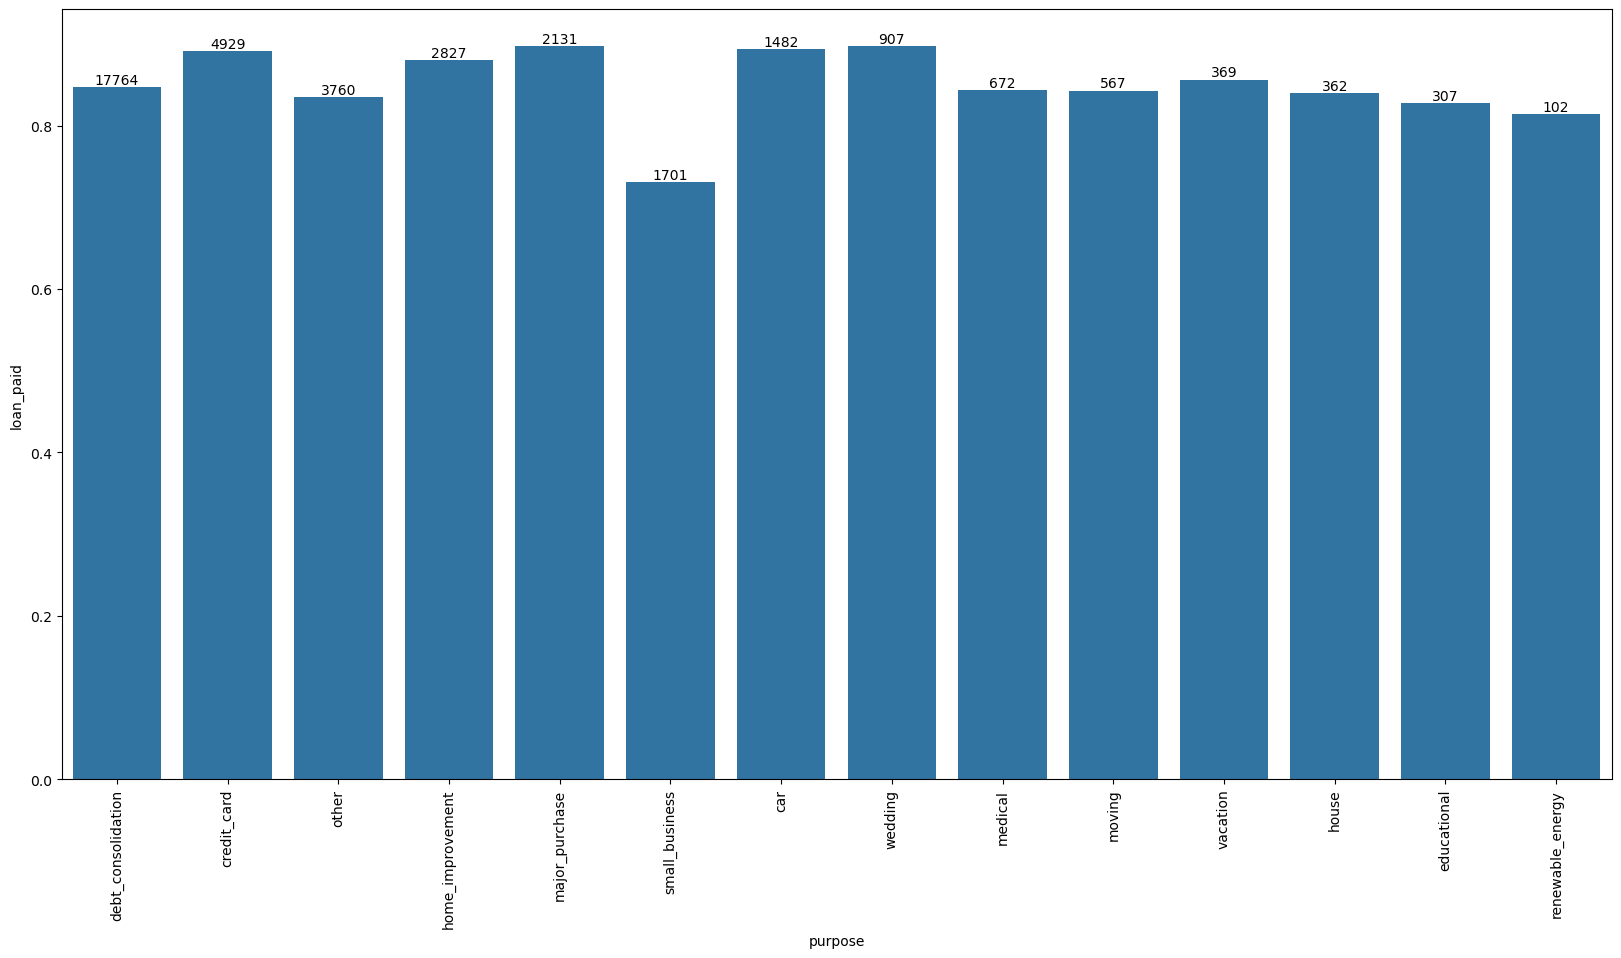

In [104]:

for i in unorder_catextra_cols_Bivariate:
        print("Boxplot of Loan Amount Vs",i)
        plt.figure(figsize = (20,10))
        ax = sns.barplot(x=Loan_df[i],y=Loan_df['loan_paid'],ci=None,order = Loan_df[i].value_counts(ascending=False).index)
        abs_values = Loan_df[i].value_counts(ascending=False).values
        ax.bar_label(container=ax.containers[0], labels=abs_values)
        plt.xticks(rotation=90)
        plt.show()


### 9.3 Numerical/Quantitative Variables

Boxplot of Loan Amount Vs dti


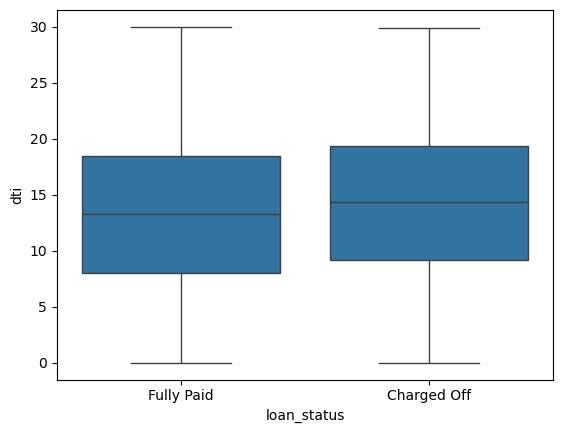

Boxplot of Loan Amount Vs funded_amnt


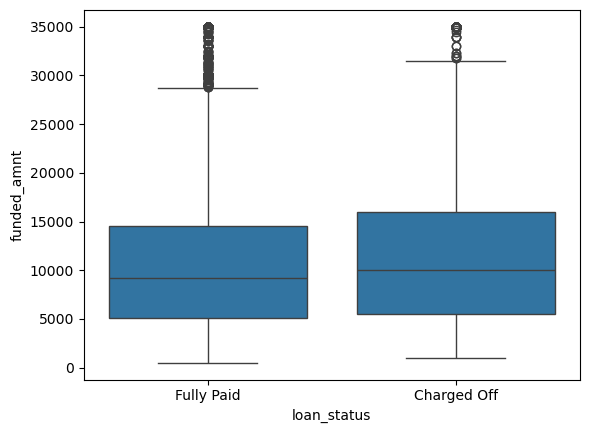

Boxplot of Loan Amount Vs funded_amnt_inv


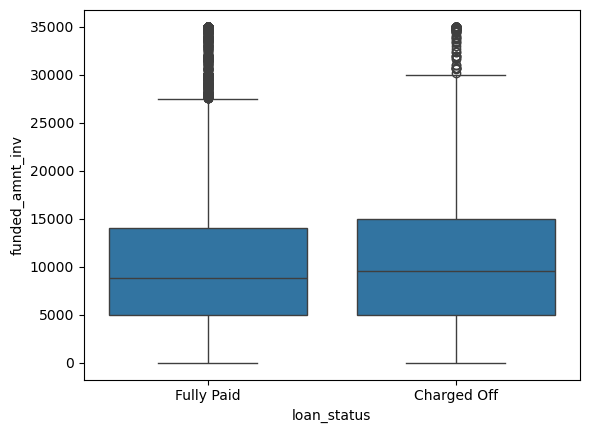

Boxplot of Loan Amount Vs installment


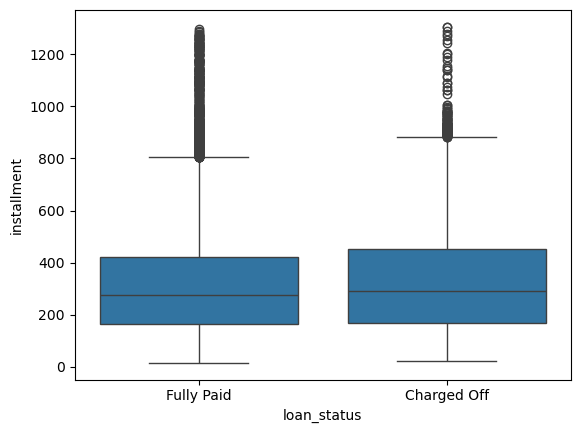

Boxplot of Loan Amount Vs int_rate


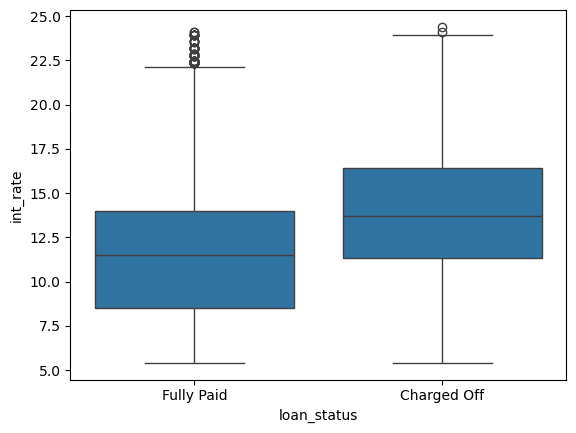

Boxplot of Loan Amount Vs loan_amnt


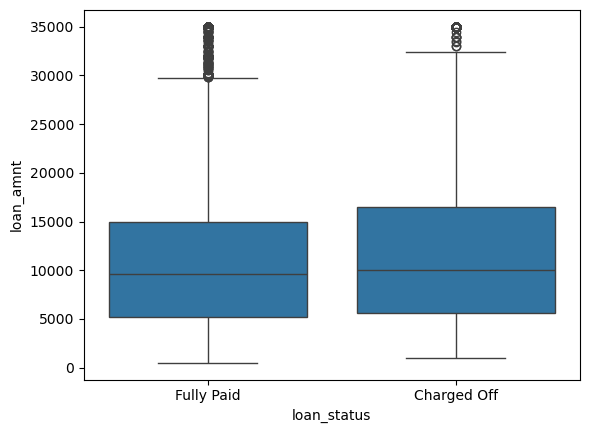

Boxplot of Loan Amount Vs member_id


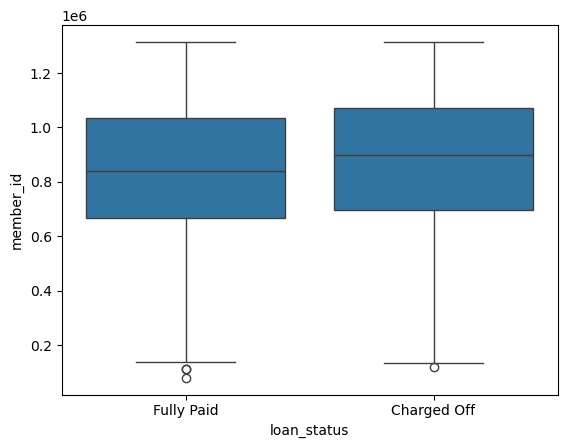

Boxplot of Loan Amount Vs total_acc


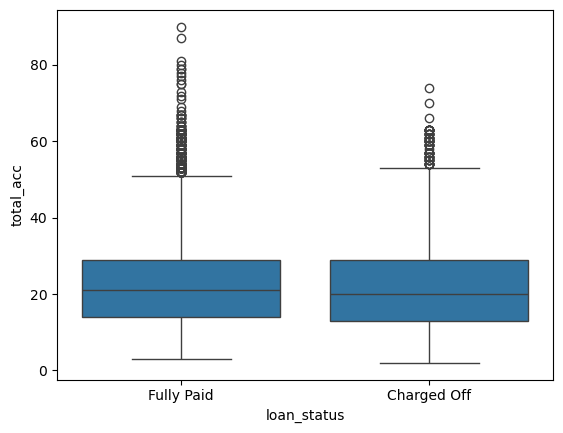

Boxplot of Loan Amount Vs total_pymnt


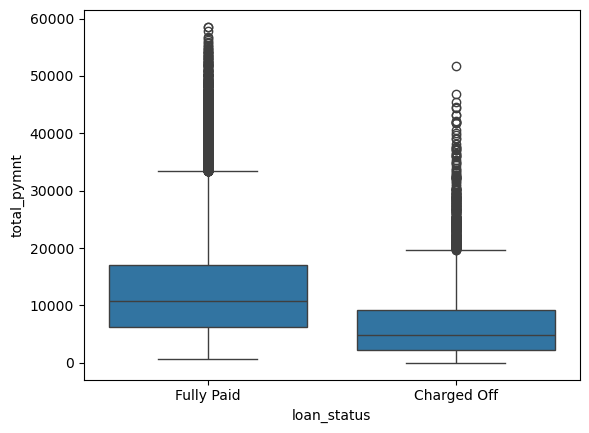

Boxplot of Loan Amount Vs total_pymnt_inv


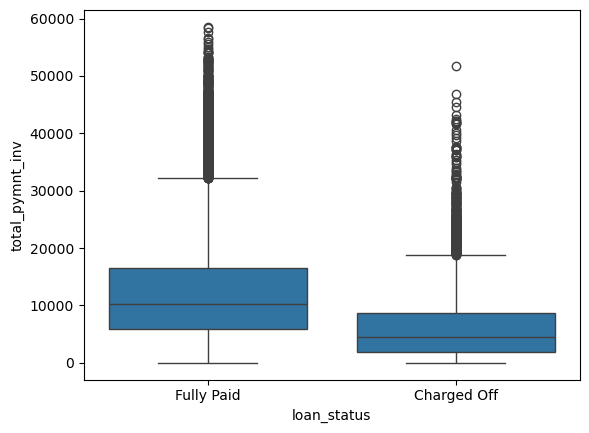

Boxplot of Loan Amount Vs total_rec_int


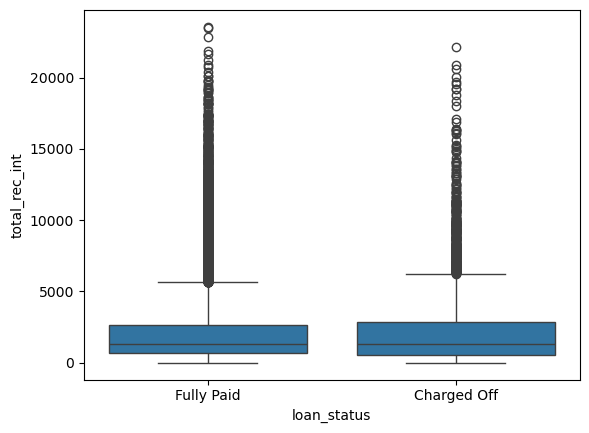

Boxplot of Loan Amount Vs total_rec_late_fee


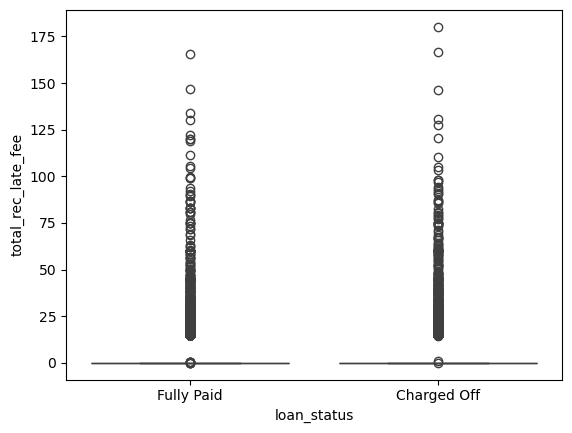

Boxplot of Loan Amount Vs total_rec_prncp


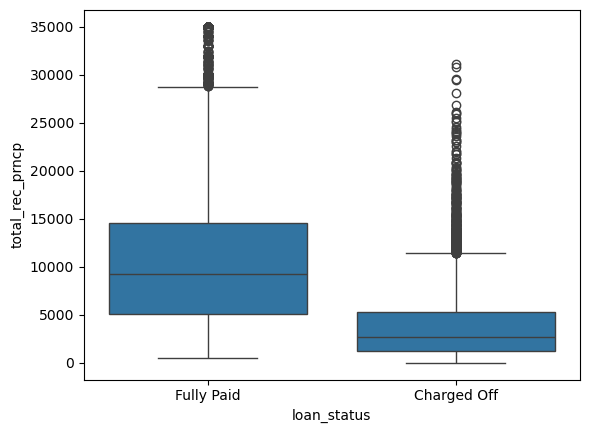

Boxplot of Loan Amount Vs annual_inc


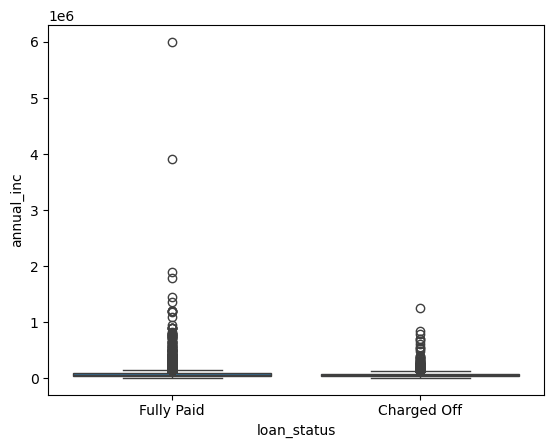

In [105]:
for i in quanti_num_cols_Bivariate:
        print("Boxplot of Loan Amount Vs",i)
        sns.boxplot(x=Loan_df['loan_status'],y=Loan_df[i])
        plt.show()

### 9.4 Summary of Bivariate Analysis

Insights and observations from Bivariate Analysis
- Most borrowers have been in the workforce for ten years or more, and they are also the most likely to default on their loans.
- Most of the loans that are labeled as "Charged Off" come from loan applicants in Grades B, C, and D.
- Grade "A" has very less chances of charged off.
- Applicants with Sub Grades B3, B4, C1, C2 and B5 are at a higher risk of defaulting on their loans.
- sub Grades of "A1” has very less chances of charged off
- December tends to be the most popular month for borrowing money, likely because of the holidays.
- The amount of people applying for loans has consistently risen from 2007 to 2011, suggesting a promising trend for the years ahead.
- Borrowers who apply for loans with a 60-month term are at a higher risk of default compared to those who opt for a 36-month term loan.
- Loan applicants who have been verified are defaulting at a higher rate compared to those who have not been verified.
- Borrowers from California, Florida, and New York have the highest probability of failing to repay their loans.
- Individuals who reside in homes that are rented or under a mortgage are at a higher risk of failing to repay their loans.
- Debt consolidation is the category that sees the highest number of loans being issued, and also the highest rate of defaults among borrowers in that category.
- Most of the borrowers who defaulted on their loans had very high Debt-to-Income (DTI) ratios.
- Most of the borrowers who failed to repay their loans had borrowed $15,500 or more.
- A large number of borrowers who failed to repay their loans had taken out loans with interest rates between 13% and 17%.
- Charged off proportion is increasing with higher intrest rates.
- interest rate less than 10% has very less chances of charged off.

## 10. Multivariate Analysis, Correlation Analysis

### 10.1 Heatmap for Multivariate Analysis, Correlation Analysis

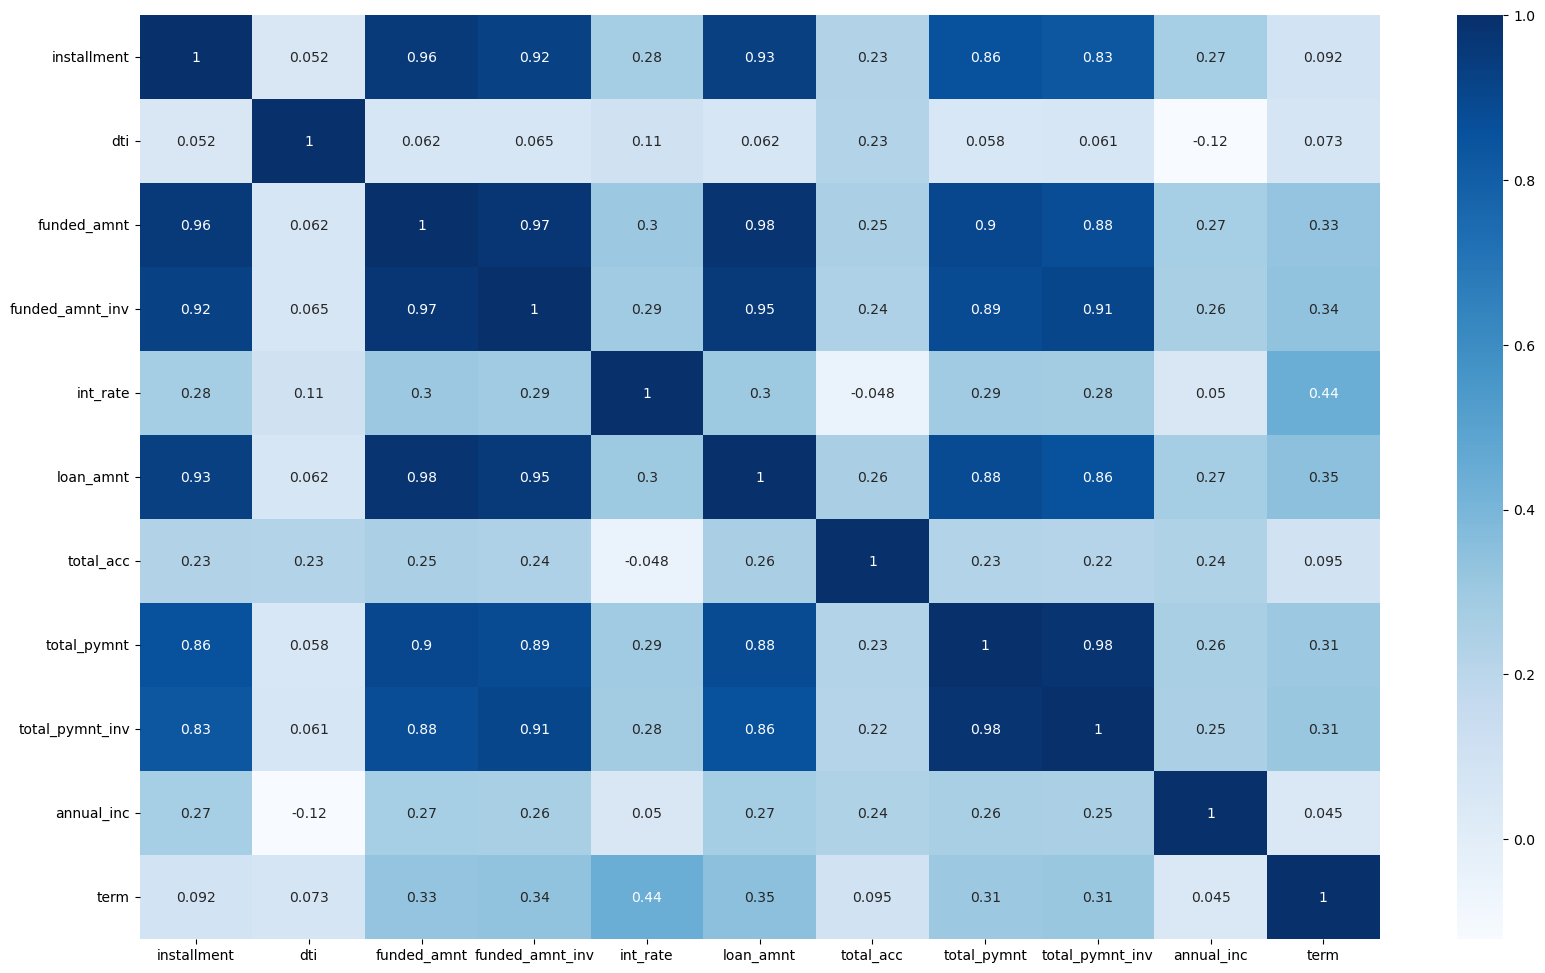

In [106]:
plt.figure(figsize=(20,12))
sns.heatmap(Loan_df[["installment","dti","funded_amnt","funded_amnt_inv","int_rate","loan_amnt",
                "total_acc","total_pymnt","total_pymnt_inv","annual_inc","term"]].corr(),annot=True,cmap="Blues")
plt.show()

### 10.2 Clustermap for Multivariate Analysis, Correlation Analysis

<Figure size 2000x1200 with 0 Axes>

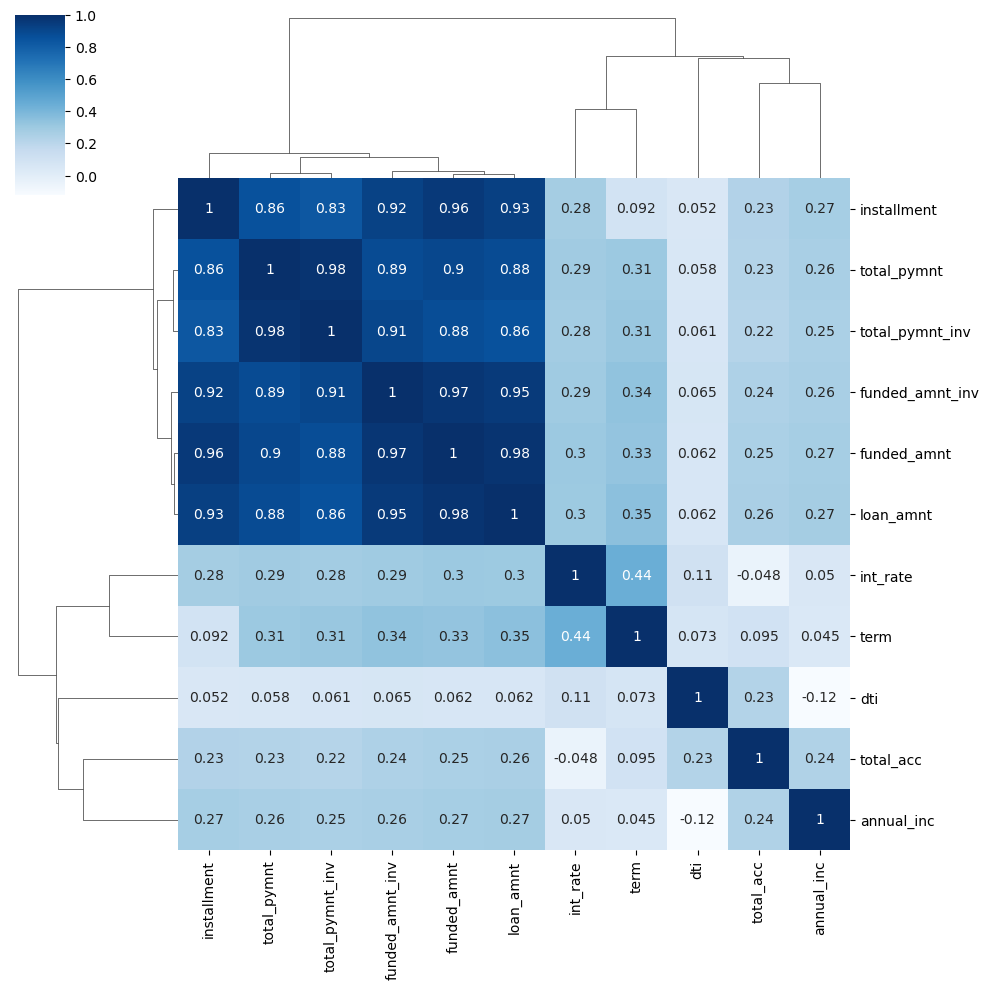

In [107]:
plt.figure(figsize=(20,12))
sns.clustermap(Loan_df[["installment","dti","funded_amnt","funded_amnt_inv","int_rate","loan_amnt",
                "total_acc","total_pymnt","total_pymnt_inv","annual_inc","term"]].corr(),annot=True,cmap="Blues")
plt.show()               

### 10.3 Summary of Multivariate Analysis, Correlation Analysis

**Insights and observations from the Multivariate analysis , Correlation Analysis** 

Conclusions drawn from correlation measurements.

#### High correlation
- There is a significant correlation between annual income and loan amount.
- The term is closely linked to the interest rate.
- There is a significant relationship between installment and funded amount, loan amount, and funded amount invested.


#### Low correlation
- The length of employment has a low correlation with the majority of the variables.
- dti shows a low correlation with the majority of the fields.
- The annual income is inversely related to the Debt-to-Income ratio (DTI).
- The debt-to-income ratio refers to the portion of a person's monthly gross income that is used to cover debt payments.
- This indicates that when annual income is low, the debt-to-income ratio (DTI) is high and conversely.


#### Opposite relationship
- There is a negative correlation between annual income and dti ratio.
- pub_rec_bankrupticies has a strong negative relationship with nearly all variables.
